# Eugene, Oregon Python automatic variable generation file for Circular Buffer

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [1]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [2]:
#conda activate geo_env


In [3]:
#python -m ipykernel install --user --name geo_env

In [4]:
import geopandas as gpd

In [5]:
import pandas as pd
from functools import reduce

In [6]:
import sys
'geopandas' in sys.modules

True

In [7]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [9]:
#buffer size in meter
size=1207.008  #in m, this input is also required for area conversation,1/10 mile==160.934m,1/4mile=402.336m, 0.5 mile=804.672, 3/4mile=1207.008m, 1 mile=1609.34,1.5 mile=2414.02, 2 mile=3218.69

In [10]:
# Import the emerging data
nf=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
nf=nf[nf["region"]=="Eugene"]
nf=nf[nf["year"]==2019]
nf.head()

site_id                                    site_name sensor_type  year  \
301  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
302  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
303  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
304  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
305  P005EUG                      Alder north of 18th Ave   permanent  2019   

     region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
301  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
302  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
303  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
304  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
305  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

      latitude   longitude             comment  
301  44.042515 -123.119532  corrected STL zone  
302  44.043919 -123.015499                 NaN  
303  44.044462 -123.052792                 NaN  
304  44.068013 -123.110896                 NaN  
305  44.040527 -123.080176                 NaN

In [11]:
# import counter location
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Eugene"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
c1.head()

site_id  osm_id_sensor
240  P001EUG    123498508.0
241  P002EUG    618082822.0
242  P003EUG    106993273.0
243  P004EUG    107098076.0
244  P005EUG    680124010.0

In [12]:
# merge by site_id
nf1=pd.merge(nf,c1, right_on='site_id', left_on='site_id',how='inner')
nf1.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  
0  44.042515 -123.119532  corrected STL zone    123498508.0  
1  44.043919 -123.015499                 NaN    618082822.0  
2  44.044462 -123.052792                 NaN    106993273.0  
3  44.068013 -123.110896                 NaN    107098076.0  
4  44.040527 -123.080176                 NaN    680124010.0

In [13]:
emerging_data=nf1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head(3)

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822    985.0
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260    203.0
2  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   2766.0

# Input the Strava Annual Network shape file here

In [14]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2839)

epsg:4326


# Input Bike share data here

In [15]:
bs1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene-bike-share-trips-2019.csv")
bs1.head(5)
print(bs1.shape)

(197132, 20)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Input OSM file here

In [16]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [17]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [18]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/school Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/Bike_commute_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [19]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/or_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/tabblock2010_41_pophu.shp")

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [20]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')


In [21]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

<AxesSubplot:>

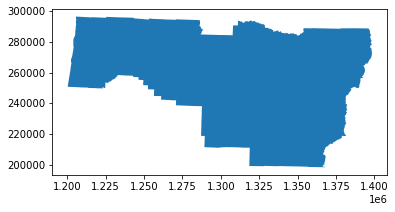

In [22]:
region = "Eugene"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

<AxesSubplot:>

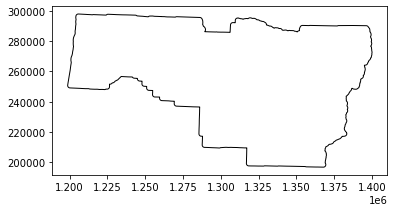

In [23]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

<AxesSubplot:>

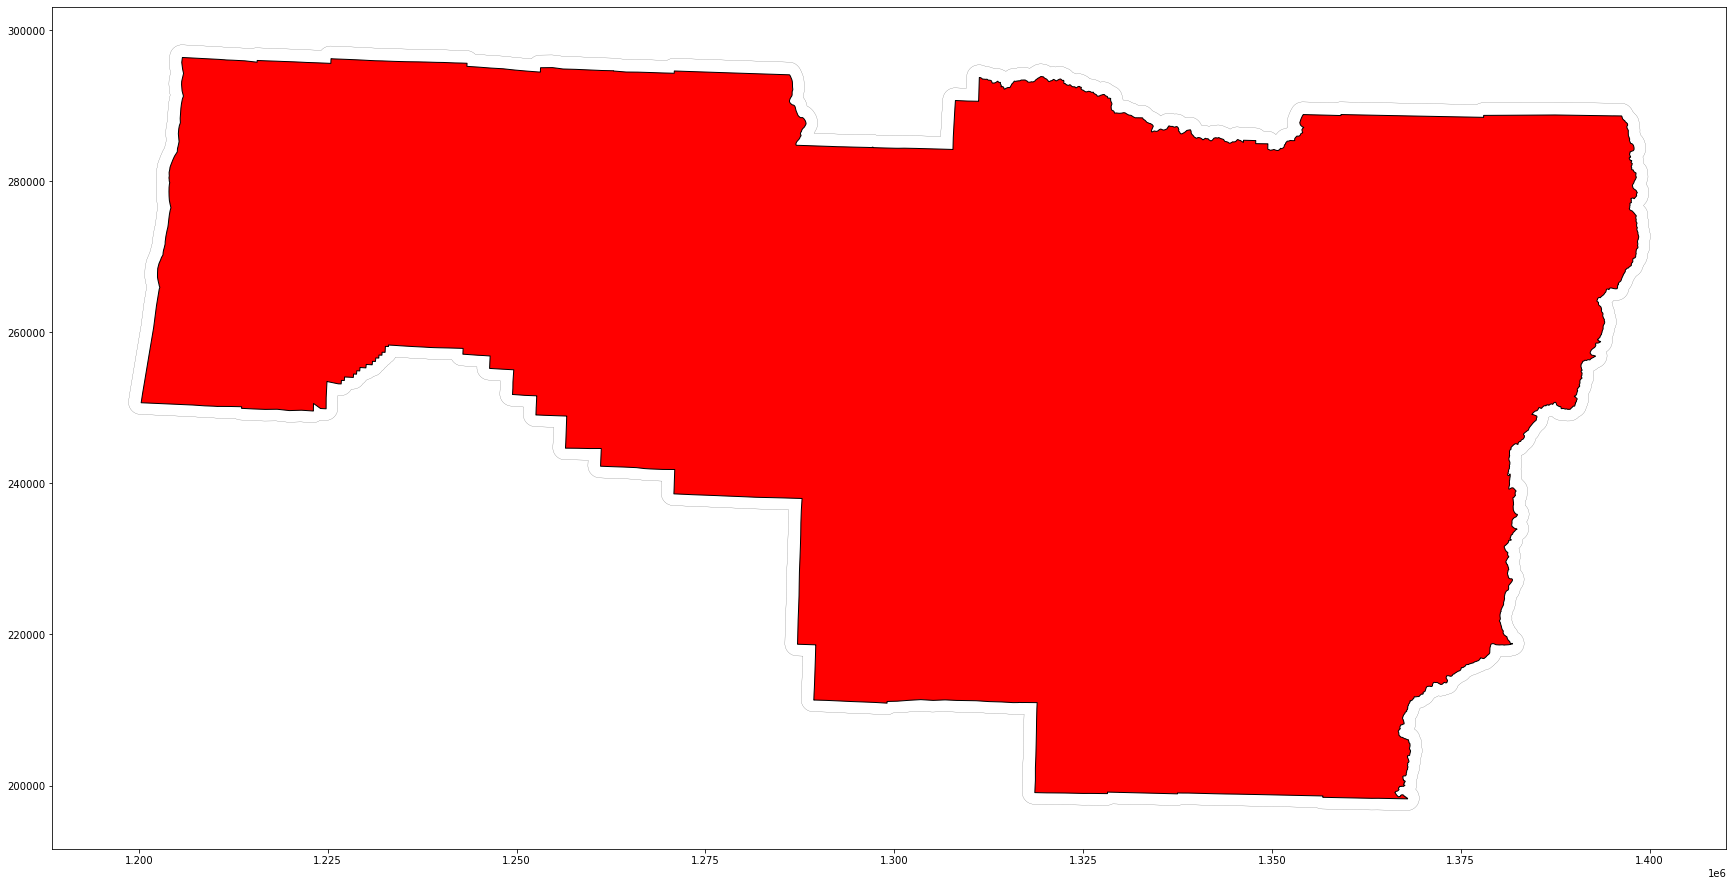

In [24]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the Eco and short term location file as gpd to get geometry

In [25]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                      geometry  
0  POINT (-123.11953 44.04252)  
1  POINT (-123.01550 44.04392)  
2  POINT (-123.05279 44.04446)  
3  POINT (-123.11090 44.06801)  
4  POINT (-123.08018 44.04053)

In [26]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")

In [27]:
print(df.crs)

EPSG:4211


In [28]:
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2839)
eco_proj.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1298418.325 267111.279)  
2  POINT (1295432.562 267262.083)  
3  POINT (1290859.454 270021.192)  
4  POINT (1293225.340 266892.292)

In [29]:
# We can now plot our ``GeoDataFrame``.
#eco_proj.plot(eco_proj, color='red',figsize=(10,10))
#plt.show()

In [30]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1298418.325 267111.279)  
2  POINT (1295432.562 267262.083)  
3  POINT (1290859.454 270021.192)  
4  POINT (1293225.340 266892.292)

In [31]:
#ecoshort0.reset_index(inplace=True)

In [32]:
#ecoshort0[ecoshort0.index.duplicated()]

# Filter the location by Extended Study area Boundary

In [33]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1298418.325 267111.279)  
2  POINT (1295432.562 267262.083)  
3  POINT (1290859.454 270021.192)  
4  POINT (1293225.340 266892.292)

In [34]:
count_station=ecoshort.copy()

In [35]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1298418.325 267111.279)  
2  POINT (1295432.562 267262.083)  
3  POINT (1290859.454 270021.192)  
4  POINT (1293225.340 266892.292)

<AxesSubplot:>

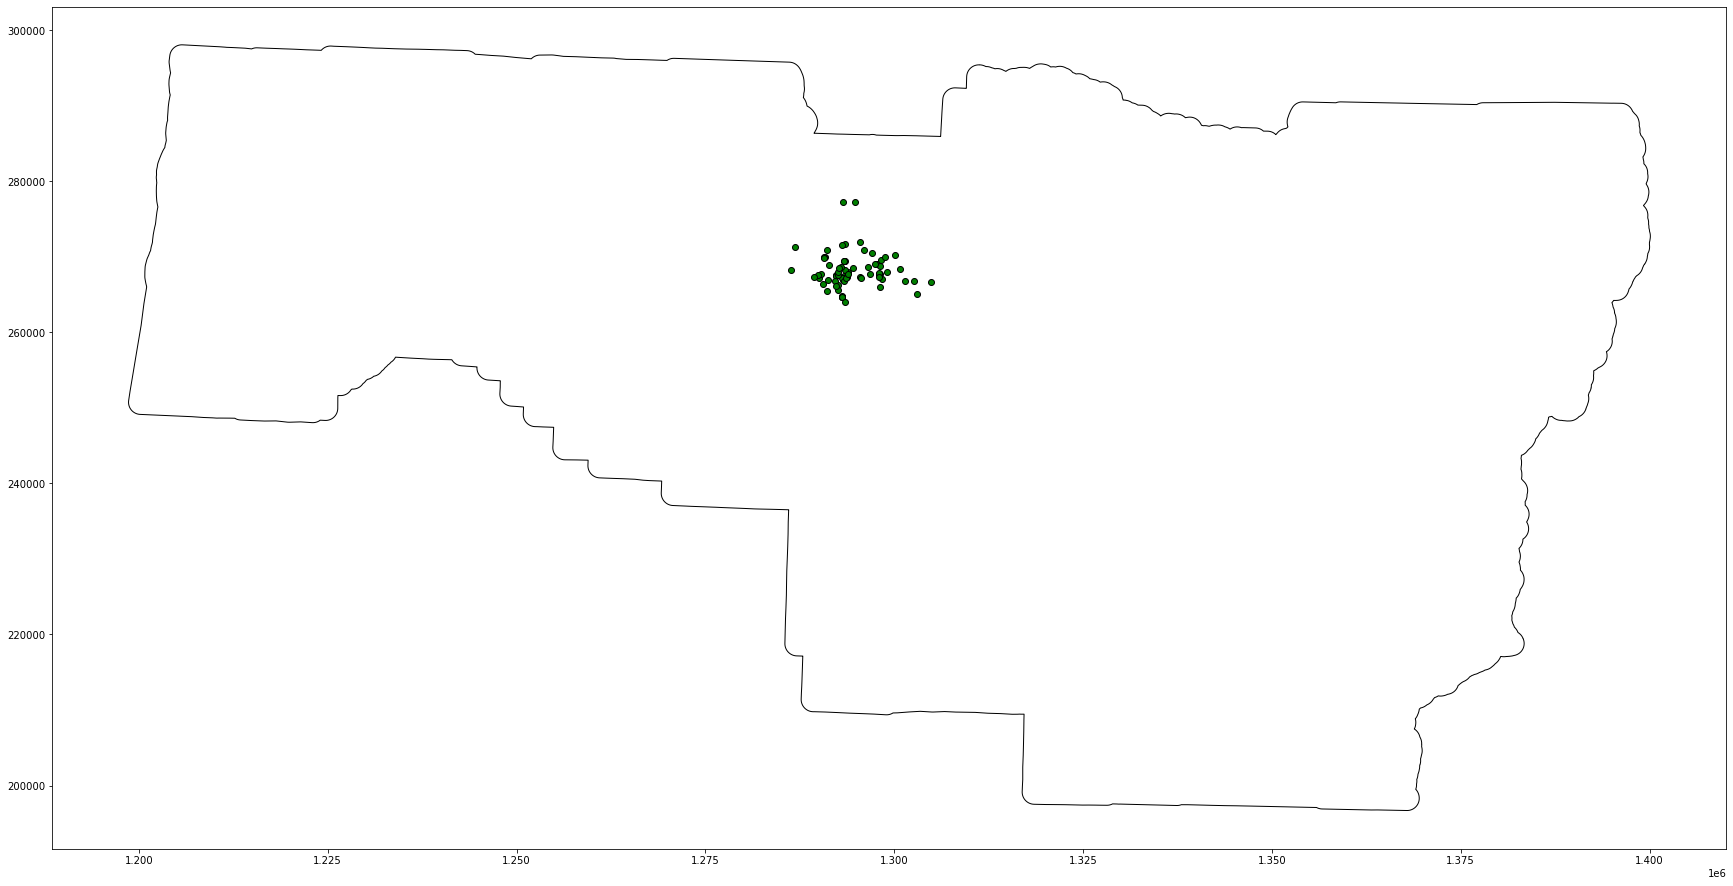

In [36]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [37]:
# Buffer file
#gdf1=nf3


In [38]:
gdf1 = ecoshort.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                                            geometry  
0  POLYGON ((1291286.283 267211.026, 1291280.471 ...  
1  POLYGON ((1299625.333 267111.279, 1299619.521 ...  
2  POLYGON ((1296639.570 267262.083, 1296633.758 ...  
3  POLYGON ((1292066.462 270021.192, 1292060.650 ...  
4  POLYGON ((1294432.348 266892.292, 1294426.536 ...

In [39]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [40]:
import contextily as ctx

In [41]:
print(gdf1.crs)

epsg:2839


In [42]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2838 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2839") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

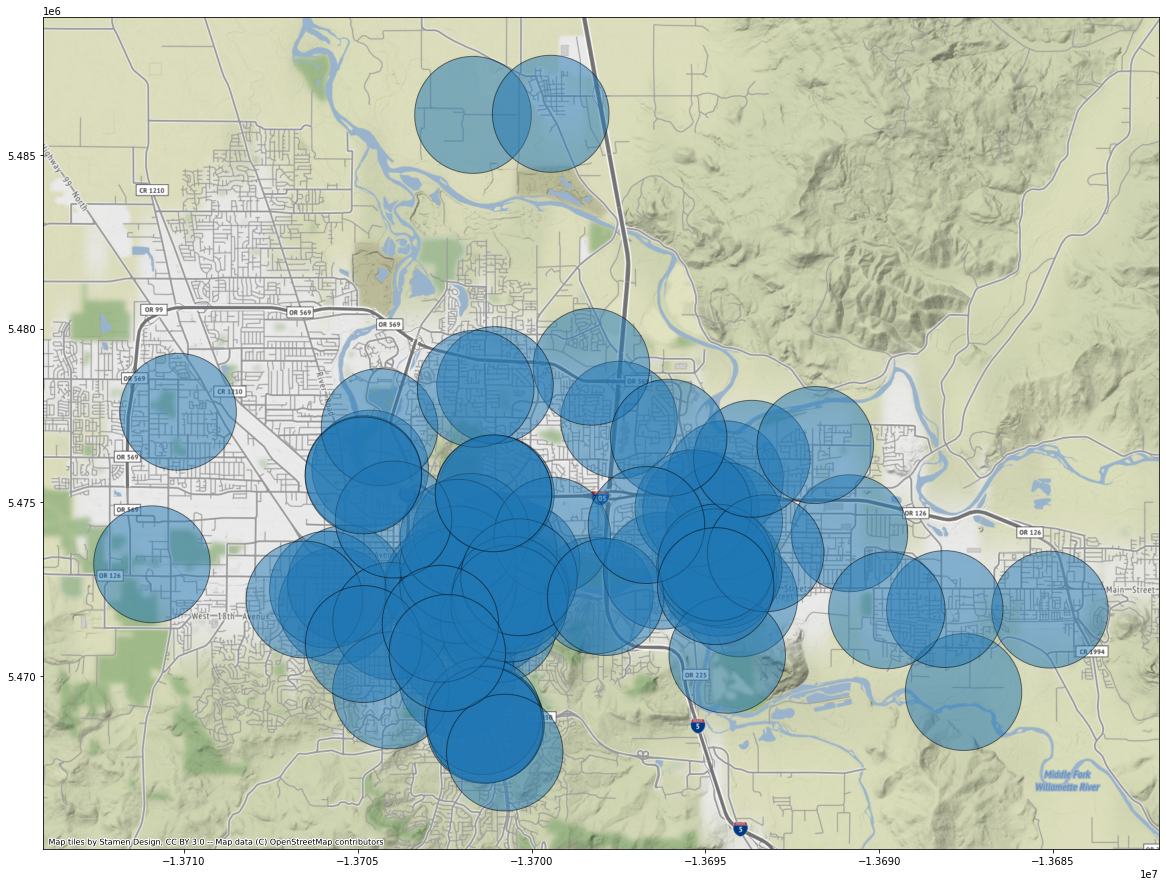

In [43]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate Bike Share GPS route

In [44]:
gps_bs=gpd.read_file('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene-bikeshare-gps-tracks-2019.shp')
#gps_bs=gps_bs[gps_bs.year==2019]
gps_bs

name                      cmt  \
0       9ff020b390a0f80eeebf7d6d10f034a9  2019-01-01 08:30:29 UTC   
1       3454861ec551bc55a8d4cdcb61faef11  2019-01-01 08:34:24 UTC   
2       c8943fd7a6fc07a422e70dd034c5dc29  2019-01-01 09:07:43 UTC   
3       c6b4535db6b434c320060ddbb92512c4  2019-01-01 09:10:15 UTC   
4       3a65c4f214c50d986e850c3e2d7a1b6f  2019-01-01 09:50:38 UTC   
...                                  ...                      ...   
192681  f5af69257ad5d8af3262a20e55d08034  2020-01-01 05:34:16 UTC   
192682  d5d6c36695707e7ec17b29f02eaf0440  2020-01-01 05:38:11 UTC   
192683  ac87037f0f991b4c00be318a7c13b32b  2020-01-01 06:32:59 UTC   
192684  352bdcf368e6a32900abb27f2315b23c  2020-01-01 07:30:43 UTC   
192685  2580b8ab4432c5ec511bd9aa0dec535c  2019-12-22 23:45:04 UTC   

                                                 geometry  
0       LINESTRING (-123.07860 44.04588, -123.07860 44...  
1       LINESTRING (-123.07860 44.04576, -123.07860 44...  
2       LINESTRING (-123.06529 44.04547, -123.06532 44...  
3       LINESTRING (-123.06534 44.04543, -123.06534 44...  
4       LINESTRING (-123.09283 44.04964, -123.09282 44...  
...                                                   ...  
192681  LINESTRING (-123.08523 44.04348, -123.08504 44...  
192682  LINESTRING (-123.08827 44.04652, -123.08824 44...  
192683  LINESTRING (-123.07298 44.04559, -123.07298 44...  
192684  LINESTRING (-123.08937 44.04887, -123.08937 44...  
192685  LINESTRING (-123.08427 44.04232, -123.08427 44...  

[192686 rows x 3 columns]

In [45]:
bs_all_od_gps = gpd.GeoDataFrame(gps_bs, geometry='geometry', crs={'init': 'epsg:4211'})
# Reproject the geometries by replacing the values with projected ones
bs_all_od_gps_proj = bs_all_od_gps.to_crs(epsg=2839)
bs_all_od_gps_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


name                      cmt  \
0  9ff020b390a0f80eeebf7d6d10f034a9  2019-01-01 08:30:29 UTC   
1  3454861ec551bc55a8d4cdcb61faef11  2019-01-01 08:34:24 UTC   
2  c8943fd7a6fc07a422e70dd034c5dc29  2019-01-01 09:07:43 UTC   
3  c6b4535db6b434c320060ddbb92512c4  2019-01-01 09:10:15 UTC   
4  3a65c4f214c50d986e850c3e2d7a1b6f  2019-01-01 09:50:38 UTC   

                                            geometry  
0  LINESTRING (1293371.435 267481.879, 1293371.43...  
1  LINESTRING (1293370.635 267468.934, 1293370.63...  
2  LINESTRING (1294435.620 267404.164, 1294433.66...  
3  LINESTRING (1294431.328 267399.293, 1294431.49...  
4  LINESTRING (1292243.671 267935.626, 1292244.79...

In [46]:
# Clip the data using GeoPandas clip
#odc1_clip_gps = gpd.clip(bs_all_od_gps_proj,gdf1)
#odc1_clip_gps.head(5)

In [47]:
#int_odl_gps=gpd.overlay(gdf1, odc1_clip_gps, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl_gps.head(5)

In [48]:
spj = gpd.sjoin( bs_all_od_gps_proj,gdf1, how="inner", op='intersects')

In [49]:
# fig, ax = plt.subplots(figsize = (30,25)) 
# gdf1.plot(ax=ax,color="red")
# int_odl_gps.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [50]:
output_odl_gps=spj.groupby(by=['osm_id_sensor'])['name'].count().reset_index()
output_odl_gps.columns=["osm_id","Bike Share route"]
output_odl_gps.head()

osm_id  Bike Share route
0  5453222.0               399
1  5480007.0                25
2  5482102.0             25592
3  5483853.0               436
4  5485472.0                88

# Calculate O, D and OD line

In [51]:
bs1

User.ID                           RouteID  \
0       2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1       74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2       22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3       22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4       79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   
...                                  ...                               ...   
197127  93dcf6084a1265e987312a793fb43433  ce5eba2c4887ed442c0858a0ebde45ac   
197128  6a8814f4d1611ff010b7a0deb8f37153  f5af69257ad5d8af3262a20e55d08034   
197129  5ea371eda54b048d7f8e5645c7ad487e  d5d6c36695707e7ec17b29f02eaf0440   
197130  f295c2458201b16771e69b70b484a2a9  ac87037f0f991b4c00be318a7c13b32b   
197131  ddd6d8f80a52f982c5e39e0f43fd3de9  352bdcf368e6a32900abb27f2315b23c   

                         Start.Hub StartLatitude StartLongitude  \
0          E 13th Ave & Kincaid St   44.04587667    -123.078595   
1          E 13th Ave & Kincaid St      44.04576      -123.0786   
2             Matthew Knight Arena   44.04547167   -123.0652933   
3             Matthew Knight Arena   44.04542667    -123.065345   
4       E Broadway & Willamette St     44.049645    -123.092835   
...                            ...           ...            ...   
197127                         NaN     44.045483    -123.081233   
197128       E 15th Ave & Ferry St     44.043481    -123.085231   
197129                         NaN     44.046517    -123.088268   
197130          Erb Memorial Union      44.04559    -123.072977   
197131       E 10th Ave & Pearl St     44.048865    -123.089365   

              Start.Time                     End.Hub  EndLatitude  \
0          1/1/2019 0:30       E 13th Ave & Pearl St  44.04544752   
1          1/1/2019 0:34       E 13th Ave & Pearl St  44.04544752   
2          1/1/2019 1:07     E 13th Ave & Kincaid St  44.04589333   
3          1/1/2019 1:10     E 13th Ave & Kincaid St  44.04594333   
4          1/1/2019 1:50        Matthew Knight Arena    44.045405   
...                  ...                         ...          ...   
197127  12/31/2019 21:19                         NaN    44.035577   
197128  12/31/2019 21:34                         NaN    44.056363   
197129  12/31/2019 21:38       E 15th Ave & Ferry St    44.043481   
197130  12/31/2019 22:32      W 8th Ave & Lincoln St    44.051012   
197131  12/31/2019 23:30  E Broadway & Willamette St    44.049648   

        EndLongitude          End.Time  Bike.ID  Distance..Miles.  \
0       -123.0896187     1/1/2019 0:45    19607              0.71   
1       -123.0896187     1/1/2019 0:46    19812              0.74   
2       -123.0785767     1/1/2019 1:16    19749              0.68   
3        -123.078555     1/1/2019 1:15    19743              0.67   
4       -123.0652917     1/1/2019 2:07    19597              1.68   
...              ...               ...      ...               ...   
197127   -123.079977  12/31/2019 21:42    19600              1.89   
197128   -123.097202  12/31/2019 21:45    19703              1.52   
197129   -123.085231  12/31/2019 21:42    19746              0.36   
197130   -123.096802  12/31/2019 22:44    19739              1.68   
197131   -123.092692  12/31/2019 23:35    19693              0.27   

             Duration Rental.Access.Path Overtime.Y.N  Overtime.Fee..USD.  \
0       14 min 41 sec             keypad            N                   0   
1       11 min 50 sec             keypad            N                   0   
2        8 min 19 sec             keypad            N                   0   
3        5 min 32 sec             keypad            N                   0   
4       16 min 52 sec             keypad            N                   0   
...               ...                ...          ...                 ...   
197127  22 min 50 sec             keypad            N                   0   
197128  11 min 12

In [52]:
bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')

In [53]:
bs3=bs1[bs1['StartLatitude'].notna()]
bs3.shape

(197076, 20)

# BS Origin

In [54]:
# Origin
bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
bso.head(5)

RouteID  StartLatitude  StartLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1  3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
2  c8943fd7a6fc07a422e70dd034c5dc29      44.045472     -123.065293   
3  c6b4535db6b434c320060ddbb92512c4      44.045427     -123.065345   
4  3a65c4f214c50d986e850c3e2d7a1b6f      44.049645     -123.092835   

                      geometry  
0  POINT (-123.07860 44.04588)  
1  POINT (-123.07860 44.04576)  
2  POINT (-123.06529 44.04547)  
3  POINT (-123.06534 44.04543)  
4  POINT (-123.09283 44.04964)

In [55]:
# set the co-ordinate system first
bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bso1_proj = bso1.to_crs(epsg=2839)
bso1_proj.head(5)

RouteID  StartLatitude  StartLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1  3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
2  c8943fd7a6fc07a422e70dd034c5dc29      44.045472     -123.065293   
3  c6b4535db6b434c320060ddbb92512c4      44.045427     -123.065345   
4  3a65c4f214c50d986e850c3e2d7a1b6f      44.049645     -123.092835   

                         geometry  
0  POINT (1293370.316 267482.513)  
1  POINT (1293369.516 267469.568)  
2  POINT (1294434.504 267404.798)  
3  POINT (1294430.209 267399.928)  
4  POINT (1292242.552 267936.260)

In [56]:
# Clip the data using GeoPandas clip
bso1_clip = gpd.clip(bso1_proj, gdf1)
bso1_clip.head(5)

RouteID  StartLatitude  StartLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1  3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
2  c8943fd7a6fc07a422e70dd034c5dc29      44.045472     -123.065293   
3  c6b4535db6b434c320060ddbb92512c4      44.045427     -123.065345   
4  3a65c4f214c50d986e850c3e2d7a1b6f      44.049645     -123.092835   

                         geometry  
0  POINT (1293370.316 267482.513)  
1  POINT (1293369.516 267469.568)  
2  POINT (1294434.504 267404.798)  
3  POINT (1294430.209 267399.928)  
4  POINT (1292242.552 267936.260)

In [57]:
 int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
 int_bso.head(5)

site_id                            site_name sensor_type  year  region  \
0  P001EUG     Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   
2  S003EUG         12th Ave East of Chambers St  short-term  2019  Eugene   
3  S007EUG       13th Ave East of Willamette St  short-term  2019  Eugene   
4  S068EUG        Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  180.006727   0.986301   0.547945    743.0  44.046569   
2             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
3             1.0  118.872034   3.698630   1.561644   1564.0  44.045515   
4             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

    longitude             comment  osm_id_sensor  \
0 -123.119532  corrected STL zone    123498508.0   
1 -123.092231                 NaN    129170725.0   
2 -123.117207                 NaN      5503096.0   
3 -123.092067                 NaN    498988307.0   
4 -123.105510                 NaN    216890849.0   

                            RouteID  StartLatitude  StartLongitude  \
0  b341ffaed2a103f89e81649c65030798      44.045367     -123.105053   
1  b341ffaed2a103f89e81649c65030798      44.045367     -123.105053   
2  b341ffaed2a103f89e81649c65030798      44.045367     -123.105053   
3  b341ffaed2a103f89e81649c65030798      44.045367     -123.105053   
4  b341ffaed2a103f89e81649c65030798      44.045367     -123.105053   

                         geometry  
0  POINT (1291249.060 267491.487)  
1  POINT (1291249.060 267491.487)  
2  POINT (1291249.060 267491.487)  
3  POINT (1291249.060 267491.487)  
4  POINT (1291249.060 267491.487)

In [58]:
int_bso.shape

(2357304, 18)

In [59]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [60]:
output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_origin.columns=["osm_id","Bike Share Origin"]
output_origin.head()

osm_id  Bike Share Origin
0  5453222.0                 27
1  5480007.0                  2
2  5482102.0              13146
3  5483853.0                 37
4  5485472.0                 14

# BS destination

In [61]:
# Destination
bsd = gpd.GeoDataFrame(
    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
bsd.head(5)

RouteID  EndLatitude  EndLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9    44.045448   -123.089619   
1  3454861ec551bc55a8d4cdcb61faef11    44.045448   -123.089619   
2  c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3  c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
4  3a65c4f214c50d986e850c3e2d7a1b6f    44.045405   -123.065292   

                      geometry  
0  POINT (-123.08962 44.04545)  
1  POINT (-123.08962 44.04545)  
2  POINT (-123.07858 44.04589)  
3  POINT (-123.07855 44.04594)  
4  POINT (-123.06529 44.04541)

In [62]:
# set the co-ordinate system first
bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
bsd1_proj = bsd1.to_crs(epsg=2839)
bsd1_proj.head(5)

RouteID  EndLatitude  EndLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9    44.045448   -123.089619   
1  3454861ec551bc55a8d4cdcb61faef11    44.045448   -123.089619   
2  c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3  c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
4  3a65c4f214c50d986e850c3e2d7a1b6f    44.045405   -123.065292   

                         geometry  
0  POINT (1292485.764 267462.108)  
1  POINT (1292485.764 267462.108)  
2  POINT (1293371.839 267484.318)  
3  POINT (1293373.748 267489.818)  
4  POINT (1294434.405 267397.390)

In [63]:
# Clip the data using GeoPandas clip
bsd1_clip = gpd.clip(bsd1_proj, gdf1)
bsd1_clip.head(5)

RouteID  EndLatitude  EndLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9    44.045448   -123.089619   
1  3454861ec551bc55a8d4cdcb61faef11    44.045448   -123.089619   
2  c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3  c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
4  3a65c4f214c50d986e850c3e2d7a1b6f    44.045405   -123.065292   

                         geometry  
0  POINT (1292485.764 267462.108)  
1  POINT (1292485.764 267462.108)  
2  POINT (1293371.839 267484.318)  
3  POINT (1293373.748 267489.818)  
4  POINT (1294434.405 267397.390)

In [64]:
int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bsd.head(5)

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S090EUG           Monroe South of 1st Ave  short-term  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
2             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
3             2.0   97.896699   1.534247   0.684932    594.0  44.058557   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor  \
0 -123.119532  corrected STL zone    123498508.0   
1 -123.117207                 NaN      5503096.0   
2 -123.121854                 NaN      5485965.0   
3 -123.104853                 NaN      5482102.0   
4 -123.119532  corrected STL zone    123498508.0   

                            RouteID  EndLatitude  EndLongitude  \
0  d427bca536135515fa6a3912374a7d6f    44.050975   -123.112377   
1  d427bca536135515fa6a3912374a7d6f    44.050975   -123.112377   
2  d427bca536135515fa6a3912374a7d6f    44.050975   -123.112377   
3  d427bca536135515fa6a3912374a7d6f    44.050975   -123.112377   
4  a9daba0da0cbe26b77cf2282d76d7dfc    44.045353   -123.105077   

                         geometry  
0  POINT (1290681.839 268132.631)  
1  POINT (1290681.839 268132.631)  
2  POINT (1290681.839 268132.631)  
3  POINT (1290681.839 268132.631)  
4  POINT (1291247.139 267490.064)

In [65]:
int_bsd.shape

(2340306, 18)

In [66]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [67]:
output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_destination.columns=["osm_id","Bike Share Destination"]
output_destination.head()

osm_id  Bike Share Destination
0  5453222.0                      34
1  5480007.0                       1
2  5482102.0                   13529
3  5483853.0                      41
4  5485472.0                      10

# Bike Share OD line Crossing

In [68]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
import shapely.geometry as geom
bs_all_od=bs3.copy()
bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
bs_all_od.head(5)

User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (-123.078595 44.04587667, -123.0896...  
1                     0  LINESTRING (-123.0786 44.04576, -123.0896187 4...  
2                     0  LINESTRING (-123.0652933 44.04547167, -123.078...  
3                     0  LINESTRING (-123.065345 44.04542667, -123.0785...  
4                     0  LINESTRING (-123.092835 44.049645, -123.065291...  

[5 rows x 21 columns]

In [69]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [70]:
#print(bs_all_od.crs)

In [71]:
#print(bs_all_od1.info())

In [72]:
bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
bs_all_od2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (-123.07860 44.04588, -123.08962 44...  
1                     0  LINESTRING (-123.07860 44.04576, -123.08962 44...  
2                     0  LINESTRING (-123.06529 44.04547, -123.07858 44...  
3                     0  LINESTRING (-123.06534 44.04543, -123.07855 44...  
4                     0  LINESTRING (-123.09283 44.04964, -123.06529 44...  

[5 rows x 21 columns]

In [73]:
print(bs_all_od2.crs)

+init=epsg:4211 +type=crs


In [74]:
#print(bs_all_od2.info())

In [75]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bs_all_od2_proj = bs_all_od2.to_crs(epsg=2839)
bs_all_od2_proj.head(5)

User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (1293370.316 267482.513, 1292485.76...  
1                     0  LINESTRING (1293369.516 267469.568, 1292485.76...  
2                     0  LINESTRING (1294434.504 267404.798, 1293371.83...  
3                     0  LINESTRING (1294430.209 267399.928, 1293373.74...  
4                     0  LINESTRING (1292242.552 267936.260, 1294434.40...  

[5 rows x 21 columns]

In [76]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [77]:
spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [78]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [79]:
#int_odl=gpd.overlay(gdf1, odc1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [80]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [81]:
output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_odl.columns=["osm_id","Bike Share Crossing"]
output_odl.head()

osm_id  Bike Share Crossing
0  5453222.0                   63
1  5480007.0                    4
2  5482102.0                21626
3  5483853.0                   79
4  5485472.0                   57

# Now import land use shape file

In [82]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((-123.07730 44.04293, -123.07482 44.0...  
1  POLYGON ((-123.08436 44.02601, -123.08418 44.0...  
2  POLYGON ((-123.09970 44.03780, -123.09962 44.0...  
3  POLYGON ((-123.08279 44.02618, -123.08278 44.0...  
4  POLYGON ((-123.08622 44.03172, -123.08574 44.0...

# Define and then Convert the co-ordinate system

In [83]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

In [84]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2839)
luse_proj.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((1293464.824 267151.609, 1293663.441 ...  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
2  POLYGON ((1291652.887 266637.042, 1291659.172 ...  
3  POLYGON ((1292968.243 265304.904, 1292969.043 ...  
4  POLYGON ((1292712.265 265928.980, 1292752.028 ...

# Visualize

<AxesSubplot:>

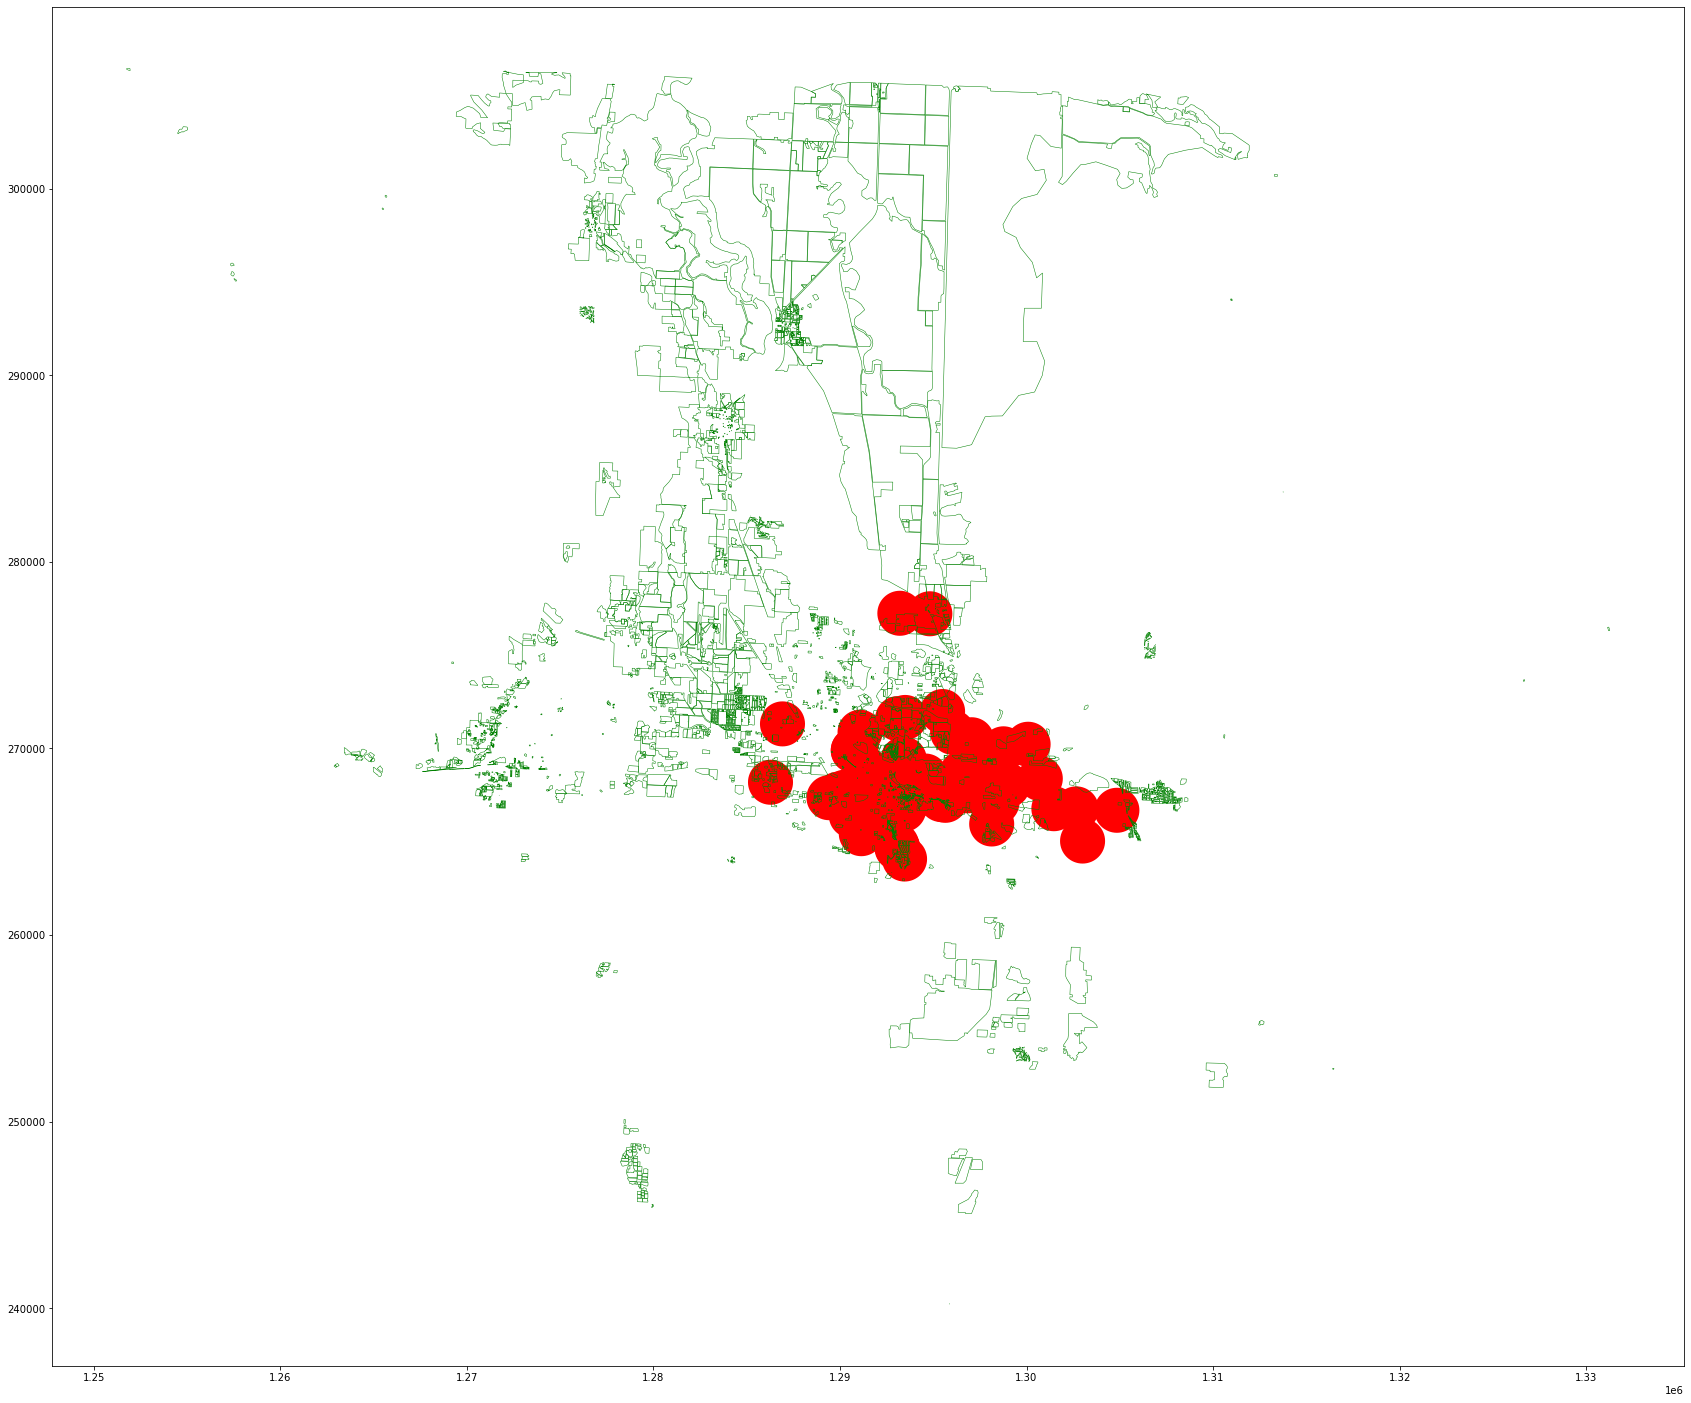

In [85]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [86]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

In [87]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [88]:
#luse_proj.exterior.type

In [89]:
#gdf1.exterior.type

In [90]:
#luse_proj.exterior.is_valid

In [91]:
#gdf1.exterior.is_valid

In [92]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((1293464.824 267151.609, 1293663.441 ...  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
2  POLYGON ((1291652.887 266637.042, 1291657.417 ...  
3  POLYGON ((1292968.243 265304.904, 1292969.043 ...  
4  POLYGON ((1292712.265 265928.980, 1292752.028 ...

In [93]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((1293663.441 267144.853, 1293661.764 ...  
1  POLYGON ((1292855.691 265290.813, 1292857.982 ...  
2  POLYGON ((1291657.417 266751.171, 1291737.336 ...  
3  POLYGON ((1292969.043 265307.181, 1292971.033 ...  
4  POLYGON ((1292752.028 265967.372, 1292842.819 ...

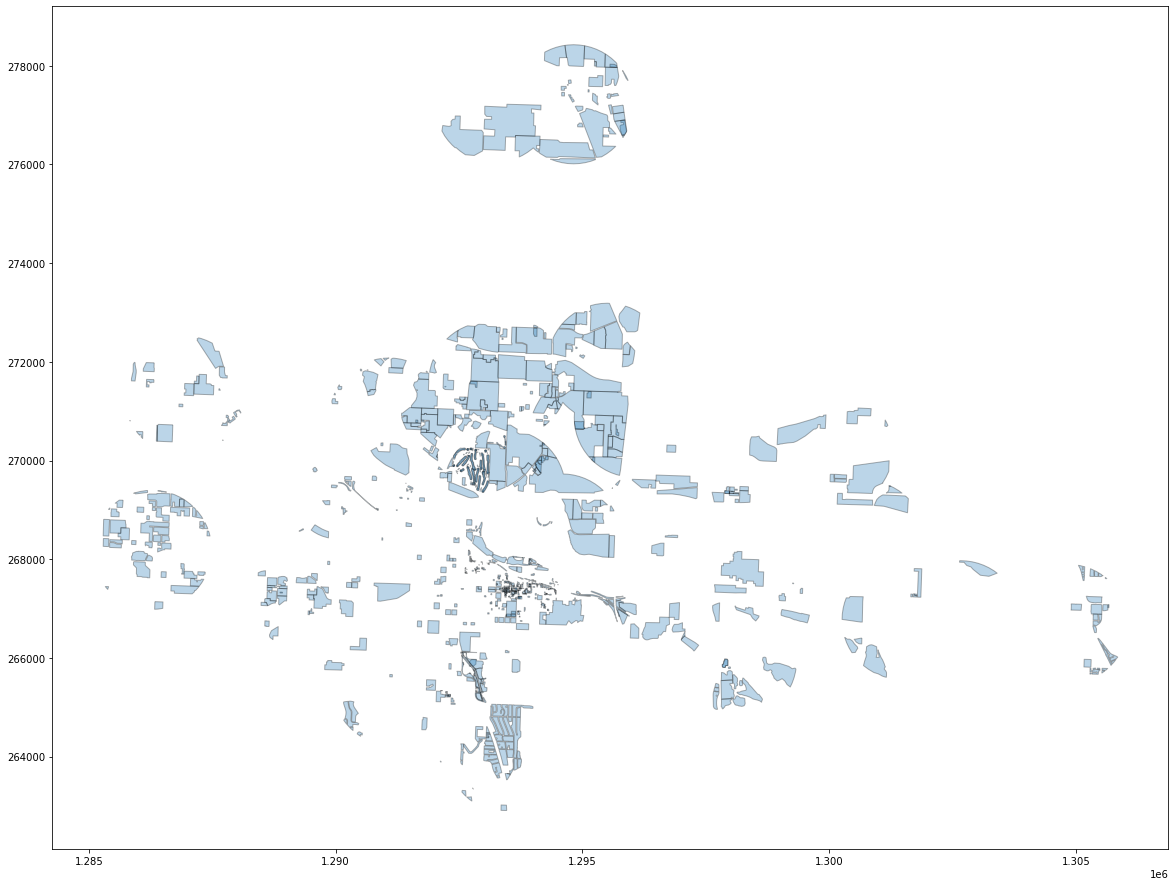

In [94]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [95]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

site_id                          site_name sensor_type  year  region  \
0  P001EUG   Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S068EUG      Friendly St South of 18th Ave  short-term  2019  Eugene   
2  S069EUG      Friendly St South of 28th Ave  short-term  2019  Eugene   
3  S116EUG  Westmoreland Path West of Polk St  short-term  2019  Eugene   
4  P001EUG   Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             1.0  177.231087   2.150685   0.767123    519.0  44.039717   
2             1.0   18.456695   1.520548   0.219178    322.0  44.026832   
3             1.0   53.965428   2.342466   0.424658    263.0  44.035428   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor     osm_id  \
0 -123.119532  corrected STL zone    123498508.0  249499878   
1 -123.105510                 NaN    216890849.0  249499878   
2 -123.105544                 NaN    129170808.0  249499878   
3 -123.112581                 NaN    123371108.0  249499878   
4 -123.119532  corrected STL zone    123498508.0  522645583   

                      name              type  \
0             Graham Field  recreation_groun   
1             Graham Field  recreation_groun   
2             Graham Field  recreation_groun   
3             Graham Field  recreation_groun   
4  Lane County Fairgrounds        commercial   

                                            geometry  
0  POLYGON ((1290617.903 266155.853, 1290292.544 ...  
1  POLYGON ((1290617.903 266155.853, 1290292.544 ...  
2  POLYGON ((1290617.903 266155.853, 1290292.544 ...  
3  POLYGON ((1290617.903 266155.853, 1290292.544 ...  
4  POLYGON ((1291263.090 267446.502, 1291280.471 ...

In [96]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

site_id                          site_name sensor_type  year  region  \
0  P001EUG   Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S068EUG      Friendly St South of 18th Ave  short-term  2019  Eugene   
2  S069EUG      Friendly St South of 28th Ave  short-term  2019  Eugene   
3  S116EUG  Westmoreland Path West of Polk St  short-term  2019  Eugene   
4  P001EUG   Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             1.0  177.231087   2.150685   0.767123    519.0  44.039717   
2             1.0   18.456695   1.520548   0.219178    322.0  44.026832   
3             1.0   53.965428   2.342466   0.424658    263.0  44.035428   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor     osm_id  \
0 -123.119532  corrected STL zone    123498508.0  249499878   
1 -123.105510                 NaN    216890849.0  249499878   
2 -123.105544                 NaN    129170808.0  249499878   
3 -123.112581                 NaN    123371108.0  249499878   
4 -123.119532  corrected STL zone    123498508.0  522645583   

                      name              type  \
0             Graham Field  recreation_groun   
1             Graham Field  recreation_groun   
2             Graham Field  recreation_groun   
3             Graham Field  recreation_groun   
4  Lane County Fairgrounds        commercial   

                                            geometry          Area  
0  POLYGON ((1290617.903 266155.853, 1290292.544 ...  4.946509e+05  
1  POLYGON ((1290617.903 266155.853, 1290292.544 ...  4.946509e+05  
2  POLYGON ((1290617.903 266155.853, 1290292.544 ...  4.946509e+05  
3  POLYGON ((1290617.903 266155.853, 1290292.544 ...  4.946509e+05  
4  POLYGON ((1291263.090 267446.502, 1291280.471 ...  1.560118e+06

#https://geopandas.org/docs/user_guide/set_operations.html

<AxesSubplot:>

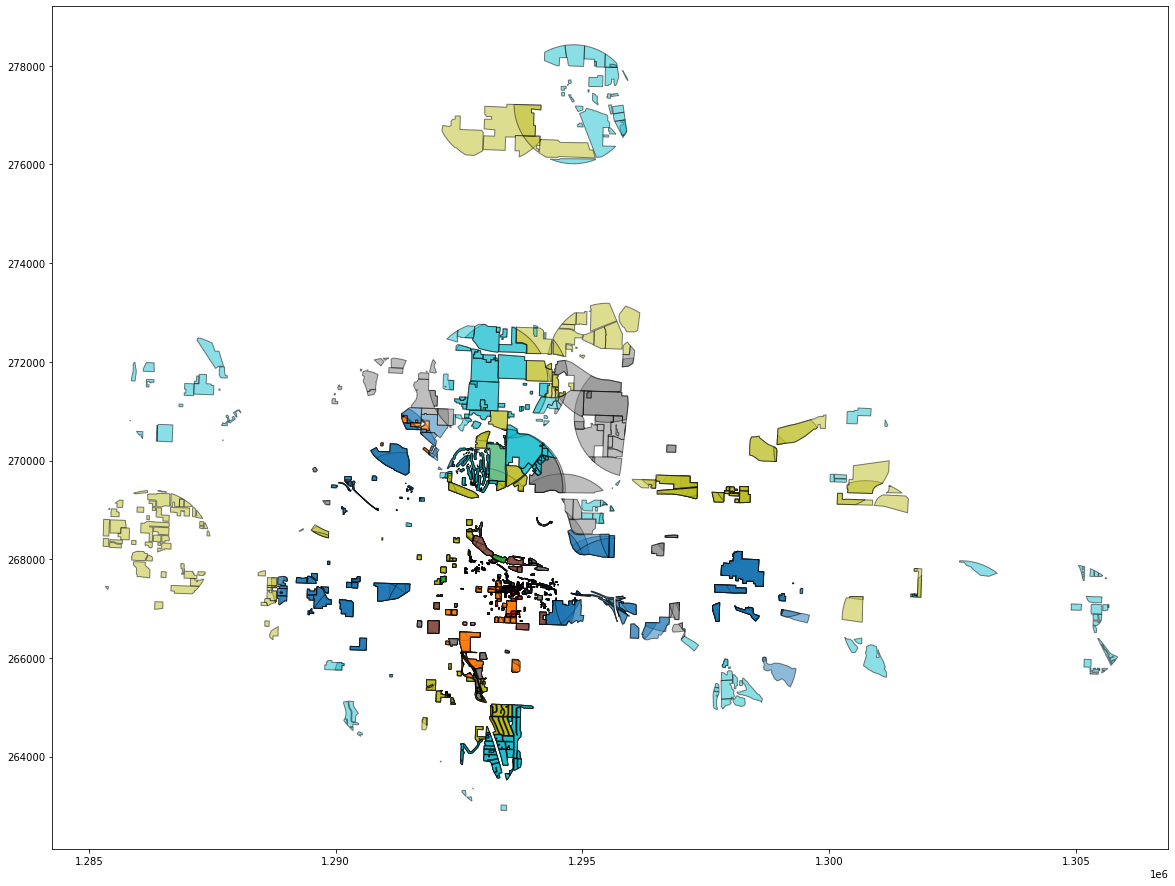

In [97]:
intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [98]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id         type          Area
0  5453222.0   commercial  9.138652e+05
1  5453222.0   industrial  8.915828e+05
2  5453222.0       meadow  2.951368e+03
3  5453222.0  residential  3.879200e+06
4  5480007.0   commercial  5.556778e+04

In [99]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

osm_id  Commercial Area 
0  5453222.0     913865.190583
1  5480007.0      55567.781895
2  5482102.0     208146.456252
3  5483853.0     913865.190583
4  5485472.0     720243.365396

In [100]:
gdf1.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                                            geometry  
0  POLYGON ((1291286.283 267211.026, 1291280.471 ...  
1  POLYGON ((1299625.333 267111.279, 1299619.521 ...  
2  POLYGON ((1296639.570 267262.083, 1296633.758 ...  
3  POLYGON ((1292066.462 270021.192, 1292060.650 ...  
4  POLYGON ((1294432.348 266892.292, 1294426.536 ...

<AxesSubplot:>

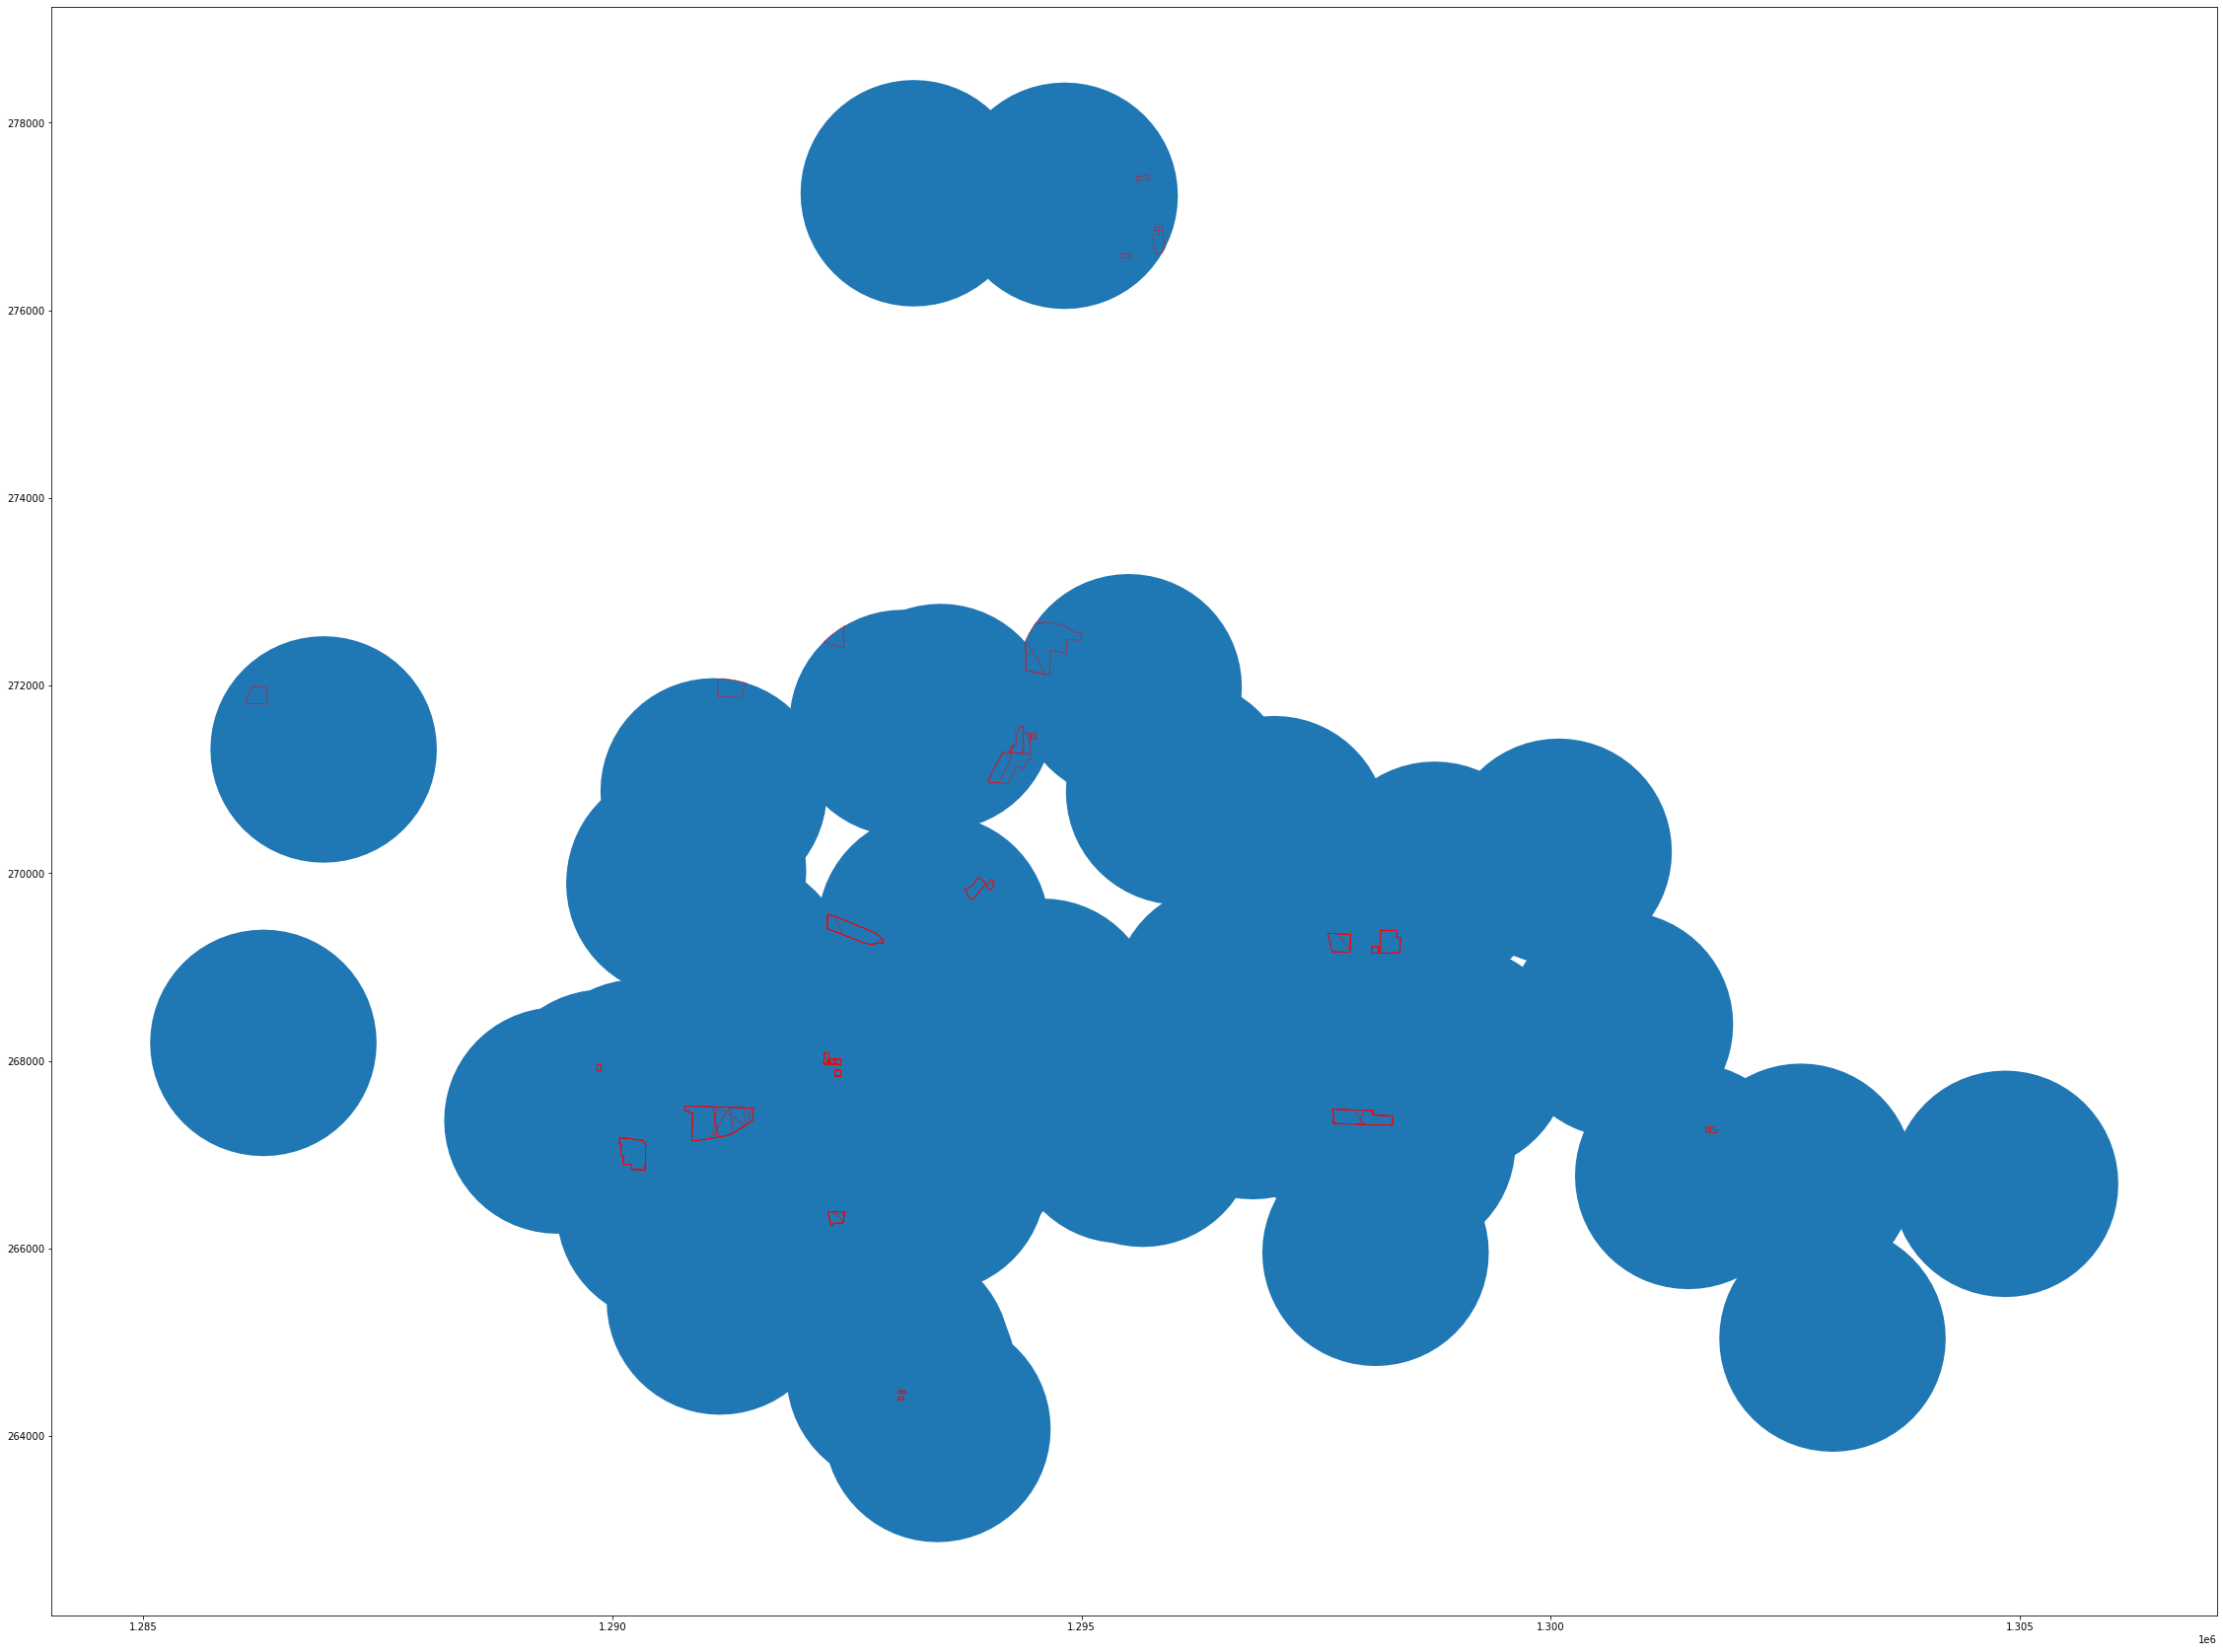

In [101]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [102]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

osm_id  Industrial Area 
0  5453222.0      8.915828e+05
1  5480007.0      2.159979e+06
2  5482102.0      8.141812e+04
3  5483853.0      8.712043e+05
4  5485965.0      5.072804e+05

In [103]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

osm_id  Residential_Area 
0  5453222.0       3.879200e+06
1  5480007.0       4.911632e+05
2  5482102.0       3.190096e+05
3  5483853.0       3.719148e+06
4  5485472.0       2.409715e+07

In [104]:
residential.head(5)

site_id                         site_name sensor_type  year  region  \
35  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
36  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
37  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
38  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
39  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
35             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
36             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
37             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
38             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
39             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

     longitude             comment  osm_id_sensor     osm_id  \
35 -123.119532  corrected STL zone    123498508.0  885323964   
36 -123.117207                 NaN      5503096.0  885323964   
37 -123.121854                 NaN      5485965.0  885323964   
38 -123.127889                 NaN    116382793.0  885323964   
39 -123.105510                 NaN    216890849.0  885323964   

                     name         type  \
35  Springtree Apartments  residential   
36  Springtree Apartments  residential   
37  Springtree Apartments  residential   
38  Springtree Apartments  residential   
39  Springtree Apartments  residential   

                                             geometry           Area  
35  POLYGON ((1290432.411 267646.408, 1290494.510 ...  129831.627594  
36  POLYGON ((1290432.411 267646.408, 1290494.510 ...  129831.627594  
37  POLYGON ((1290432.411 267646.408, 1290494.510 ...  129831.627594  
38  POLYGON ((1290432.411 267646.408, 1290494.510 ...  129831.627594  
39  POLYGON ((1290432.411 267646.408, 1290494.510 ...  129831.627594

<AxesSubplot:>

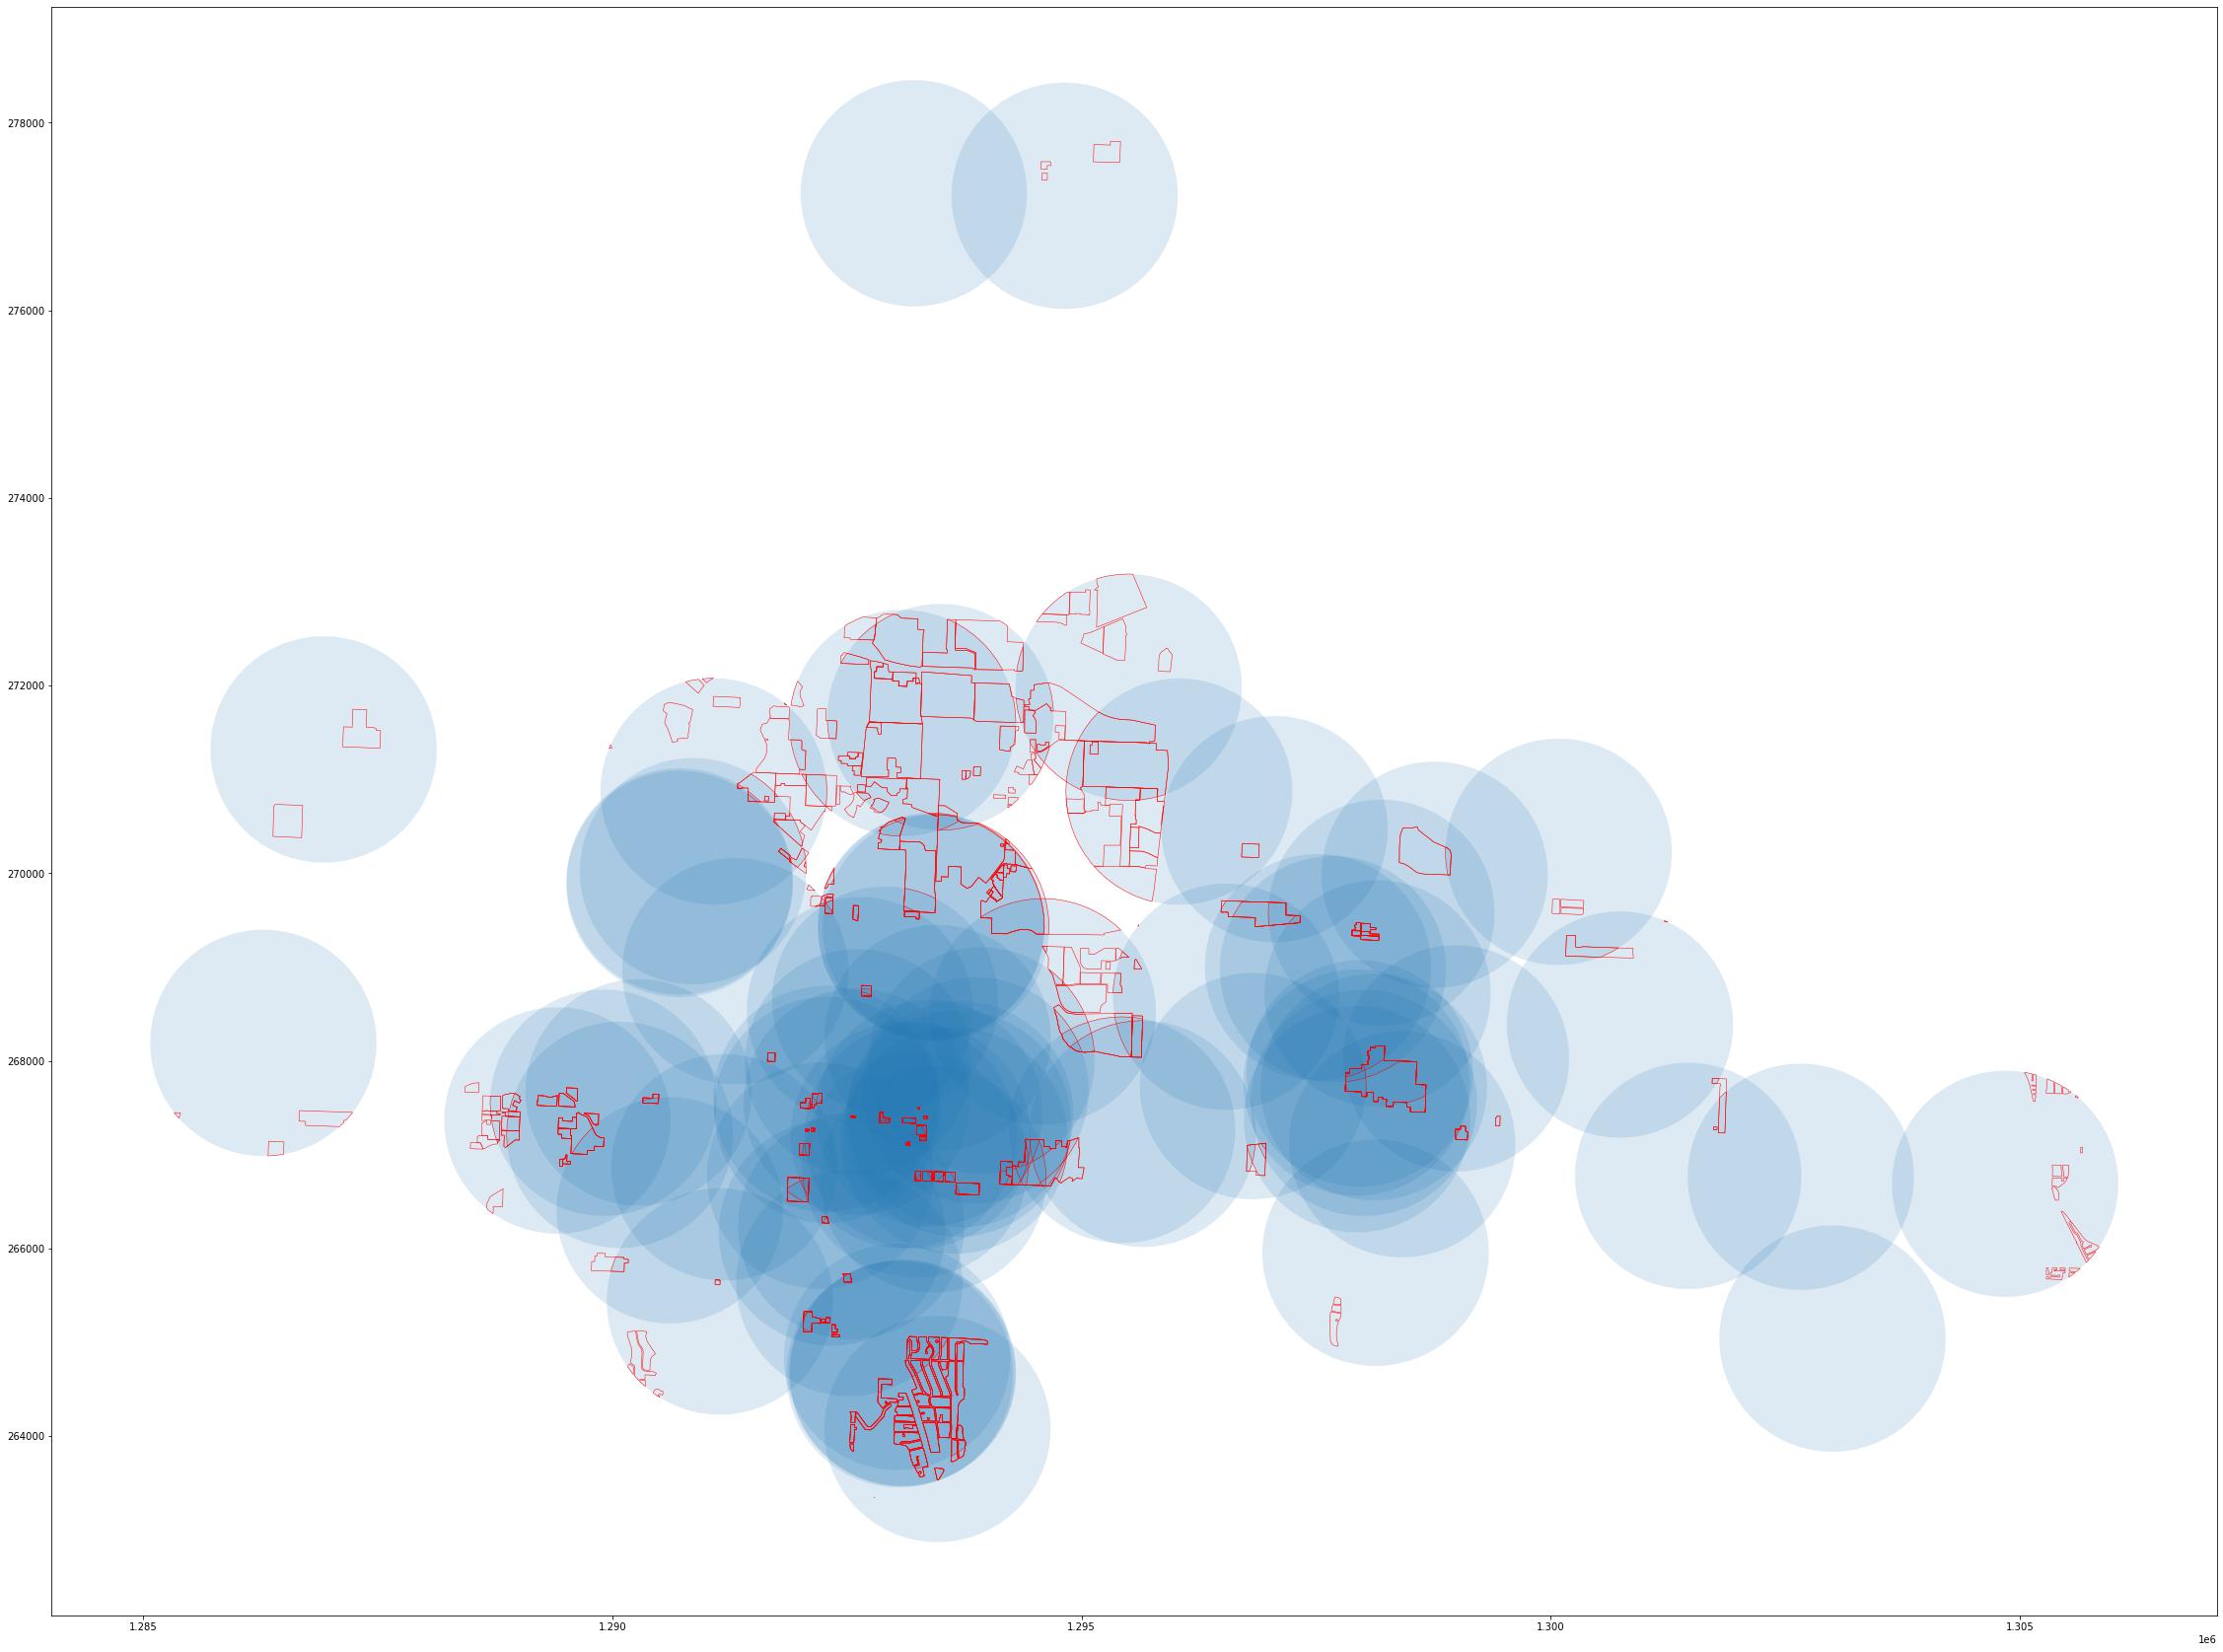

In [105]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [106]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

osm_id   Retail Area
0  5482102.0  2.032657e+06
1  5486345.0  1.281388e+06
2  5489898.0  6.711276e+04
3  5490152.0  4.821587e+05
4  5490801.0  1.226200e+06

In [107]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

osm_id    Grass Area
0  5480007.0  2.324113e+06
1  5482102.0  3.251320e+05
2  5485472.0  5.534939e+04
3  5485965.0  1.473882e+05
4  5486345.0  3.635030e+05

In [108]:
output_grass.index

RangeIndex(start=0, stop=58, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [109]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((-123.11511 44.06993, -123.11502 44.0...
1  25125505  None  forest  POLYGON ((-123.11552 44.07244, -123.11557 44.0...
2  25126014  None   water  POLYGON ((-123.11880 44.08418, -123.11888 44.0...
3  76923818  None  forest  POLYGON ((-123.06730 44.05090, -123.06726 44.0...
4  76923954  None  forest  POLYGON ((-123.04930 44.04564, -123.04901 44.0...

In [110]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2839)
nature_proj.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290536.901 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290500.193 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.218 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295740.552 ...

In [111]:
#nature_proj.plot()

<AxesSubplot:>

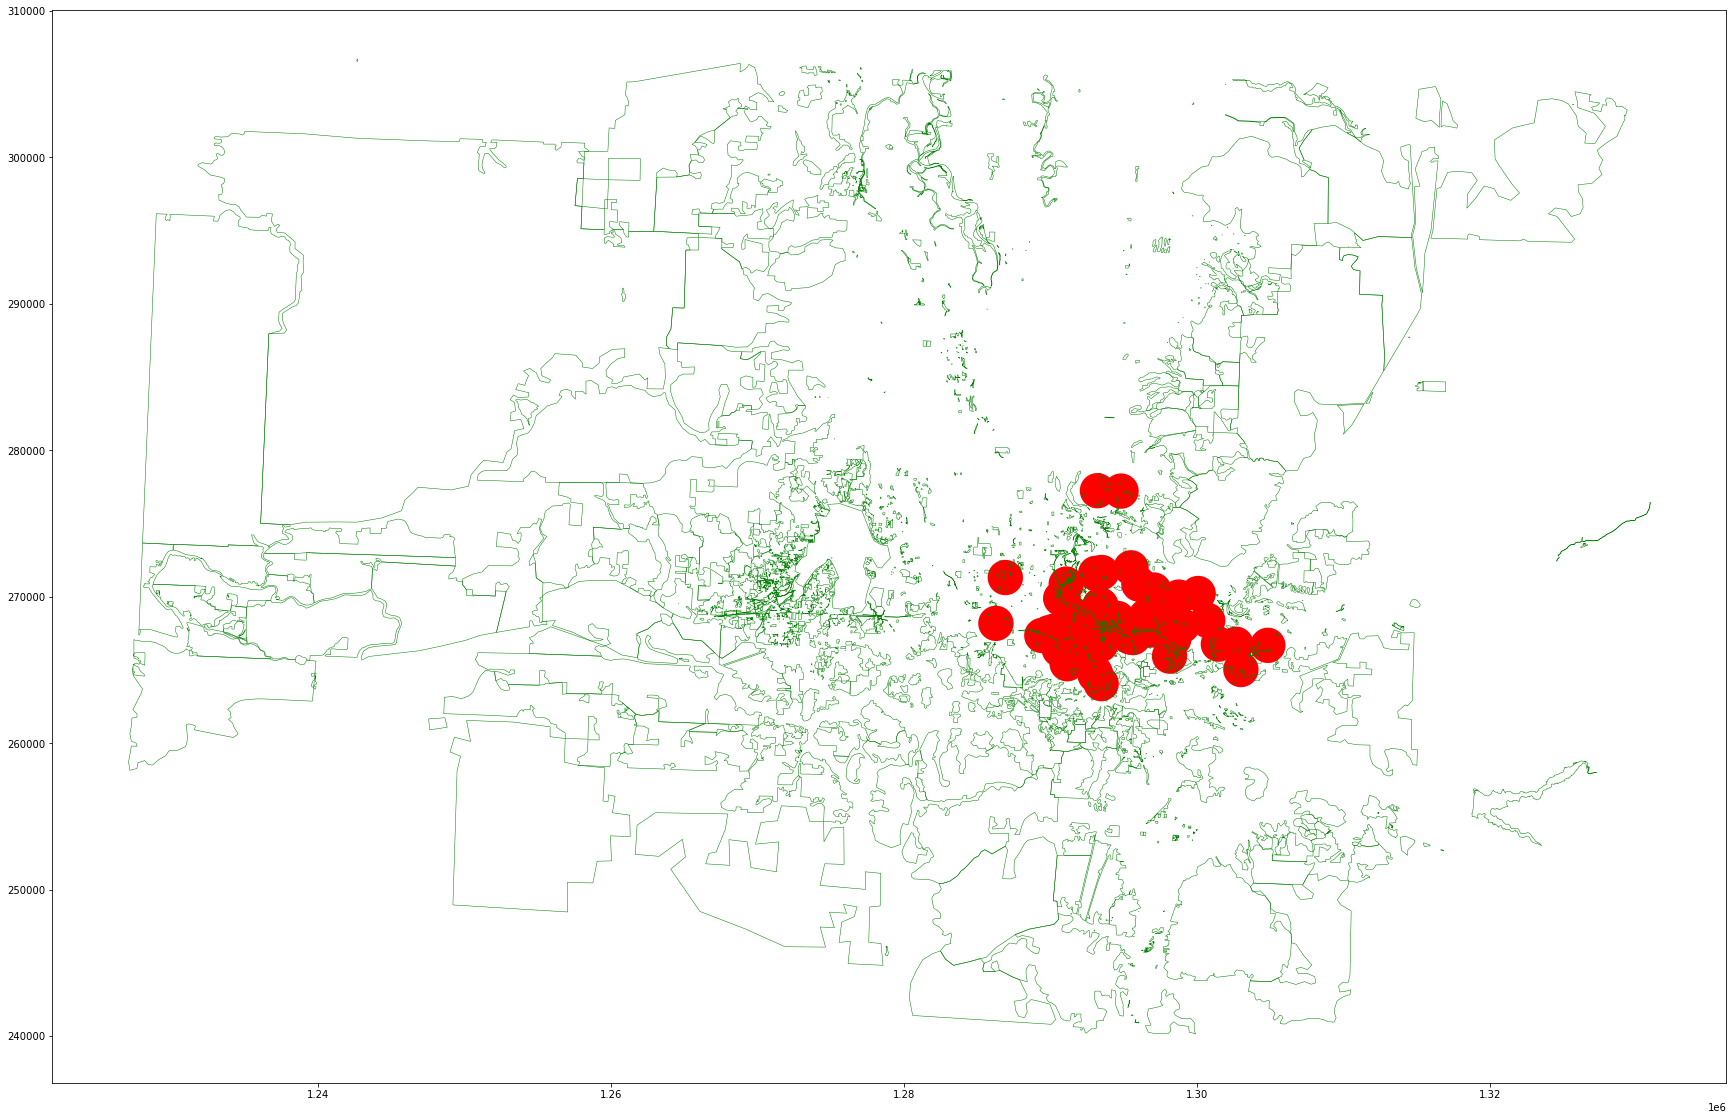

In [112]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [113]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

osm_id  name    type                                           geometry  \
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290536.901 ...   
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290500.193 ...   
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...   
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.218 ...   
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295740.552 ...   

                                           geometry2  
0  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
1  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
2  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
3  POLYGON ((1294293.505 268011.582, 1294296.302 ...  
4  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [114]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

osm_id  name    type                                          geometry2
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [115]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [116]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

osm_id         name    type  \
0   25125504         None  forest   
1   25125505         None  forest   
2   25126014         None   water   
3   76923818         None  forest   
4   76923954         None  forest   
5   76923960         None  forest   
6   78897841         None    park   
7  107098079         None  forest   
8  107946543  Island Park    park   
9  108064134  Island Park    park   

                                            geometry  
0  POLYGON ((1290525.591 270255.398, 1290519.735 ...  
1  POLYGON ((1290511.603 270508.079, 1290514.409 ...  
2  POLYGON ((1290271.704 271764.455, 1290279.099 ...  
3  POLYGON ((1294296.302 268017.299, 1294303.041 ...  
4  POLYGON ((1295724.013 267399.999, 1295733.630 ...  
5  POLYGON ((1294834.369 267605.880, 1294833.239 ...  
6  POLYGON ((1292367.887 268075.876, 1292366.457 ...  
7  POLYGON ((1293114.934 268727.049, 1293117.135 ...  
8  POLYGON ((1297168.319 267617.838, 1297180.200 ...  
9  POLYGON ((1297220.794 267734.476, 1297221.147 ...

In [117]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
2             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
3             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
4             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

    longitude             comment  osm_id_sensor     osm_id  name  type  \
0 -123.119532  corrected STL zone    123498508.0  249500240  None  park   
1 -123.117207                 NaN      5503096.0  249500240  None  park   
2 -123.121854                 NaN      5485965.0  249500240  None  park   
3 -123.127889                 NaN    116382793.0  249500240  None  park   
4 -123.105510                 NaN    216890849.0  249500240  None  park   

                                            geometry  
0  POLYGON ((1290364.933 266950.067, 1290370.908 ...  
1  POLYGON ((1290630.236 266507.491, 1290579.223 ...  
2  POLYGON ((1290574.407 266549.538, 1290489.035 ...  
3  POLYGON ((1290478.410 266794.412, 1290417.514 ...  
4  POLYGON ((1290364.933 266950.067, 1290370.908 ...

In [118]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
2             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
3             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
4             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

    longitude             comment  osm_id_sensor     osm_id  name  type  \
0 -123.119532  corrected STL zone    123498508.0  249500240  None  park   
1 -123.117207                 NaN      5503096.0  249500240  None  park   
2 -123.121854                 NaN      5485965.0  249500240  None  park   
3 -123.127889                 NaN    116382793.0  249500240  None  park   
4 -123.105510                 NaN    216890849.0  249500240  None  park   

                                            geometry          Area  
0  POLYGON ((1290364.933 266950.067, 1290370.908 ...  1.108014e+06  
1  POLYGON ((1290630.236 266507.491, 1290579.223 ...  1.059436e+06  
2  POLYGON ((1290574.407 266549.538, 1290489.035 ...  9.759238e+05  
3  POLYGON ((1290478.410 266794.412, 1290417.514 ...  4.751267e+05  
4  POLYGON ((1290364.933 266950.067, 1290370.908 ...  1.108014e+06

In [119]:
#inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [120]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

osm_id_sensor       type          Area
0      5453222.0     forest  1.421954e+06
1      5453222.0       park  2.415997e+06
2      5480007.0     forest  5.202053e+05
3      5480007.0       park  2.269942e+06
4      5480007.0  riverbank  1.415495e+05

In [121]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

osm_id     Park Area
0  5453222.0  2.415997e+06
1  5480007.0  2.269942e+06
2  5482102.0  6.256086e+06
3  5483853.0  2.123163e+06
4  5485472.0  9.226066e+05

In [122]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

osm_id    Water Area
0  5480007.0  13924.295544
1  5482102.0  28165.267681
2  5485472.0  48973.308063
3  5486345.0  67628.564918
4  5489655.0  28065.077483

In [123]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

osm_id   Forest Area
0  5453222.0  1.421954e+06
1  5480007.0  5.202053e+05
2  5482102.0  2.438342e+04
3  5483853.0  9.318192e+05
4  5485472.0  2.723773e+05

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [124]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head()

osm_id timestamp                              name             type  \
0  36923388      None                              None           switch   
1  38407075      None                              None   turning_circle   
2  39411767      None  North Fork Smith River Trailhead          parking   
3  39649617      None                              None   turning_circle   
4  39649659      None                              None  traffic_signals   

                      geometry  
0  POINT (-123.29798 44.33904)  
1  POINT (-122.95975 44.04104)  
2  POINT (-123.82831 43.87484)  
3  POINT (-122.89622 44.04123)  
4  POINT (-123.09733 44.05323)

In [125]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2839)
pts_proj.head()

osm_id timestamp                              name             type  \
0  36923388      None                              None           switch   
1  38407075      None                              None   turning_circle   
2  39411767      None  North Fork Smith River Trailhead          parking   
3  39649617      None                              None   turning_circle   
4  39649659      None                              None  traffic_signals   

                         geometry  
0  POINT (1276886.066 300604.651)  
1  POINT (1302876.067 266657.889)  
2  POINT (1232567.874 250611.592)  
3  POINT (1307966.627 266531.918)  
4  POINT (1291896.251 268344.866)

<AxesSubplot:>

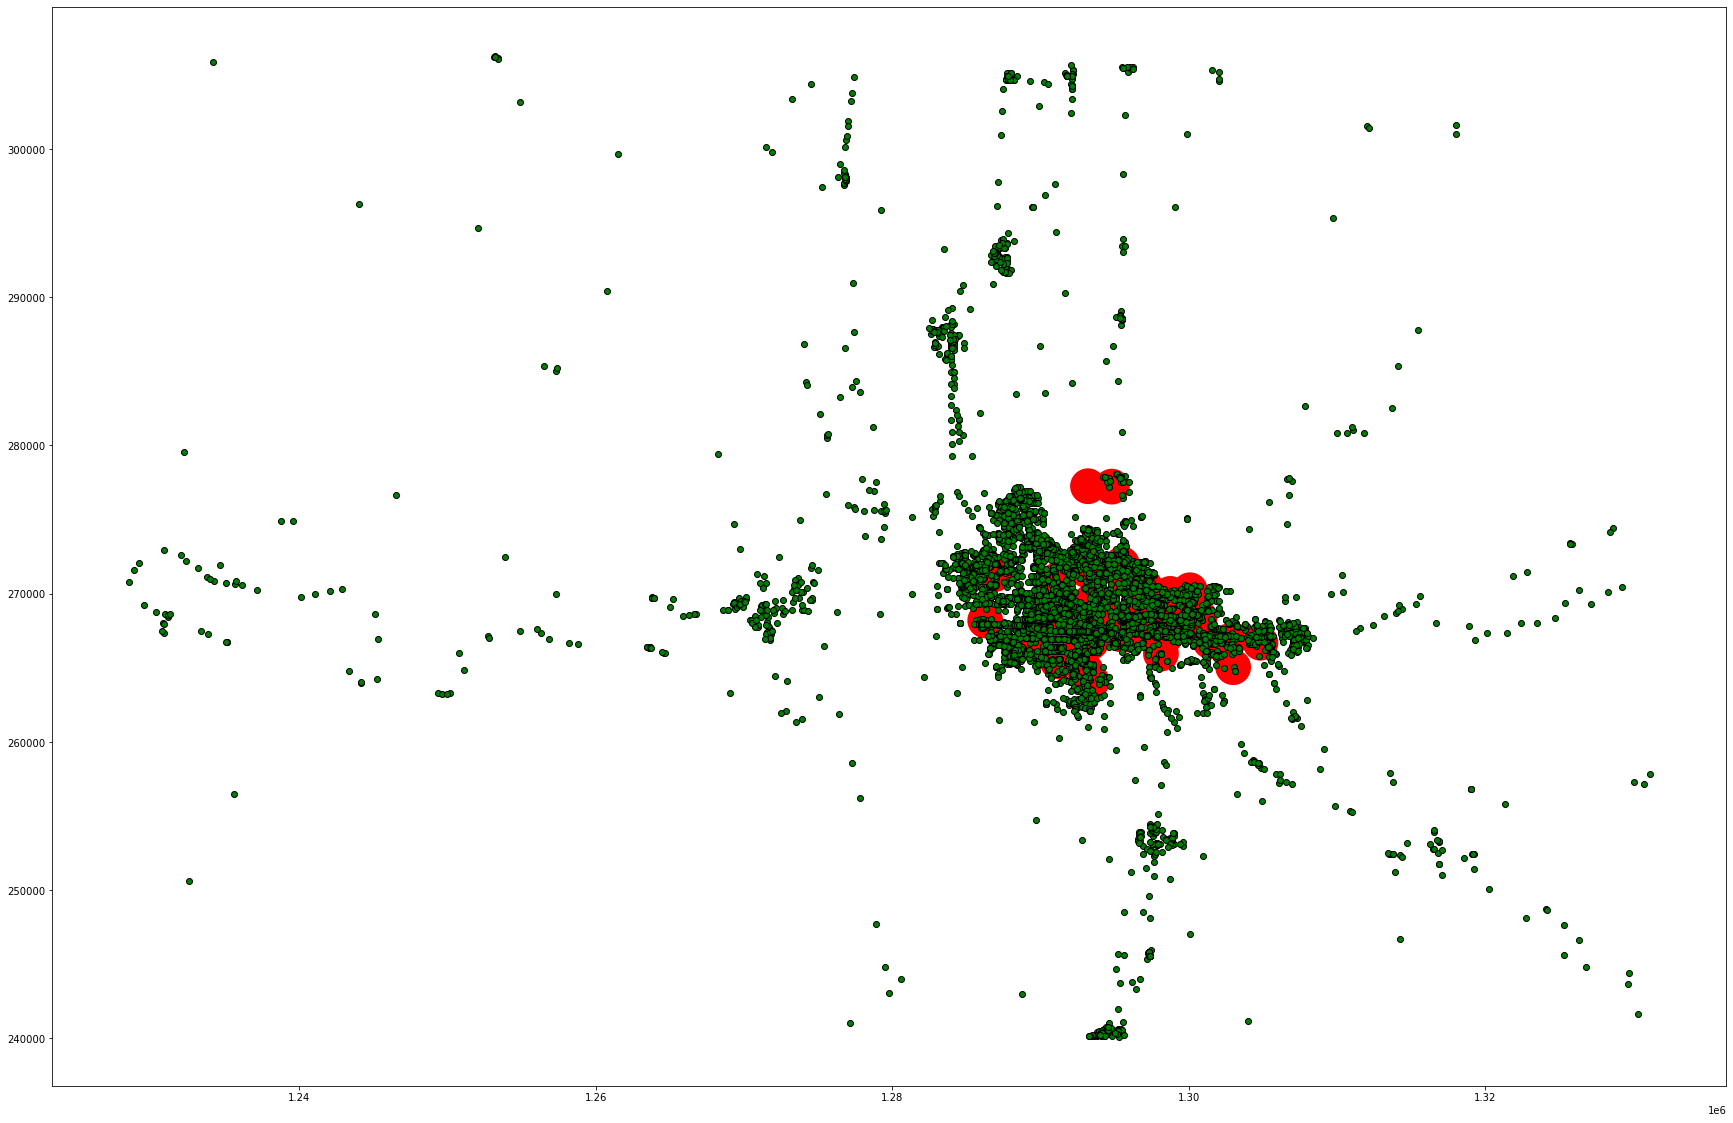

In [126]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [127]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head()

osm_id timestamp  name             type                        geometry
1  38407075      None  None   turning_circle  POINT (1302876.067 266657.889)
4  39649659      None  None  traffic_signals  POINT (1291896.251 268344.866)
5  39649660      None  None  traffic_signals  POINT (1291893.511 268222.688)
6  39649662      None  None  traffic_signals  POINT (1291889.024 268088.125)
7  39649668      None  None  traffic_signals  POINT (1291876.991 267731.526)

In [128]:
#ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [129]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
2             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
3             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
4             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

    longitude             comment  osm_id_sensor    osm_id timestamp  name  \
0 -123.119532  corrected STL zone    123498508.0  40094576      None  None   
1 -123.117207                 NaN      5503096.0  40094576      None  None   
2 -123.121854                 NaN      5485965.0  40094576      None  None   
3 -123.127889                 NaN    116382793.0  40094576      None  None   
4 -123.105510                 NaN    216890849.0  40094576      None  None   

             type                        geometry  
0  turning_circle  POINT (1290301.239 266791.330)  
1  turning_circle  POINT (1290301.239 266791.330)  
2  turning_circle  POINT (1290301.239 266791.330)  
3  turning_circle  POINT (1290301.239 266791.330)  
4  turning_circle  POINT (1290301.239 266791.330)

# Calculate the bicycle parking

In [130]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


site_id                         site_name sensor_type  year  region  \
367   P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
368   S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
369   S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
370   S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
1341  P002EUG       Millrace Path @ Booth Kelly   permanent  2019  Eugene   

      travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
367              2.0  513.408379  12.575342   3.780822    985.0  44.042515   
368              2.0   93.186492   1.438356   1.191781    787.0  44.046633   
369              1.0   83.037733   4.890411   1.479452    778.0  44.045543   
370              2.0   53.858767   0.684932   0.164384    438.0  44.043698   
1341             3.0  109.807738   7.780822   2.397260    203.0  44.043919   

       longitude             comment  osm_id_sensor      osm_id timestamp  \
367  -123.119532  corrected STL zone    123498508.0 -1832404115      None   
368  -123.117207                 NaN      5503096.0 -1832404115      None   
369  -123.121854                 NaN      5485965.0 -1832404115      None   
370  -123.127889                 NaN    116382793.0 -1832404115      None   
1341 -123.015499                 NaN    618082822.0 -1685948873      None   

      name             type                        geometry  
367   None  bicycle_parking  POINT (1290034.451 267684.565)  
368   None  bicycle_parking  POINT (1290034.451 267684.565)  
369   None  bicycle_parking  POINT (1290034.451 267684.565)  
370   None  bicycle_parking  POINT (1290034.451 267684.565)  
1341  None  bicycle_parking  POINT (1298161.034 265940.629)

In [131]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

osm_id  Bicycle Parking
0  5453222.0               12
1  5480007.0                9
2  5482102.0               24
3  5483853.0               12
4  5485965.0                1

# Calculate bus stops

In [132]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

site_id                         site_name sensor_type  year  region  \
161  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
162  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
163  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
164  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
165  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

     travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
161             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
162             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
163             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
164             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
165             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

      longitude             comment  osm_id_sensor      osm_id timestamp  \
161 -123.119532  corrected STL zone    123498508.0  1377296160      None   
162 -123.117207                 NaN      5503096.0  1377296160      None   
163 -123.121854                 NaN      5485965.0  1377296160      None   
164 -123.127889                 NaN    116382793.0  1377296160      None   
165 -123.105510                 NaN    216890849.0  1377296160      None   

     name      type                        geometry  
161  None  bus_stop  POINT (1290275.877 266958.175)  
162  None  bus_stop  POINT (1290275.877 266958.175)  
163  None  bus_stop  POINT (1290275.877 266958.175)  
164  None  bus_stop  POINT (1290275.877 266958.175)  
165  None  bus_stop  POINT (1290275.877 266958.175)

In [133]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

osm_id  Bus Stops
0  5453222.0         38
1  5480007.0          1
2  5482102.0         18
3  5483853.0         41
4  5485472.0          1

# Calculate school/college/university

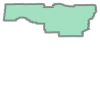

In [134]:
polygon = pba.to_crs(4326).iloc[0]
polygon

In [135]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [136]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2839)
scl_proj.head(5)
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0  5453222.0       8
1  5480007.0       2
2  5482102.0       1
3  5483853.0       8
4  5485472.0       4

# Closest distance to school

In [137]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance.head()

osm_id  min_dist_to_school
0  123498508.0          628.532553
1  618082822.0          879.755548
2  106993273.0         5010.229468
3  107098076.0         2793.158332
4  680124010.0         1869.438425

In [139]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2839)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  college
0   88379128.0        1
1  129170725.0        1
2  234785500.0        1
3  498988293.0        1
4  498988297.0        1

# Closest distance to college

In [141]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0  123498508.0          6934.212066
1  618082822.0         20933.140361
2  106993273.0         11170.247924
3  107098076.0          8094.508350
4  680124010.0          4950.178177

In [142]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2839)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

osm_id  University
0   5490152.0           1
1   5507042.0           1
2  29249558.0           1
3  76792095.0           1
4  76793404.0           1

# Closest distance to university

In [145]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_university
0  123498508.0            10591.197533
1  618082822.0            13217.559590
2  106993273.0             4992.440022
3  107098076.0            10941.097886
4  680124010.0             1647.205849

# Calculate OSM Node Densitydensity

In [146]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


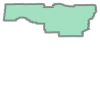

In [147]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [148]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [149]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count highway  ref  \
osmid                                                        
38276093  43.517605 -122.744959             2     NaN  NaN   
38276096  43.517791 -122.744599             2     NaN  NaN   
38276126  43.519899 -122.741529             3     NaN  NaN   
39117945  43.520993 -122.741372             1     NaN  NaN   
39117959  43.522682 -122.742025             2     NaN  NaN   

                             geometry  
osmid                                  
38276093  POINT (-122.74496 43.51760)  
38276096  POINT (-122.74460 43.51779)  
38276126  POINT (-122.74153 43.51990)  
39117945  POINT (-122.74137 43.52099)  
39117959  POINT (-122.74203 43.52268)

In [150]:
print(nodes.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2839)
node_proj.head(5)

y           x  street_count highway  ref  \
osmid                                                        
38276093  43.517605 -122.744959             2     NaN  NaN   
38276096  43.517791 -122.744599             2     NaN  NaN   
38276126  43.519899 -122.741529             3     NaN  NaN   
39117945  43.520993 -122.741372             1     NaN  NaN   
39117959  43.522682 -122.742025             2     NaN  NaN   

                                geometry  
osmid                                     
38276093  POINT (1318526.550 208040.407)  
38276096  POINT (1318556.207 208060.349)  
38276126  POINT (1318810.582 208287.781)  
39117945  POINT (1318826.482 208408.957)  
39117959  POINT (1318778.766 208597.927)

In [152]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count         highway  ref  \
osmid                                                                
38407075  44.041037 -122.959752             1  turning_circle  NaN   
38407076  44.041091 -122.958768             3             NaN  NaN   
39649625  44.060358 -123.095629             2             NaN  NaN   
39649628  44.060274 -123.096071             2             NaN  NaN   
39649631  44.060221 -123.096265             2             NaN  NaN   

                                geometry  
osmid                                     
38407075  POINT (1302876.067 266657.889)  
38407076  POINT (1302955.054 266661.550)  
39649625  POINT (1292056.753 269132.341)  
39649628  POINT (1292021.066 269124.132)  
39649631  POINT (1292005.338 269118.728)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


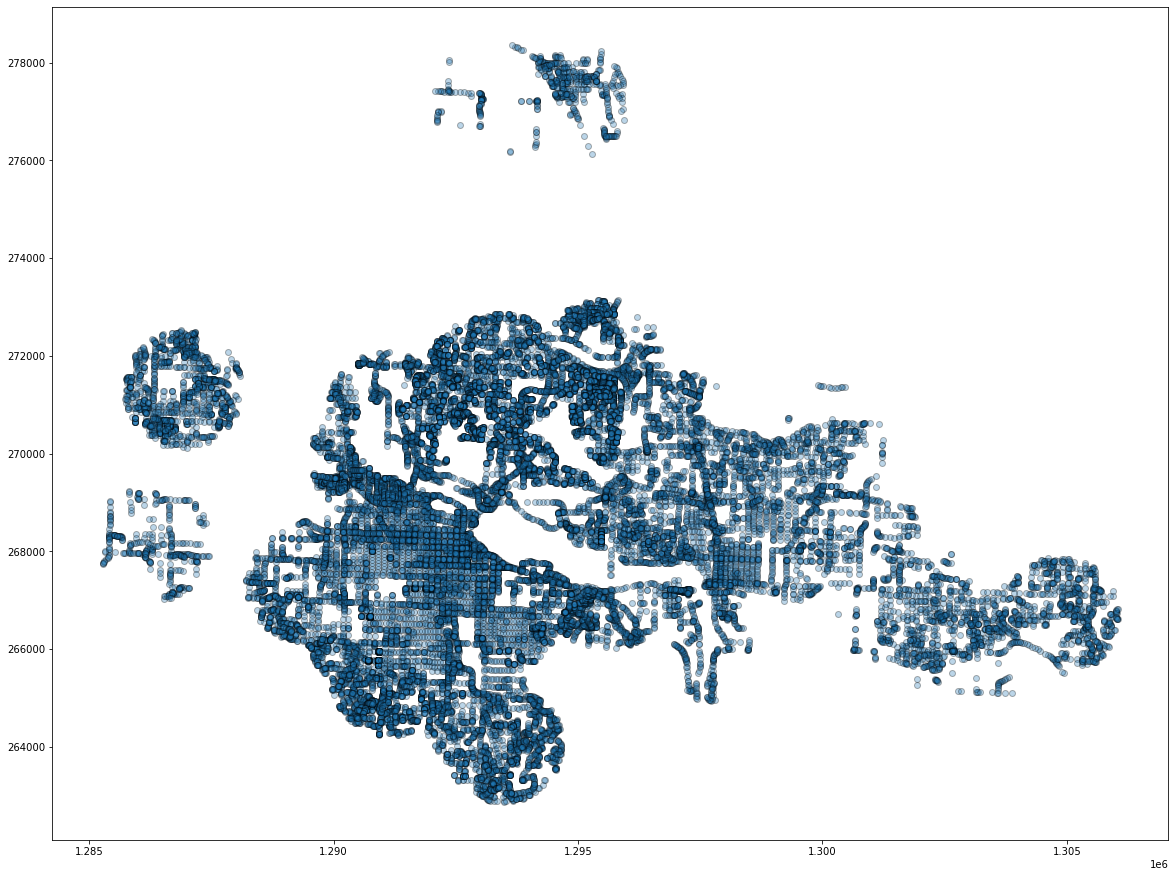

In [153]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [154]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0   93.186492   1.438356   1.191781    787.0  44.046633   
2             1.0   83.037733   4.890411   1.479452    778.0  44.045543   
3             2.0   53.858767   0.684932   0.164384    438.0  44.043698   
4             1.0  177.231087   2.150685   0.767123    519.0  44.039717   

    longitude             comment  osm_id_sensor          y           x  \
0 -123.119532  corrected STL zone    123498508.0  44.047185 -123.115823   
1 -123.117207                 NaN      5503096.0  44.047185 -123.115823   
2 -123.121854                 NaN      5485965.0  44.047185 -123.115823   
3 -123.127889                 NaN    116382793.0  44.047185 -123.115823   
4 -123.105510                 NaN    216890849.0  44.047185 -123.115823   

   street_count highway  ref                        geometry  
0             2     NaN  NaN  POINT (1290393.744 267719.721)  
1             2     NaN  NaN  POINT (1290393.744 267719.721)  
2             2     NaN  NaN  POINT (1290393.744 267719.721)  
3             2     NaN  NaN  POINT (1290393.744 267719.721)  
4             2     NaN  NaN  POINT (1290393.744 267719.721)

In [155]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-7)
output_intersection_density.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor
5453222.0     613.420513
5480007.0     314.066776
5482102.0    1083.671848
5483853.0     680.760957
5485472.0    1308.894509
Name: geometry, dtype: float64

In [156]:
output_intersection_density1=output_intersection_density.reset_index()
output_intersection_density1.columns=["osm_id","OSM_node_Density"]
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  5453222.0        613.420513
1  5480007.0        314.066776
2  5482102.0       1083.671848
3  5483853.0        680.760957
4  5485472.0       1308.894509

# Calculate the  intersection density

In [157]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

In [159]:
# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2839)
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
outputa_intersection_density= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_densitya=outputa_intersection_density.reset_index()
output_intersection_densitya.columns=["osm_id","Intersection_Density"]
output_intersection_densitya.head()

osm_id  Intersection_Density
0  5453222.0            162.409306
1  5480007.0            121.099622
2  5482102.0            168.068166
3  5483853.0            172.029369
4  5485472.0            237.106269

# Calculate the Number of Lanes

In [160]:
edges.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid       highway  oneway  length         name  \
u        v          key                                                         
38276093 38276096   0      5354848  unclassified   False  35.688          NaN   
         4725896975 0    479498492  unclassified   False  25.024  Blm Road 26   
38276096 4725861911 0      5354848  unclassified   False  29.390          NaN   
         38276093   0      5354848  unclassified   False  35.688          NaN   
38276126 4725861925 0      5354848  unclassified   False  27.354          NaN   

                         ref lanes bridge maxspeed access tunnel junction  \
u        v          key                                                     
38276093 38276096   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         4725896975 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276096 4725861911 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         38276093   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276126 4725861925 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   

                        service  \
u        v          key           
38276093 38276096   0       NaN   
         4725896975 0       NaN   
38276096 4725861911 0       NaN   
         38276093   0       NaN   
38276126 4725861925 0       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (-122.74496 43.51760, -122.74460 43...  
         4725896975 0    LINESTRING (-122.74496 43.51760, -122.74511 43...  
38276096 4725861911 0    LINESTRING (-122.74460 43.51779, -122.74428 43...  
         38276093   0    LINESTRING (-122.74460 43.51779, -122.74496 43...  
38276126 4725861925 0    LINESTRING (-122.74153 43.51990, -122.74119 43...

In [161]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2839)
edge_proj.head(5)

osmid       highway  oneway  length         name  \
u        v          key                                                         
38276093 38276096   0      5354848  unclassified   False  35.688          NaN   
         4725896975 0    479498492  unclassified   False  25.024  Blm Road 26   
38276096 4725861911 0      5354848  unclassified   False  29.390          NaN   
         38276093   0      5354848  unclassified   False  35.688          NaN   
38276126 4725861925 0      5354848  unclassified   False  27.354          NaN   

                         ref lanes bridge maxspeed access tunnel junction  \
u        v          key                                                     
38276093 38276096   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         4725896975 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276096 4725861911 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         38276093   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276126 4725861925 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   

                        service  \
u        v          key           
38276093 38276096   0       NaN   
         4725896975 0       NaN   
38276096 4725861911 0       NaN   
         38276093   0       NaN   
38276126 4725861925 0       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (1318526.550 208040.407, 1318556.20...  
         4725896975 0    LINESTRING (1318526.550 208040.407, 1318513.68...  
38276096 4725861911 0    LINESTRING (1318556.207 208060.349, 1318582.05...  
         38276093   0    LINESTRING (1318556.207 208060.349, 1318526.55...  
38276126 4725861925 0    LINESTRING (1318810.582 208287.781, 1318837.85...

In [163]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid   highway  oneway   length  \
u        v          key                                         
39653013 2093287338 0    199327000   primary   False  188.591   
         40247805   0    199327000   primary   False   88.691   
39655434 2832362065 0    278950369  tertiary   False   57.219   
         2832362066 0    278950369  tertiary   False   37.284   
39655445 2832362062 0    278950369  tertiary   False   36.698   
         40298252   0    278950369  tertiary   False  158.551   
39665812 40111231   0    199484603  tertiary   False   12.962   
         2822805631 0    199484603  tertiary   False   91.009   
39665829 40111175   0    199484603  tertiary   False   44.976   
         40111239   0    199484603  tertiary   False   66.791   

                                      name    ref lanes bridge maxspeed  \
u        v          key                                                   
39653013 2093287338 0     State Highway 58  OR 58     2    NaN      NaN   
         40247805   0     State Highway 58  OR 58     2    NaN      NaN   
39655434 2832362065 0    Aufderheide Drive  NF 19     2    NaN      NaN   
         2832362066 0    Aufderheide Drive  NF 19     2    NaN      NaN   
39655445 2832362062 0    Aufderheide Drive  NF 19     2    NaN      NaN   
         40298252   0    Aufderheide Drive  NF 19     2    NaN      NaN   
39665812 40111231   0    Aufderheide Drive  NF 19     2    NaN      NaN   
         2822805631 0    Aufderheide Drive  NF 19     2    NaN      NaN   
39665829 40111175   0    Aufderheide Drive  NF 19     2    NaN      NaN   
         40111239   0    Aufderheide Drive  NF 19     2    NaN      NaN   

                        access tunnel junction service  \
u        v          key                                  
39653013 2093287338 0      NaN    NaN      NaN     NaN   
         40247805   0      NaN    NaN      NaN     NaN   
39655434 2832362065 0      NaN    NaN      NaN     NaN   
         2832362066 0      NaN    NaN      NaN     NaN   
39655445 2832362062 0      NaN    NaN      NaN     NaN   
         40298252   0      NaN    NaN      NaN     NaN   
39665812 40111231   0      NaN    NaN      NaN     NaN   
         2822805631 0      NaN    NaN      NaN     NaN   
39665829 40111175   0      NaN    NaN      NaN     NaN   
         40111239   0      NaN    NaN      NaN     NaN   

                                                                  geometry  
u        v          key                                                     
39653013 2093287338 0    LINESTRING (1359452.054 224849.740, 1359530.89...  
         40247805   0    LINESTRING (1359452.054 224849.740, 1359414.21...  
39655434 2832362065 0    LINESTRING (1357891.514 247830.237, 1357834.37...  
         2832362066 0    LINESTRING (1357891.514 247830.237, 1357928.47...  
39655445 2832362062 0    LINESTRING (1357197.089 248005.603, 1357165.23...  
         40298252   0    LINESTRING (1357197.089 248005.603, 1357339.07...  
39665812 40111231   0    LINESTRING (1339892.997 235214.810, 1339898.03...  
         2822805631 0    LINESTRING (1339892.997 235214.810, 1339877.47...  
39665829 40111175   0    LINESTRING (1340058.432 235506.764, 1340088.05...  
         40111239   0    LINESTRING (1340058.432 235506.764, 1340014.94...

In [164]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
ecoshort_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)          628.532553          6934.212066   
1  POINT (1298418.325 267111.279)          879.755548         20933.140361   
2  POINT (1295432.562 267262.083)         5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)         2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)         1869.438425          4950.178177   

   min_dist_to_university lanes  
0            10591.197533     2  
1            13217.559590     2  
2             4992.440022     2  
3            10941.097886     2  
4             1647.205849     1

In [166]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id lanes
0  123498508.0     2
1  618082822.0     2
2  106993273.0     2
3  107098076.0     2
4  680124010.0     1

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [167]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [169]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [170]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [171]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid       highway  oneway   length  \
u        v          key                                             
38276093 38276096   0      5354848  unclassified   False   35.688   
         4725896976 0      5430117         track   False  104.774   
         4725896975 0    479498492  unclassified   False   25.024   
38276096 4725861911 0      5354848  unclassified   False   29.390   
         38276093   0      5354848  unclassified   False   35.688   

                                                name bridge  ref lanes access  \
u        v          key                                                         
38276093 38276096   0                            NaN    NaN  NaN   NaN    NaN   
         4725896976 0    Bureau of Land Mgmt Rd 11.0    NaN  NaN   NaN    NaN   
         4725896975 0                    Blm Road 26    NaN  NaN   NaN    NaN   
38276096 4725861911 0                            NaN    NaN  NaN   NaN    NaN   
         38276093   0                            NaN    NaN  NaN   NaN    NaN   

                        service width maxspeed tunnel cycleway junction  \
u        v          key                                                   
38276093 38276096   0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896976 0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896975 0       NaN   NaN      NaN    NaN      NaN      NaN   
38276096 4725861911 0       NaN   NaN      NaN    NaN      NaN      NaN   
         38276093   0       NaN   NaN      NaN    NaN      NaN      NaN   

                        cycleway:right cycleway:left est_width  \
u        v          key                                          
38276093 38276096   0              NaN           NaN       NaN   
         4725896976 0              NaN           NaN       NaN   
         4725896975 0              NaN           NaN       NaN   
38276096 4725861911 0              NaN           NaN       NaN   
         38276093   0              NaN           NaN       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (-122.74496 43.51760, -122.74460 43...  
         4725896976 0    LINESTRING (-122.74496 43.51760, -122.74625 43...  
         4725896975 0    LINESTRING (-122.74496 43.51760, -122.74511 43...  
38276096 4725861911 0    LINESTRING (-122.74460 43.51779, -122.74428 43...  
         38276093   0    LINESTRING (-122.74460 43.51779, -122.74496 43...

In [172]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2839)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid       highway  oneway   length  \
u        v          key                                             
38276093 38276096   0      5354848  unclassified   False   35.688   
         4725896976 0      5430117         track   False  104.774   
         4725896975 0    479498492  unclassified   False   25.024   
38276096 4725861911 0      5354848  unclassified   False   29.390   
         38276093   0      5354848  unclassified   False   35.688   

                                                name bridge  ref lanes access  \
u        v          key                                                         
38276093 38276096   0                            NaN    NaN  NaN   NaN    NaN   
         4725896976 0    Bureau of Land Mgmt Rd 11.0    NaN  NaN   NaN    NaN   
         4725896975 0                    Blm Road 26    NaN  NaN   NaN    NaN   
38276096 4725861911 0                            NaN    NaN  NaN   NaN    NaN   
         38276093   0                            NaN    NaN  NaN   NaN    NaN   

                        service width maxspeed tunnel cycleway junction  \
u        v          key                                                   
38276093 38276096   0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896976 0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896975 0       NaN   NaN      NaN    NaN      NaN      NaN   
38276096 4725861911 0       NaN   NaN      NaN    NaN      NaN      NaN   
         38276093   0       NaN   NaN      NaN    NaN      NaN      NaN   

                        cycleway:right cycleway:left est_width  \
u        v          key                                          
38276093 38276096   0              NaN           NaN       NaN   
         4725896976 0              NaN           NaN       NaN   
         4725896975 0              NaN           NaN       NaN   
38276096 4725861911 0              NaN           NaN       NaN   
         38276093   0              NaN           NaN       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (1318526.550 208040.407, 1318556.20...  
         4725896976 0    LINESTRING (1318526.550 208040.407, 1318421.74...  
         4725896975 0    LINESTRING (1318526.550 208040.407, 1318513.68...  
38276096 4725861911 0    LINESTRING (1318556.207 208060.349, 1318582.05...  
         38276093   0    LINESTRING (1318556.207 208060.349, 1318526.55...

In [173]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      highway  oneway  length  \
u        v          key                                         
38407075 968358832  0    5453137  residential   False  16.528   
38407076 968358832  0    5453137  residential   False  63.234   
         40297643   0    5500474  residential   False  38.281   
         968358825  0    5500474  residential   False  24.680   
39649625 7391423285 0    5453142  residential   False  10.544   

                                      name bridge  ref lanes access service  \
u        v          key                                                       
38407075 968358832  0    Elderberry Street    NaN  NaN   NaN    NaN     NaN   
38407076 968358832  0    Elderberry Street    NaN  NaN   NaN    NaN     NaN   
         40297643   0    South 44th Street    NaN  NaN   NaN    NaN     NaN   
         968358825  0    South 44th Street    NaN  NaN   NaN    NaN     NaN   
39649625 7391423285 0       Lincoln Street    NaN  NaN   NaN    NaN     NaN   

                        width maxspeed tunnel cycleway junction  \
u        v          key                                           
38407075 968358832  0     NaN      NaN    NaN      NaN      NaN   
38407076 968358832  0     NaN      NaN    NaN      NaN      NaN   
         40297643   0     NaN      NaN    NaN      NaN      NaN   
         968358825  0     NaN      NaN    NaN      NaN      NaN   
39649625 7391423285 0     NaN      NaN    NaN      NaN      NaN   

                        cycleway:right cycleway:left est_width  \
u        v          key                                          
38407075 968358832  0              NaN           NaN       NaN   
38407076 968358832  0              NaN           NaN       NaN   
         40297643   0              NaN           NaN       NaN   
         968358825  0              NaN           NaN       NaN   
39649625 7391423285 0              NaN           NaN       NaN   

                                                                  geometry  
u        v          key                                                     
38407075 968358832  0    LINESTRING (1302876.067 266657.889, 1302891.67...  
38407076 968358832  0    LINESTRING (1302955.054 266661.550, 1302891.67...  
         40297643   0    LINESTRING (1302955.054 266661.550, 1302951.93...  
         968358825  0    LINESTRING (1302955.054 266661.550, 1302954.38...  
39649625 7391423285 0    LINESTRING (1292056.753 269132.341, 1292046.51...

In [174]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  service  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    alley   
1             2.0   93.186492   1.438356   1.191781    787.0  ...    alley   
2             1.0   83.037733   4.890411   1.479452    778.0  ...    alley   
3             2.0   53.858767   0.684932   0.164384    438.0  ...    alley   
4             1.0  177.231087   2.150685   0.767123    519.0  ...    alley   

   width maxspeed  tunnel  cycleway junction  cycleway:right  cycleway:left  \
0    NaN      NaN     NaN       NaN      NaN             NaN            NaN   
1    NaN      NaN     NaN       NaN      NaN             NaN            NaN   
2    NaN      NaN     NaN       NaN      NaN             NaN            NaN   
3    NaN      NaN     NaN       NaN      NaN             NaN            NaN   
4    NaN      NaN     NaN       NaN      NaN             NaN            NaN   

  est_width                                           geometry  
0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
1       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
2       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
3       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
4       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  

[5 rows x 33 columns]

In [175]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  width  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0   93.186492   1.438356   1.191781    787.0  ...    NaN   
2             1.0   83.037733   4.890411   1.479452    778.0  ...    NaN   
3             2.0   53.858767   0.684932   0.164384    438.0  ...    NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...    NaN   

   maxspeed tunnel  cycleway  junction cycleway:right  cycleway:left  \
0       NaN    NaN       NaN       NaN            NaN            NaN   
1       NaN    NaN       NaN       NaN            NaN            NaN   
2       NaN    NaN       NaN       NaN            NaN            NaN   
3       NaN    NaN       NaN       NaN            NaN            NaN   
4       NaN    NaN       NaN       NaN            NaN            NaN   

   est_width                                           geometry     Length  
0        NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
1        NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
2        NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
3        NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
4        NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  

[5 rows x 34 columns]

In [176]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  5453222.0       32844.466481
1  5480007.0       14637.262482
2  5482102.0       57827.995347
3  5483853.0       27451.192200
4  5485472.0       56627.705408

In [177]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
cycleway_lane.head()
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0   5485965.0                     1
1   5497693.0                     1
2   5503959.0                     1
3   5507042.0                     1
4  88379128.0                     1

In [178]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all]
Index: []

In [179]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all_binary]
Index: []

# OSM Functional System Programming

In [180]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (-123.48192 44.31385, -123.48262 44...  
1  LINESTRING (-123.56672 44.36772, -123.56658 44...  
2  LINESTRING (-123.56651 44.37128, -123.56575 44...  
3  LINESTRING (-123.45510 44.30621, -123.45358 44...  
4  LINESTRING (-123.36417 44.33309, -123.36436 44...

In [181]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [183]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2839)
road_proj.head(5)

osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [184]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

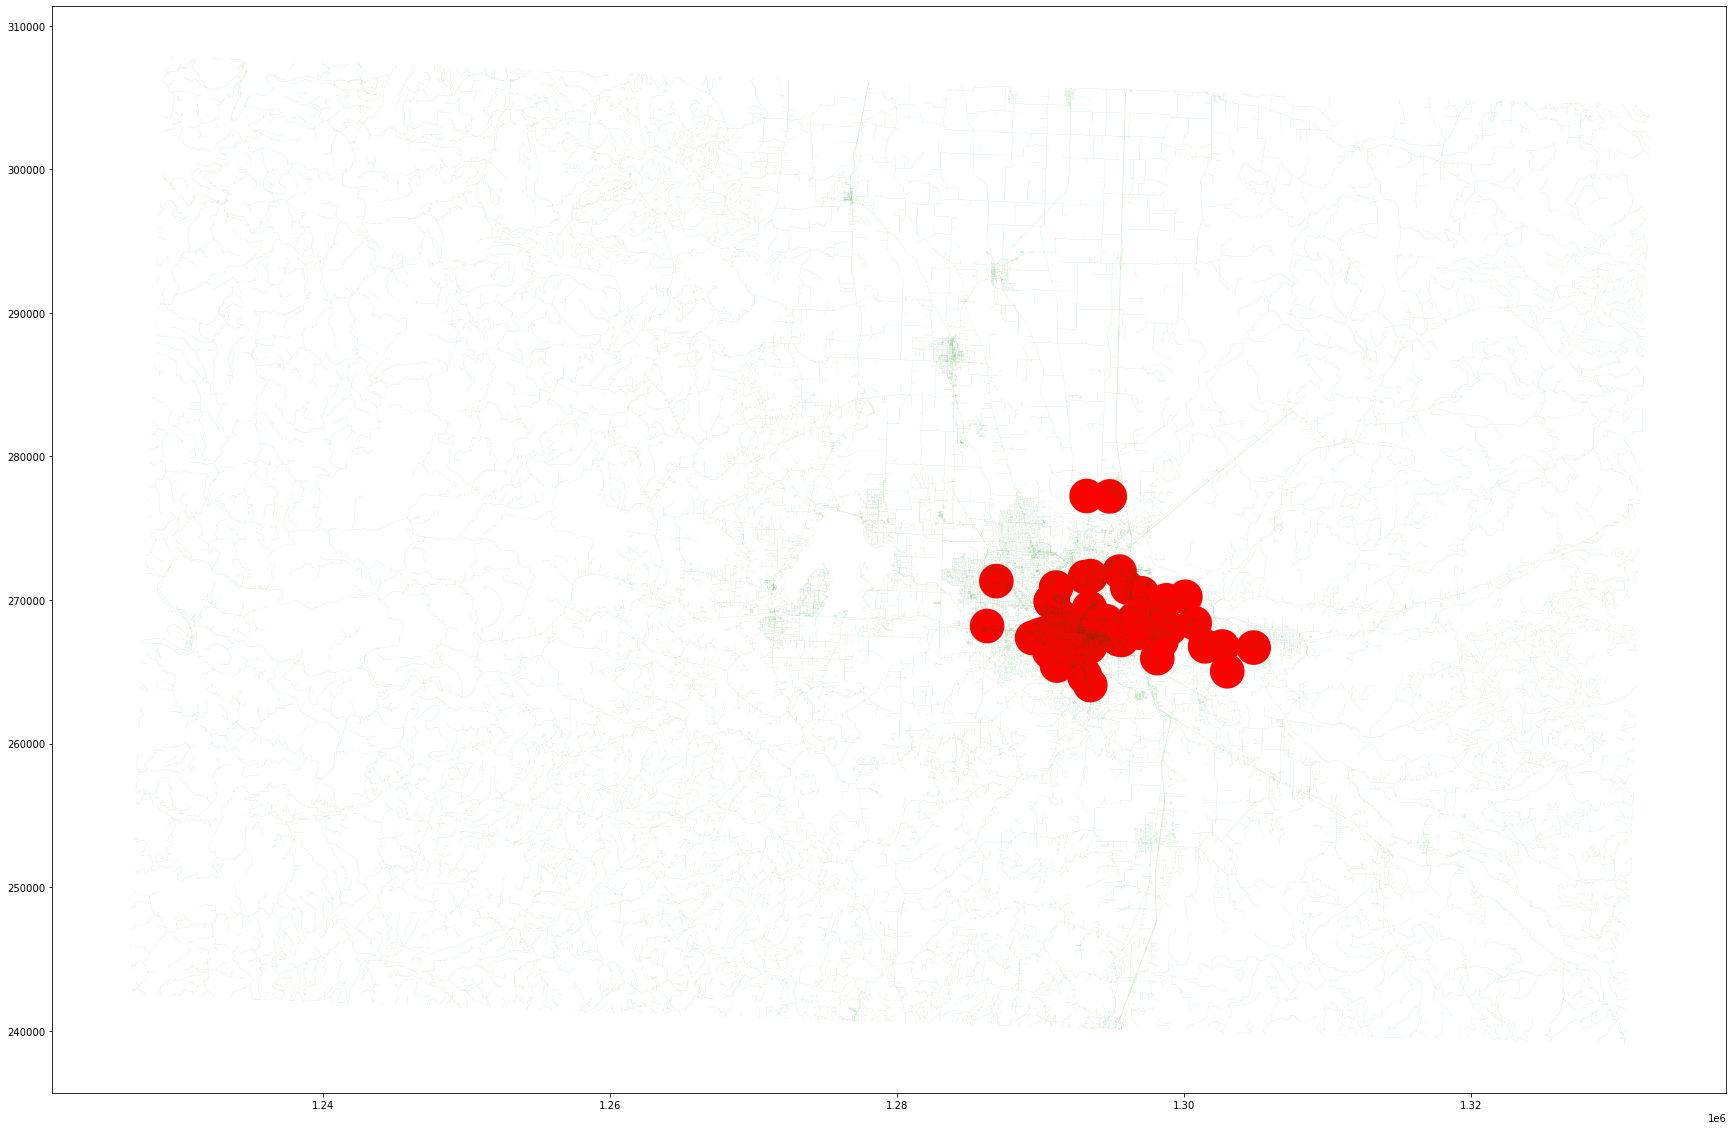

In [185]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [186]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id               name   ref         type  oneway  bridge  maxspeed  \
931  5453137  Elderberry Street  None  residential       0       0       NaN   
933  5453142     Lincoln Street  None  residential       0       0       NaN   
934  5453144   West 13th Avenue  None  residential       1       0       NaN   
935  5453146     Lincoln Street  None  residential       0       0       NaN   
943  5453175     Knob Hill Lane  None  residential       0       0       NaN   

                                              geometry  
931  LINESTRING (1302876.067 266657.889, 1302891.67...  
933  LINESTRING (1292056.753 269132.341, 1292046.51...  
934  LINESTRING (1291892.872 267486.642, 1291890.57...  
935  LINESTRING (1291790.034 265050.376, 1291788.09...  
943  LINESTRING (1292274.841 264419.479, 1292267.24...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


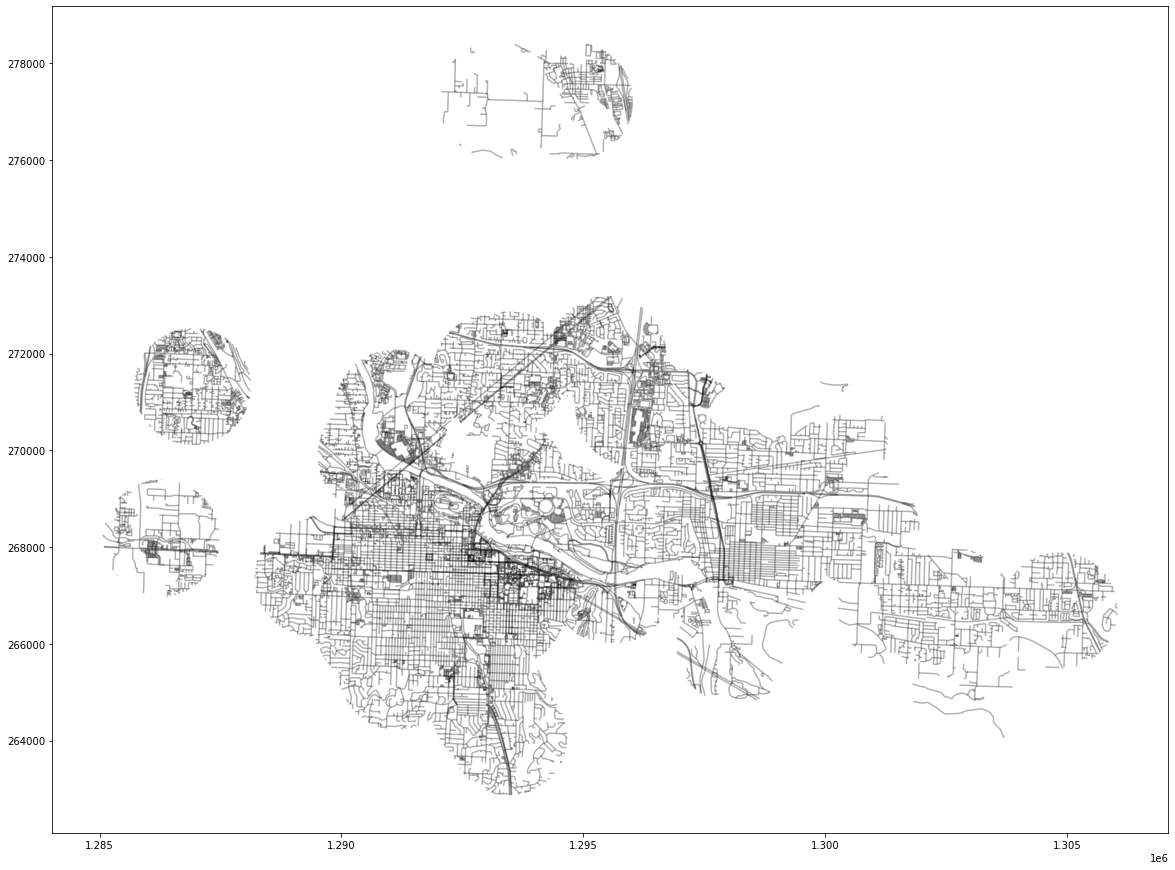

In [187]:
ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect

In [188]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             2.0   93.186492   1.438356   1.191781    787.0  ...   
2             1.0   83.037733   4.890411   1.479452    778.0  ...   
3             2.0   53.858767   0.684932   0.164384    438.0  ...   
4             1.0  177.231087   2.150685   0.767123    519.0  ...   

              comment  osm_id_sensor   osm_id             name   ref     type  \
0  corrected STL zone    123498508.0  5455769  West 11th Alley  None  service   
1                 NaN      5503096.0  5455769  West 11th Alley  None  service   
2                 NaN      5485965.0  5455769  West 11th Alley  None  service   
3                 NaN    116382793.0  5455769  West 11th Alley  None  service   
4                 NaN    216890849.0  5455769  West 11th Alley  None  service   

  oneway bridge  maxspeed                                           geometry  
0      0      0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
1      0      0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
2      0      0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
3      0      0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  
4      0      0       NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  

[5 rows x 22 columns]

# Calculate the length of the road segments

In [189]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             2.0   93.186492   1.438356   1.191781    787.0  ...   
2             1.0   83.037733   4.890411   1.479452    778.0  ...   
3             2.0   53.858767   0.684932   0.164384    438.0  ...   
4             1.0  177.231087   2.150685   0.767123    519.0  ...   

   osm_id_sensor   osm_id             name   ref     type oneway bridge  \
0    123498508.0  5455769  West 11th Alley  None  service      0      0   
1      5503096.0  5455769  West 11th Alley  None  service      0      0   
2      5485965.0  5455769  West 11th Alley  None  service      0      0   
3    116382793.0  5455769  West 11th Alley  None  service      0      0   
4    216890849.0  5455769  West 11th Alley  None  service      0      0   

  maxspeed                                           geometry     Length  
0      NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
1      NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
2      NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
3      NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  
4      NaN  LINESTRING (1290393.744 267719.721, 1290474.44...  264.91096  

[5 rows x 23 columns]

# Aggregrate the road functional class

In [190]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type        
5453222.0      bus_guideway      2673.121050
               cycleway         10878.348017
               footway          10407.909318
               path               156.662603
               primary          15323.515647
                                   ...      
721761539.0    service         121855.190080
               steps               56.468193
               tertiary         29457.286780
               track              517.584619
               unclassified      1488.896452
Name: Length, Length: 1055, dtype: float64

# Calculate the primary road

In [191]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id       Primary
0  5453222.0  15627.305117
1  5480007.0   7469.253523
2  5482102.0  18069.236447
3  5483853.0  14696.417069
4  5485965.0  17300.622281

In [192]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Secondary
0  5453222.0  22399.021298
1  5480007.0   1789.986329
2  5482102.0   6705.682504
3  5483853.0  21892.598323
4  5485472.0  25773.127522

In [193]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Tertiary
0  5453222.0  38993.616094
1  5480007.0  23687.314273
2  5482102.0  31841.347940
3  5483853.0  38449.762951
4  5485472.0   8895.369443

In [194]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  5453222.0      98248.212368
1  5480007.0      95405.147840
2  5482102.0     120044.409826
3  5483853.0     108848.840470
4  5485472.0     154834.429671

In [195]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         Path
0  5453222.0   156.662603
1  5482102.0  3428.777656
2  5483853.0   156.662603
3  5489866.0   156.662603
4  5489898.0  2315.476833

In [196]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Cycleway
0  5453222.0  10878.348017
1  5480007.0   6047.806644
2  5482102.0  32138.569052
3  5483853.0  12185.721577
4  5485472.0   5400.930311

In [197]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id       Footway
0  5453222.0  10407.909318
1  5480007.0   2414.059980
2  5482102.0  33013.919549
3  5483853.0   8806.087293
4  5485472.0  25258.716273

# Calculcate the mean Speed

In [198]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1736.000000
mean       27.148618
std        11.161266
min         5.000000
25%        20.000000
50%        20.000000
75%        35.000000
max        65.000000
Name: maxspeed, dtype: float64

In [199]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                            site_name sensor_type  year  region  \
86  P001EUG     Fern Ridge Path west of Chambers   permanent  2019  Eugene   
87  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   
88  S003EUG         12th Ave East of Chambers St  short-term  2019  Eugene   
89  S007EUG       13th Ave East of Willamette St  short-term  2019  Eugene   
90  S009EUG            13th Ave West of Hayes St  short-term  2019  Eugene   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
86             2.0  513.408379  12.575342   3.780822    985.0  ...   
87             2.0  180.006727   0.986301   0.547945    743.0  ...   
88             2.0   93.186492   1.438356   1.191781    787.0  ...   
89             1.0  118.872034   3.698630   1.561644   1564.0  ...   
90             1.0   83.037733   4.890411   1.479452    778.0  ...   

    osm_id_sensor   osm_id              name   ref       type oneway bridge  \
86    123498508.0  5485965  West 13th Avenue  None  secondary      1      0   
87    129170725.0  5485965  West 13th Avenue  None  secondary      1      0   
88      5503096.0  5485965  West 13th Avenue  None  secondary      1      0   
89    498988307.0  5485965  West 13th Avenue  None  secondary      1      0   
90      5485965.0  5485965  West 13th Avenue  None  secondary      1      0   

   maxspeed                                           geometry       Length  
86     30.0  LINESTRING (1289798.616 267554.835, 1289860.04...  4757.198563  
87     30.0  LINESTRING (1291077.257 267512.802, 1291139.26...  1399.066365  
88     30.0  LINESTRING (1289798.616 267554.835, 1289860.04...  5501.365730  
89     30.0  LINESTRING (1291084.656 267512.540, 1291139.26...  1374.778306  
90     30.0  LINESTRING (1289798.616 267554.835, 1289860.04...  4300.899643  

[5 rows x 23 columns]

In [200]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                         site_name sensor_type  year  region  \
0    739  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1    740  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2    741  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3    742  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4    743  S090EUG           Monroe South of 1st Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             2.0  513.408379  12.575342   3.780822  ...    123498508.0   
1             2.0   93.186492   1.438356   1.191781  ...      5503096.0   
2             1.0   83.037733   4.890411   1.479452  ...      5485965.0   
3             2.0   53.858767   0.684932   0.164384  ...    116382793.0   
4             2.0   97.896699   1.534247   0.684932  ...      5482102.0   

      osm_id             name           ref     type  oneway bridge maxspeed  \
0  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
1  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
2  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
3  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
4  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   

                                            geometry       Length  
0  LINESTRING (1290296.498 268397.549, 1290217.88...  1135.221181  
1  LINESTRING (1291256.968 268368.812, 1291232.97...  4592.893220  
2  LINESTRING (1290779.372 268382.274, 1290762.84...  3025.240287  
3  LINESTRING (1290017.231 268407.302, 1289976.58...   523.380343  
4  LINESTRING (1291347.056 268365.973, 1291333.91...  3634.275601  

[5 rows x 24 columns]

In [201]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                         site_name sensor_type  year  region  \
0    739  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1    740  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2    741  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3    742  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
4    743  S090EUG           Monroe South of 1st Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             2.0  513.408379  12.575342   3.780822  ...    123498508.0   
1             2.0   93.186492   1.438356   1.191781  ...      5503096.0   
2             1.0   83.037733   4.890411   1.479452  ...      5485965.0   
3             2.0   53.858767   0.684932   0.164384  ...    116382793.0   
4             2.0   97.896699   1.534247   0.684932  ...      5482102.0   

      osm_id             name           ref     type  oneway bridge maxspeed  \
0  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
1  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
2  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
3  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   
4  122615773  West 6th Avenue  OR 99:OR 126  primary       1      0     30.0   

                                            geometry       Length  
0  LINESTRING (1290296.498 268397.549, 1290217.88...  1135.221181  
1  LINESTRING (1291256.968 268368.812, 1291232.97...  4592.893220  
2  LINESTRING (1290779.372 268382.274, 1290762.84...  3025.240287  
3  LINESTRING (1290017.231 268407.302, 1289976.58...   523.380343  
4  LINESTRING (1291347.056 268365.973, 1291333.91...  3634.275601  

[5 rows x 24 columns]

In [202]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].apply(pd.Series.mode).reset_index() # revised
output_meanspeed=output_meanspeed.drop(['level_1'],axis=1)
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  5453222.0      35.0
1  5480007.0      25.0
2  5482102.0      20.0
3  5483853.0      35.0
4  5485472.0      15.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [203]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
ecoshort.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)          628.532553          6934.212066   
1  POINT (1298418.325 267111.279)          879.755548         20933.140361   
2  POINT (1295432.562 267262.083)         5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)         2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)         1869.438425          4950.178177   

   min_dist_to_university lanes  
0            10591.197533     2  
1            13217.559590     2  
2             4992.440022     2  
3            10941.097886     2  
4             1647.205849     1

In [205]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [206]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2839
epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id              name     ref     type  oneway  bridge  \
0    660  5246969  South 5th Street  OR 99W  primary       0       0   
1    710  5248108  North 5th Street  OR 99W  primary       0       0   
2    715  5248191  State Highway 99  OR 99W  primary       0       0   
3    716  5248213  State Highway 99  OR 99W  primary       0       0   
4   4047  5473237              None   OR 99  primary       1       0   

   maxspeed                                           geometry  
0       NaN  LINESTRING (1276870.077 297823.580, 1276867.42...  
1       NaN  LINESTRING (1276853.978 298027.486, 1276853.21...  
2       NaN  LINESTRING (1276731.055 298949.591, 1276730.46...  
3       NaN  LINESTRING (1280622.418 294321.267, 1280607.96...  
4       NaN  LINESTRING (1295261.879 267224.737, 1295302.25...

# In the below pline distance, you can see counter is located little far away from the link

In [208]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [210]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [211]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [212]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)          628.532553          6934.212066   
1  POINT (1298418.325 267111.279)          879.755548         20933.140361   
2  POINT (1295432.562 267262.083)         5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)         2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)         1869.438425          4950.178177   

   min_dist_to_university lanes  maxspeed  
0            10591.197533     2      30.0  
1            13217.559590     2      30.0  
2             4992.440022     2      35.0  
3            10941.097886     2      25.0  
4             1647.205849     1      20.0

In [213]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                          site_name sensor_type  year  region  \
0  S007EUG     13th Ave East of Willamette St  short-term  2019  Eugene   
1  S009EUG          13th Ave West of Hayes St  short-term  2019  Eugene   
2  S077EUG          High St North of 13th Ave  short-term  2019  Eugene   
3  S078EUG          High St North of Broadway  short-term  2019  Eugene   
4  S119EUG  S Willamette North of Vintage Way  short-term  2019  Eugene   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  maxspeed_x  \
0             1.0  118.872034  3.698630   1.561644   1564.0  ...        20.0   
1             1.0   83.037733  4.890411   1.479452    778.0  ...        30.0   
2             1.0  220.042229  6.657534   2.863014   1579.0  ...        25.0   
3             2.0  303.997425  6.958904   3.342466   2465.0  ...        20.0   
4             2.0   46.839795  3.493151   1.054795     63.0  ...        25.0   

   index     osm_id                     name   ref       type  oneway  bridge  \
0  21336  498988307         East 13th Avenue  None  secondary       1       0   
1   6688    5485965         West 13th Avenue  None  secondary       1       0   
2  21329  498988300              High Street  None  secondary       1       0   
3  21326  498988297              High Street  None  secondary       1       0   
4   6795    5486345  South Willamette Street  None  secondary       0       0   

  maxspeed_y                                         geometry_y  
0       20.0  LINESTRING (1292235.576 267476.954, 1292245.42...  
1       30.0  LINESTRING (1289798.616 267554.835, 1289860.04...  
2       25.0  LINESTRING (1292603.470 267526.035, 1292605.77...  
3       20.0  LINESTRING (1292618.318 267953.682, 1292618.95...  
4       25.0  LINESTRING (1294832.172 277195.473, 1294782.44...  

[5 rows x 29 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

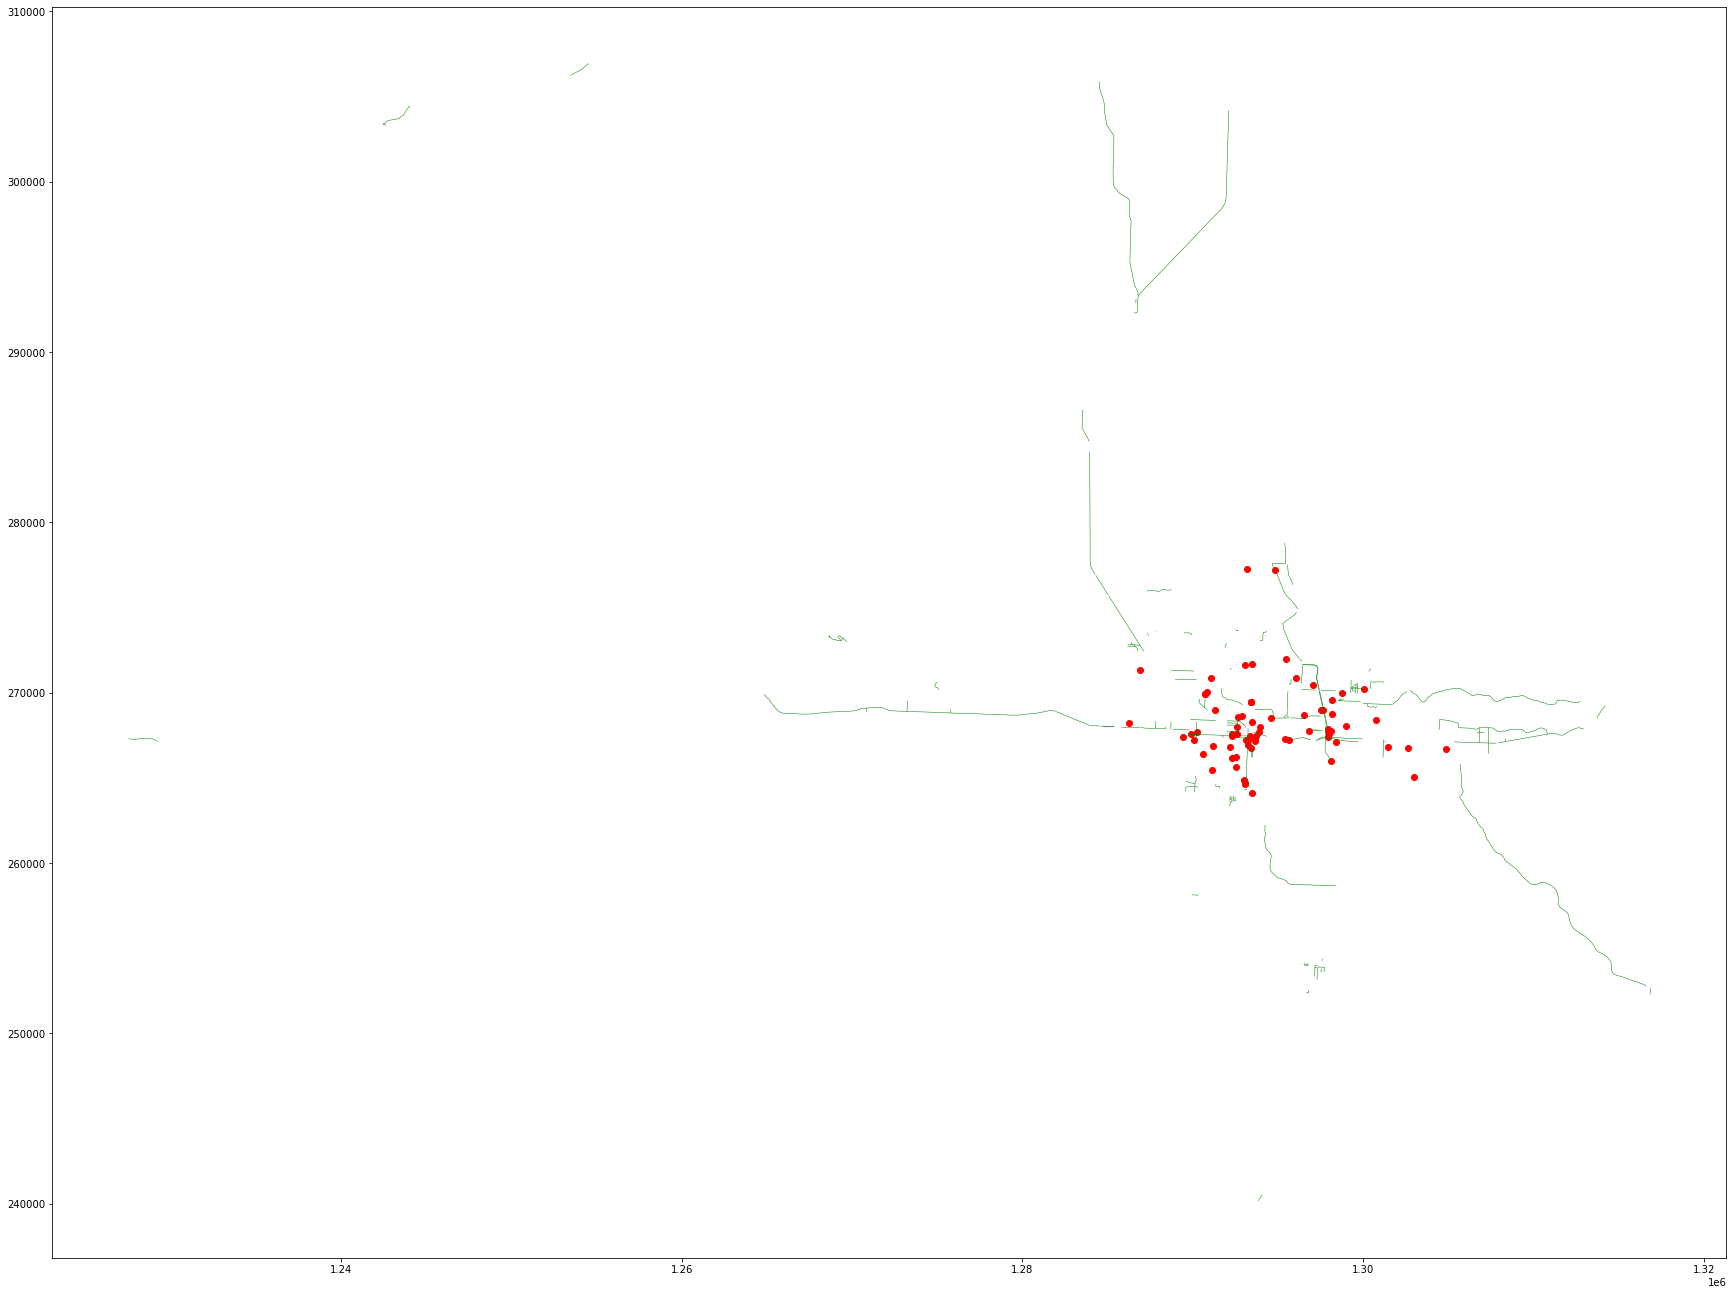

In [214]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [215]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0      5453222.0      35.0
1      5480007.0      35.0
2      5482102.0      30.0
3      5483853.0      35.0
4      5485472.0      15.0

In [216]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0  5453222.0         35.0
1  5480007.0         35.0
2  5482102.0         30.0
3  5483853.0         35.0
4  5485472.0         15.0

In [217]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'geometry_x',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'lanes', 'maxspeed_x', 'index', 'osm_id', 'name', 'ref', 'type',
       'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [218]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0    5485965.0      30.0
1    5486345.0      25.0
2  435896157.0      20.0
3  498988297.0      20.0
4  498988300.0      25.0
5  498988307.0      20.0

# Calculate the road type of the closest link of count station

In [219]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id              name     ref     type  oneway  bridge  \
0    660  5246969  South 5th Street  OR 99W  primary       0       0   
1    710  5248108  North 5th Street  OR 99W  primary       0       0   
2    715  5248191  State Highway 99  OR 99W  primary       0       0   
3    716  5248213  State Highway 99  OR 99W  primary       0       0   
4   4047  5473237              None   OR 99  primary       1       0   

   maxspeed                                           geometry  
0       NaN  LINESTRING (1276870.077 297823.580, 1276867.42...  
1       NaN  LINESTRING (1276853.978 298027.486, 1276853.21...  
2       NaN  LINESTRING (1276731.055 298949.591, 1276730.46...  
3       NaN  LINESTRING (1280622.418 294321.267, 1280607.96...  
4       NaN  LINESTRING (1295261.879 267224.737, 1295302.25...

In [221]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt.head()

In [223]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                     name              ref       type  \
0  20380  435896157              Main Street  OR 126 Business    primary   
1   6688    5485965         West 13th Avenue             None  secondary   
2   6795    5486345  South Willamette Street             None  secondary   
3   8984    5497693        East Amazon Drive             None  secondary   
4  11993   88379128        Willamette Street             None  secondary   

   oneway  bridge  maxspeed_x  \
0       1       0        20.0   
1       1       0        30.0   
2       0       0        25.0   
3       0       0         NaN   
4       1       0         NaN   

                                          geometry_x  site_id  ...   latitude  \
0  LINESTRING (1298102.033 267372.245, 1298091.55...  S123EUG  ...  44.046188   
1  LINESTRING (1289798.616 267554.835, 1289860.04...  S009EUG  ...  44.045543   
2  LINESTRING (1294832.172 277195.473, 1294782.44...  S119EUG  ...  44.133869   
3  LINESTRING (1293047.061 264726.021, 1293061.96...  S058EUG  ...  44.020539   
4  LINESTRING (1292216.118 266869.648, 1292215.91...  S120EUG  ...  44.039198   

    longitude          comment osm_id_sensor                      geometry_y  \
0 -123.021607              NaN   435896157.0  POINT (1297936.602 267378.037)   
1 -123.121854              NaN     5485965.0  POINT (1289903.829 267553.128)   
2 -123.064234              NaN     5486345.0  POINT (1294820.079 277219.961)   
3 -123.080929  288800 & 840559     5497693.0  POINT (1293096.628 264674.256)   
4 -123.092749              NaN    88379128.0  POINT (1292213.494 266775.829)   

   min_dist_to_school  min_dist_to_college  min_dist_to_university  lanes  \
0          280.009633         19270.754428            13010.153579      2   
1         1038.577547          7233.543970            11049.855820      2   
2         3900.283441         31931.929155            31224.693152      2   
3         1992.089286         11027.921143             7021.343679      2   
4         1730.159599          3645.712466             4631.894237      2   

   maxspeed_y  
0        20.0  
1        30.0  
2        25.0  
3        25.0  
4        20.0  

[5 rows x 29 columns]

In [224]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [226]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0  435896157.0    primary
1    5485965.0  secondary
2    5486345.0  secondary
3    5497693.0  secondary
4   88379128.0  secondary

# Convert this road catagory to binary as follows- 1 and 0


In [227]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0  435896157.0    primary               1                 0                0   
1    5485965.0  secondary               0                 1                0   
2    5486345.0  secondary               0                 1                0   
3    5497693.0  secondary               0                 1                0   
4   88379128.0  secondary               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [228]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0  435896157.0               1                 0                0   
1    5485965.0               0                 1                0   
2    5486345.0               0                 1                0   
3    5497693.0               0                 1                0   
4   88379128.0               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [229]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  5453222.0       1
1  5480007.0       1
2  5482102.0       1
3  5483853.0       1
4  5485472.0       1

# Calculate the bridge from spatial join of count location and bridge line shape file

In [230]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [231]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [232]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

   lanes  maxspeed_x     osm_id             name   ref      type  oneway  \
0      2        30.0  123498508  Fern Ridge Path  None  cycleway       0   
1      2        30.0  618082822             None  None  cycleway       0   
2      2        35.0  106993273  South Bank Path  None  cycleway       0   
3      2        25.0  107098076  North Bank Path  None  cycleway       0   
4      1        20.0  680124010             None  None  cycleway       0   

   bridge maxspeed_y                                         geometry_y  
0       0        NaN  LINESTRING (1290134.400 267192.162, 1290125.33...  
1       1        NaN  LINESTRING (1298420.339 267106.273, 1298450.60...  
2       0        NaN  LINESTRING (1295450.510 267256.157, 1295433.23...  
3       0        NaN  LINESTRING (1293075.767 268725.078, 1293074.88...  
4       0        NaN  LINESTRING (1293255.749 267894.098, 1293254.54...  

[5 rows x 28 columns]

In [233]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0      5453222.0       0
1      5480007.0       0
2      5482102.0       0
3      5483853.0       0
4      5485472.0       0

In [235]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  5453222.0             2
1  5480007.0             2
2  5482102.0             2
3  5483853.0             2
4  5485472.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [236]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [237]:
nature_proj1.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [238]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name  type  \
6    78897841                     None  park   
8   107946543              Island Park  park   
9   108064134              Island Park  park   
10  108064141  Eastgate Woodlands Park  park   
11  108064148   West D Street Greenway  park   

                                             geometry  
6   POLYGON ((1292320.377 268077.258, 1292367.887 ...  
8   POLYGON ((1297164.737 267615.756, 1297168.319 ...  
9   POLYGON ((1297185.944 267733.517, 1297220.794 ...  
10  POLYGON ((1295721.614 267951.578, 1295833.568 ...  
11  POLYGON ((1296711.576 267680.720, 1296671.942 ...

In [239]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  \
0  44.042515 -123.119532  corrected STL zone    123498508.0   
1  44.043919 -123.015499                 NaN    618082822.0   
2  44.044462 -123.052792                 NaN    106993273.0   
3  44.068013 -123.110896                 NaN    107098076.0   
4  44.040527 -123.080176                 NaN    680124010.0   

                         geometry  min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)          628.532553          6934.212066   
1  POINT (1298418.325 267111.279)          879.755548         20933.140361   
2  POINT (1295432.562 267262.083)         5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)         2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)         1869.438425          4950.178177   

   min_dist_to_university lanes  maxspeed  
0            10591.197533     2      30.0  
1            13217.559590     2      30.0  
2             4992.440022     2      35.0  
3            10941.097886     2      25.0  
4             1647.205849     1      20.0

In [240]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    longitude             comment osm_id_sensor  \
0 -123.119532  corrected STL zone   123498508.0   
1 -123.015499                 NaN   618082822.0   
2 -123.052792                 NaN   106993273.0   
3 -123.110896                 NaN   107098076.0   
4 -123.080176                 NaN   680124010.0   

                         geometry min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)         628.532553          6934.212066   
1  POINT (1298418.325 267111.279)         879.755548         20933.140361   
2  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0            10591.197533      2     30.0             0.000000  
1            13217.559590      2     30.0          1406.216478  
2             4992.440022      2     35.0           780.800356  
3            10941.097886      2     25.0           510.704227  
4             1647.205849      1     20.0          1335.048959  

[5 rows x 21 columns]

In [241]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0  123498508.0          0.000000
1  618082822.0       1406.216478
2  106993273.0        780.800356
3  107098076.0        510.704227
4  680124010.0       1335.048959

# cc distance to park

In [242]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0  123498508.0               459.352965
1  618082822.0              1519.983109
2  106993273.0              1389.649605
3  107098076.0               877.183977
4  680124010.0              1370.923896

# Distance to water body

In [243]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
2    25126014  None  water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
12  120065484  None  water  POLYGON ((1298200.019 264275.903, 1298197.825 ...
13  120065485  None  water  POLYGON ((1298279.427 264168.878, 1298288.251 ...
14  120065486  None  water  POLYGON ((1298110.143 264206.560, 1298108.866 ...
15  120065487  None  water  POLYGON ((1298172.753 264084.610, 1298171.493 ...

In [244]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    longitude             comment osm_id_sensor  \
0 -123.119532  corrected STL zone   123498508.0   
1 -123.015499                 NaN   618082822.0   
2 -123.052792                 NaN   106993273.0   
3 -123.110896                 NaN   107098076.0   
4 -123.080176                 NaN   680124010.0   

                         geometry min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)         628.532553          6934.212066   
1  POINT (1298418.325 267111.279)         879.755548         20933.140361   
2  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0            10591.197533      2     30.0          6716.512489  
1            13217.559590      2     30.0          4735.277606  
2             4992.440022      2     35.0          1742.310705  
3            10941.097886      2     25.0           907.649062  
4             1647.205849      1     20.0          2082.524492  

[5 rows x 21 columns]

In [245]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0  123498508.0             6716.512489
1  618082822.0             4735.277606
2  106993273.0             1742.310705
3  107098076.0              907.649062
4  680124010.0             2082.524492

In [246]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0  123498508.0               6894.072468
1  618082822.0               4804.882122
2  106993273.0               2096.013449
3  107098076.0               1342.134085
4  680124010.0               2094.341631

# Distance To  Forest

In [247]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...
5  76923960  None  forest  POLYGON ((1294839.316 267598.002, 1294834.369 ...

In [248]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    longitude             comment osm_id_sensor  \
0 -123.119532  corrected STL zone   123498508.0   
1 -123.015499                 NaN   618082822.0   
2 -123.052792                 NaN   106993273.0   
3 -123.110896                 NaN   107098076.0   
4 -123.080176                 NaN   680124010.0   

                         geometry min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)         628.532553          6934.212066   
1  POINT (1298418.325 267111.279)         879.755548         20933.140361   
2  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0            10591.197533      2     30.0          6250.637033  
1            13217.559590      2     30.0           752.327322  
2             4992.440022      2     35.0           128.963820  
3            10941.097886      2     25.0            30.240957  
4             1647.205849      1     20.0           778.936936  

[5 rows x 21 columns]

In [249]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0  123498508.0         6250.637033
1  618082822.0          752.327322
2  106993273.0          128.963820
3  107098076.0           30.240957
4  680124010.0          778.936936

In [250]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0  123498508.0                6265.918144
1  618082822.0                2190.701487
2  106993273.0                 465.887980
3  107098076.0                 386.242996
4  680124010.0                 931.496598

# Distance to green space area

In [251]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name   type  \
1  123503986  Amazon Dog Park  grass   
5  124093753             None  grass   
6  124095387             None  grass   
7  124095400             None  grass   
8  124095406             None  grass   

                                            geometry  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
5  POLYGON ((1292549.237 266063.061, 1292553.660 ...  
6  POLYGON ((1292924.281 265319.511, 1292904.204 ...  
7  POLYGON ((1292707.938 265693.074, 1292728.752 ...  
8  POLYGON ((1292538.248 266117.761, 1292542.178 ...

In [252]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    longitude             comment osm_id_sensor  \
0 -123.119532  corrected STL zone   123498508.0   
1 -123.015499                 NaN   618082822.0   
2 -123.052792                 NaN   106993273.0   
3 -123.110896                 NaN   107098076.0   
4 -123.080176                 NaN   680124010.0   

                         geometry min_dist_to_school  min_dist_to_college  \
0  POINT (1290079.275 267211.026)         628.532553          6934.212066   
1  POINT (1298418.325 267111.279)         879.755548         20933.140361   
2  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
3  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
4  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

   min_dist_to_university  lanes maxspeed  min_dist_to_polygon  
0            10591.197533      2     30.0          1063.828801  
1            13217.559590      2     30.0          6220.911822  
2             4992.440022      2     35.0             8.608663  
3            10941.097886      2     25.0           936.507357  
4             1647.205849      1     20.0           311.131547  

[5 rows x 21 columns]

In [253]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0  123498508.0        1063.828801
1  618082822.0        6220.911822
2  106993273.0           8.608663
3  107098076.0         936.507357
4  680124010.0         311.131547

In [254]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0  123498508.0               1322.708281
1  618082822.0               7032.474855
2  106993273.0                 52.670326
3  107098076.0               1038.825343
4  680124010.0                370.708477

# Distance to commercial

In [255]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0  123498508.0                   112.556184
1  618082822.0                   750.414339
2  106993273.0                  7392.346040
3  107098076.0                  4945.052733
4  680124010.0                  2961.861733

In [256]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0  123498508.0                          802.073039
1  618082822.0                         1728.490761
2  106993273.0                         8345.940808
3  107098076.0                         5962.516026
4  680124010.0                         3317.560302

# Distance to industrial area

In [257]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0  123498508.0                  4075.752054
1  618082822.0                   305.450097
2  106993273.0                  1096.375792
3  107098076.0                  3097.869105
4  680124010.0                  3158.218650

In [258]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0  123498508.0                    4606.806686
1  618082822.0                     645.502681
2  106993273.0                    1839.052895
3  107098076.0                    3401.788866
4  680124010.0                    3272.153319

# Distance to Retail area

In [259]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0  123498508.0              7092.008079
1  618082822.0             16644.069561
2  106993273.0              6836.506119
3  107098076.0                 9.008042
4  680124010.0              1611.412047

In [260]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0  123498508.0                7277.242078
1  618082822.0               16691.760161
2  106993273.0                6897.438227
3  107098076.0                1086.242108
4  680124010.0                1714.775136

# Distance to Residential

In [261]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0  123498508.0                    567.701586
1  618082822.0                   1165.836590
2  106993273.0                   1534.136161
3  107098076.0                   3066.642120
4  680124010.0                    222.901889

In [262]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0  123498508.0                     1071.746883
1  618082822.0                     2107.377509
2  106993273.0                     2848.313741
3  107098076.0                     3262.795673
4  680124010.0                      406.212518

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [263]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                               name        type  \
0   37434396                Valley River Center      retail   
1   78898473                     McArthur Court  university   
2   85690675     Springfield Kiwanis Youth Camp        None   
3   88782630  Eugene Airport-Mahlon Sweet Field        None   
4  122079725                           7-Eleven        None   

                                            geometry  
0  POLYGON ((-123.10737 44.06890, -123.10743 44.0...  
1  POLYGON ((-123.07442 44.04196, -123.07392 44.0...  
2  POLYGON ((-122.72511 43.94888, -122.72528 43.9...  
3  POLYGON ((-123.21426 44.11983, -123.21404 44.1...  
4  POLYGON ((-123.11741 44.03996, -123.11741 44.0...

In [264]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2839)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Lane County Public Service Building')]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                                 name    type  \
1945  281908109  Lane County Public Service Building  office   

                                               geometry  
1945  POLYGON ((1292479.343 268192.311, 1292479.387 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

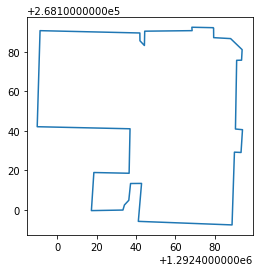

In [265]:
bld_proj1.geometry.boundary.plot()

In [266]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                                 name    type  \
1945  281908109  Lane County Public Service Building  office   

                            geometry  
1945  POINT (1292447.864 268147.986)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

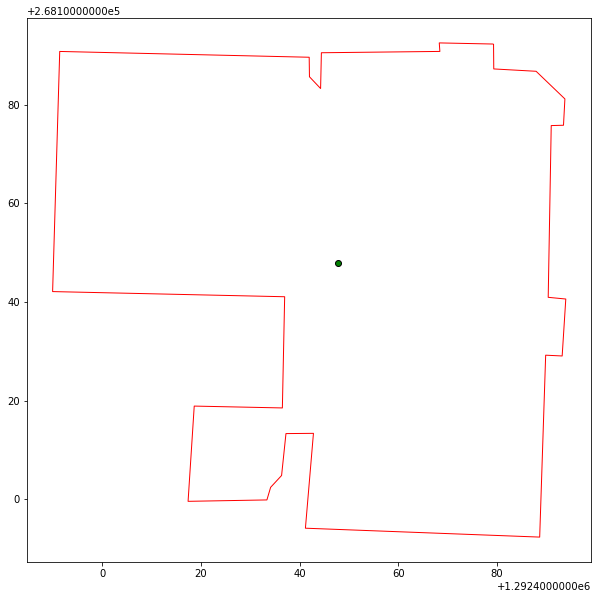

In [267]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [268]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

              comment  osm_id_sensor                        geometry  \
0  corrected STL zone    123498508.0  POINT (1290079.275 267211.026)   
1                 NaN    618082822.0  POINT (1298418.325 267111.279)   
2                 NaN    106993273.0  POINT (1295432.562 267262.083)   
3                 NaN    107098076.0  POINT (1290859.454 270021.192)   
4                 NaN    680124010.0  POINT (1293225.340 266892.292)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0          628.532553         6934.212066            10591.197533      2   
1          879.755548        20933.140361            13217.559590      2   
2         5010.229468        11170.247924             4992.440022      2   
3         2793.158332         8094.508350            10941.097886      2   
4         1869.438425         4950.178177             1647.205849      1   

   maxspeed min_dist_to_polygon  min_dist_to_CBD  
0      30.0         1071.746883      8356.878045  
1      30.0         2107.377509     19881.232680  
2      35.0         2848.313741     10214.560298  
3      25.0         3262.795673      8057.748919  
4      20.0          406.212518      4845.477002  

[5 rows x 22 columns]

In [269]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0  123498508.0      8356.878045
1  618082822.0     19881.232680
2  106993273.0     10214.560298
3  107098076.0      8057.748919
4  680124010.0      4845.477002

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [270]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [271]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2627, 16)

In [272]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [273]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [274]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2839')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...

In [275]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  Total block Area  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...      2.220647e+09  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...      1.928498e+08  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      4.733330e+08  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1.469862e+07  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1.010078e+06

In [276]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Baker County        1      NaN     NaN  ...       167       149        38   
1  Baker County        1      NaN     NaN  ...       163       162        12   
2  Baker County        1      NaN     NaN  ...       159       159        29   
3  Baker County        1      NaN     NaN  ...       222       215        12   
4  Baker County        1      NaN     NaN  ...       237       188        36   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        11        10         8        12         7        12         7  
1        14         2         8         3         7         2         7  
2        13        12        12        53        16         7        14  
3        42        12        12        12        12        12        12  
4        12        57        12       150         7        12         7  

[5 rows x 58 columns]

In [277]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHY2M001 AHY2M002 AHY2M003  \
0        S  2.205986e+09  13837275.0  ...      167      149       38   
1        S  1.926901e+08     12317.0  ...      163      162       12   
2        S  4.723892e+08    639439.0  ...      159      159       29   
3        S  1.469016e+07         0.0  ...      222      215       12   
4        S  1.009492e+06         0.0  ...      237      188       36   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        11        10        8        12        7        12         7  
1        14         2        8         3        7         2         7  
2        13        12       12        53       16         7        14  
3        42        12       12        12       12        12        12  
4        12        57       12       150        7        12         7  

[5 rows x 74 columns]

In [278]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
0  +44.5468040  -118.1781784  G41000109501001  323465.419044  2.219823e+09   
1  +44.9562277  -118.0519082  G41000109501002  109051.976354  1.927024e+08   
2  +44.8443756  -118.0396603  G41000109501003  140639.998011  4.730286e+08   
3  +44.7764594  -117.8821056  G41000109502001   22860.454690  1.469017e+07   
4  +44.7753666  -117.8349670  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...       950       903   
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...       908       884   
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      1128      1016   
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1097      1060   
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1103       912   

   AHY2E003  Total block Area  
0        25      2.220647e+09  
1         0      1.928498e+08  
2        23      4.733330e+08  
3         0      1.469862e+07  
4        25      1.010078e+06

In [279]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN    Shape_Leng    Shape_Area  \
947   +44.1233309  -122.9588039  G41003900002001  70566.782010  1.077522e+08   
951   +44.1806114  -123.0287177  G41003900003001  59417.757925  9.092059e+07   
952   +44.1379943  -123.0621160  G41003900003002  15295.075435  8.779097e+06   
993   +44.0251639  -123.2028166  G41003900010022  21090.220735  2.288478e+07   
1024  +44.0173720  -122.9840399  G41003900017001  27841.840475  2.648301e+07   

                                               geometry  AHY2E001  AHY2E002  \
947   POLYGON ((1300721.688 271167.442, 1300210.980 ...      1908      1889   
951   MULTIPOLYGON (((1295899.768 276912.506, 129589...       920       902   
952   POLYGON ((1294116.266 276254.807, 1294123.906 ...      1388      1250   
993   POLYGON ((1285887.873 267965.409, 1286084.249 ...      1042       834   
1024  MULTIPOLYGON (((1297713.090 265940.942, 129770...      1616      1296   

      AHY2E003  Total block Area  
947          2      1.077584e+08  
951          0      9.092862e+07  
952         18      8.779741e+06  
993         46      2.288499e+07  
1024         0      2.648296e+07

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


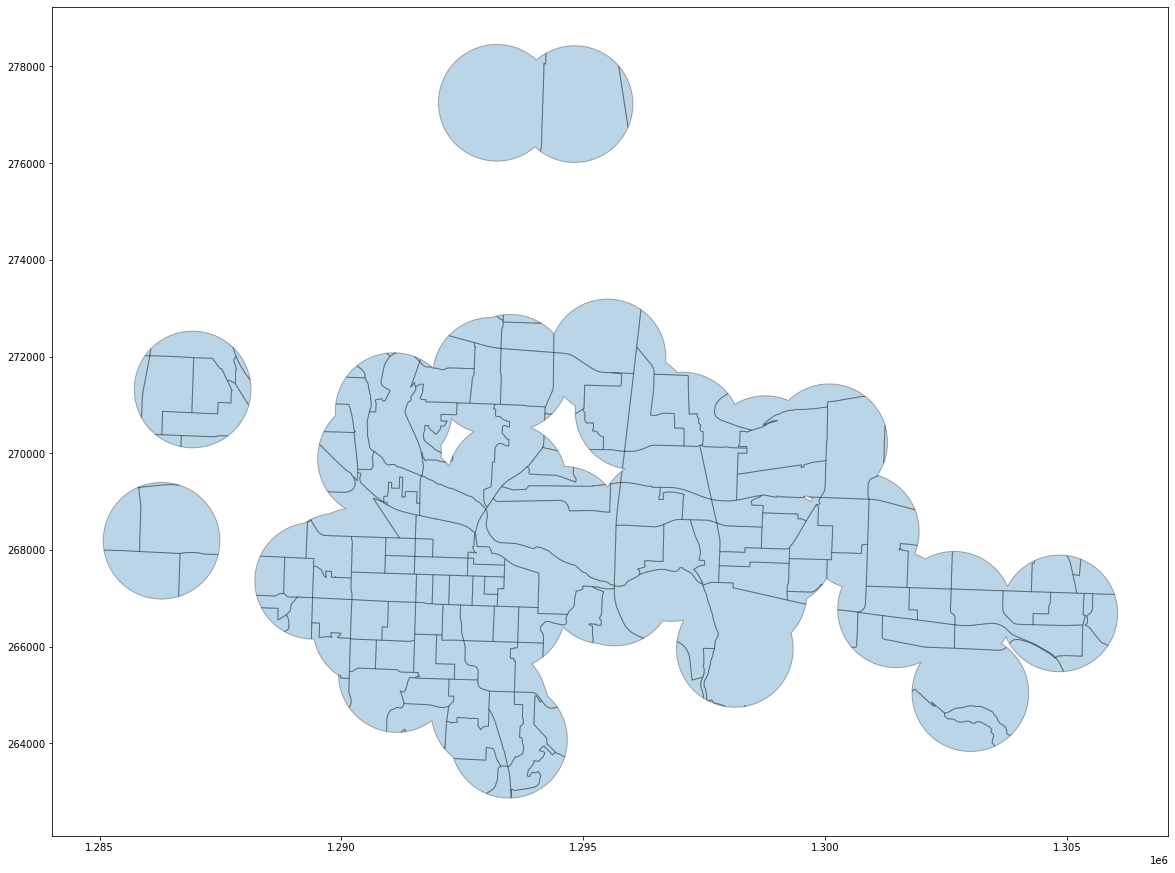

In [281]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [282]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

      INTPTLAT      INTPTLON          GISJOIN   Shape_Leng    Shape_Area  \
0  +44.0565121  -123.1197330  G41003900042002  6790.537771  1.548182e+06   
1  +44.0565121  -123.1197330  G41003900042002  6790.537771  1.548182e+06   
2  +44.0565121  -123.1197330  G41003900042002  6790.537771  1.548182e+06   
3  +44.0565121  -123.1197330  G41003900042002  6790.537771  1.548182e+06   
4  +44.0565121  -123.1197330  G41003900042002  6790.537771  1.548182e+06   

  AHY2E001 AHY2E002  AHY2E003  Total block Area  \
0     1130      967        33      1.548223e+06   
1     1130      967        33      1.548223e+06   
2     1130      967        33      1.548223e+06   
3     1130      967        33      1.548223e+06   
4     1130      967        33      1.548223e+06   

                                            geometry  
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 24 columns]

In [283]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

           GISJOIN   Shape_Leng    Shape_Area  AHY2E001 AHY2E002 AHY2E003  \
0  G41003900042002  6790.537771  1.548182e+06      1130      967       33   
1  G41003900042002  6790.537771  1.548182e+06      1130      967       33   
2  G41003900042002  6790.537771  1.548182e+06      1130      967       33   
3  G41003900042002  6790.537771  1.548182e+06      1130      967       33   
4  G41003900042002  6790.537771  1.548182e+06      1130      967       33   

  Total block Area                                           geometry  \
0     1.548223e+06  POLYGON ((1289617.373 268326.156, 1289728.899 ...   
1     1.548223e+06  POLYGON ((1290741.147 268819.996, 1290623.979 ...   
2     1.548223e+06  POLYGON ((1290836.526 268710.757, 1290718.219 ...   
3     1.548223e+06  POLYGON ((1289514.143 268595.556, 1289609.283 ...   
4     1.548223e+06  POLYGON ((1289553.453 268708.163, 1289668.354 ...   

   buffered area  area factor  
0   99133.267869     0.064030  
1  251859.586473     0.162677  
2  422320.536128     0.272778  
3  788700.094900     0.509423  
4  521701.875532     0.336968  

[5 rows x 26 columns]

In [284]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0    123498508.0      1130       967        33     0.064030
1    107098076.0      1130       967        33     0.162677
2    106993288.0      1130       967        33     0.272778
3      5503096.0      1130       967        33     0.509423
4      5485965.0      1130       967        33     0.336968

In [285]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002   AHY2E003
0    123498508.0   72.354318   61.917368   2.113002
1    107098076.0  183.824553  157.308268   5.368328
2    106993288.0  308.238749  263.775992   9.001663
3      5503096.0  575.647903  492.611966  16.810956
4      5485965.0  380.774127  325.848302  11.119952

# Aggregate by ID

In [286]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY2E001     AHY2E002    AHY2E003
0      5453222.0  7060.110054  6015.374048   54.365240
1      5480007.0  6088.295841  5469.294222    9.103324
2      5482102.0  7129.755862  6205.836267  171.709305
3      5483853.0  7320.682342  6308.449723   50.150359
4      5485472.0  7953.601327  6711.603210  134.199967

# Percentange of White and African American

In [287]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY2E001     AHY2E002    AHY2E003  pct_white  \
0      5453222.0  7060.110054  6015.374048   54.365240  85.202270   
1      5480007.0  6088.295841  5469.294222    9.103324  89.832925   
2      5482102.0  7129.755862  6205.836267  171.709305  87.041357   
3      5483853.0  7320.682342  6308.449723   50.150359  86.172974   
4      5485472.0  7953.601327  6711.603210  134.199967  84.384456   

   pct_African_American  
0              0.770034  
1              0.149522  
2              2.408348  
3              0.685050  
4              1.687286

In [288]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  5453222.0  85.202270              0.770034
1  5480007.0  89.832925              0.149522
2  5482102.0  87.041357              2.408348
3  5483853.0  86.172974              0.685050
4  5485472.0  84.384456              1.687286

# Percentage of Male and Female

In [289]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHYQM040  AHYQM041  AHYQM042  \
0  Baker County        1      NaN     NaN  ...        18        28        15   
1  Baker County        1      NaN     NaN  ...         9        25        15   
2  Baker County        1      NaN     NaN  ...        12        41        28   
3  Baker County        1      NaN     NaN  ...        27        40        26   
4  Baker County        1      NaN     NaN  ...        11        21        12   

   AHYQM043  AHYQM044  AHYQM045  AHYQM046  AHYQM047  AHYQM048  AHYQM049  
0        15        13        11        11        12        15        11  
1        18         9        42        28        25         3         8  
2        36        15        26        22        12        38        15  
3        35        31        24        23        29        12        12  
4        40        30        20        15        12        31        12  

[5 rows x 136 columns]

In [290]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
0        S  2.205986e+09  13837275.0  ...       18       28       15   
1        S  1.926901e+08     12317.0  ...        9       25       15   
2        S  4.723892e+08    639439.0  ...       12       41       28   
3        S  1.469016e+07         0.0  ...       27       40       26   
4        S  1.009492e+06         0.0  ...       11       21       12   

   AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
0        15        13       11        11       12        15        11  
1        18         9       42        28       25         3         8  
2        36        15       26        22       12        38        15  
3        35        31       24        23       29        12        12  
4        40        30       20        15       12        31        12  

[5 rows x 152 columns]

In [291]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
947         S  106470708.0  1281425.0  ...       38       56       43   
951         S   89480046.0  1440549.0  ...       23       20       25   
952         S    8650347.0   128755.0  ...       34       35       16   
993         S   22884776.0        0.0  ...       25       45       12   
1024        S   25617334.0   865680.0  ...       26       44       40   

      AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
947         28        30       39        33       16        18        36  
951         25        19       17        16       12        12        12  
952         18        15       15        27       14        14        12  
993         21        23       25        47       29        12        38  
1024        47        12       54        80       30        32        65  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


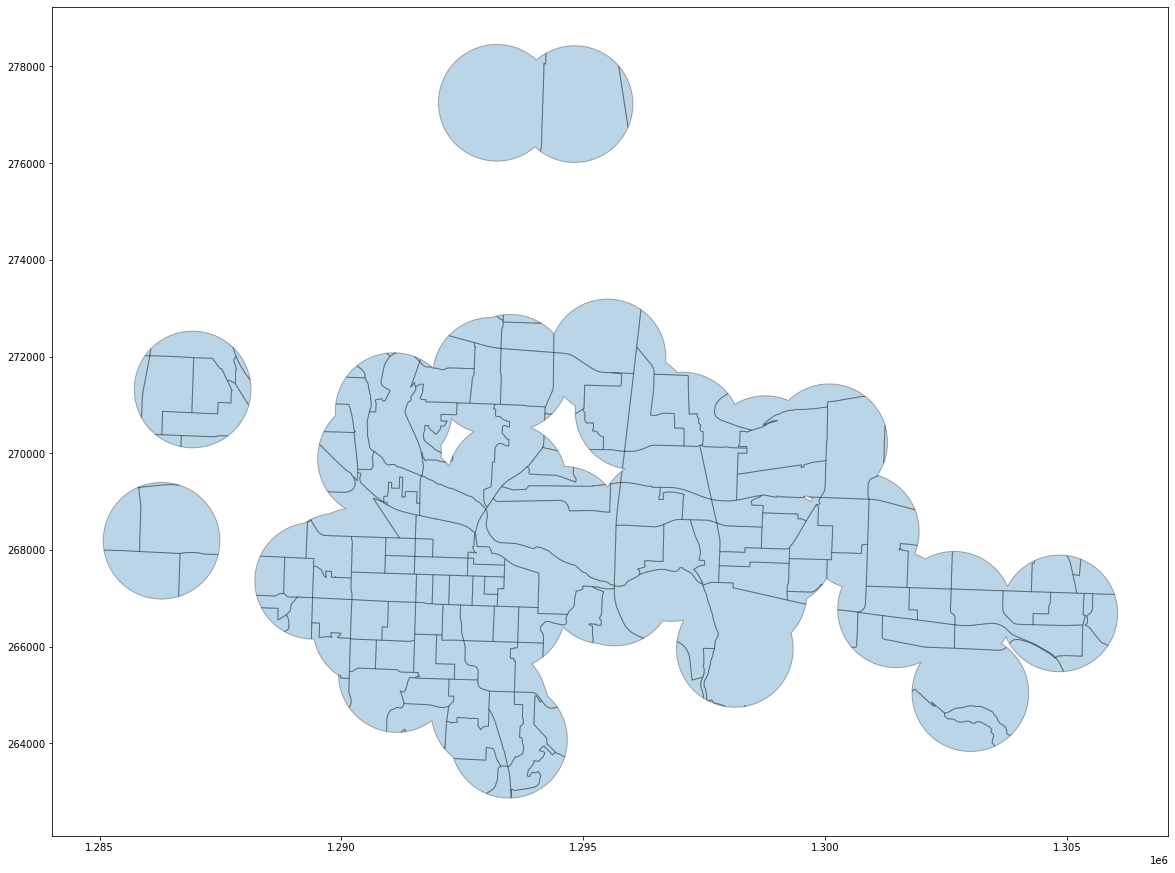

In [292]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [293]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AHYQM041  AHYQM042 AHYQM043  AHYQM044 AHYQM045 AHYQM046 AHYQM047 AHYQM048  \
0        39        62       13        13       12       13       13       12   
1        39        62       13        13       12       13       13       12   
2        39        62       13        13       12       13       13       12   
3        39        62       13        13       12       13       13       12   
4        39        62       13        13       12       13       13       12   

  AHYQM049                                           geometry  
0       12  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1       12  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2       12  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3       12  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4       12  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 166 columns]

In [294]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047 AHYQM048 AHYQM049  \
0        13        13       12        13       13       12       12   
1        13        13       12        13       13       12       12   
2        13        13       12        13       13       12       12   
3        13        13       12        13       13       12       12   
4        13        13       12        13       13       12       12   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 168 columns]

In [295]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AHYQE001', 'AHYQE002', 'AHYQE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHYQE001  AHYQE002  AHYQE026  area factor
0    123498508.0      1130       673       457     0.064030
1    107098076.0      1130       673       457     0.162677
2    106993288.0      1130       673       457     0.272778
3      5503096.0      1130       673       457     0.509423
4      5485965.0      1130       673       457     0.336968

In [296]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001    AHYQE002    AHYQE026
0    123498508.0   72.354318   43.092439   29.261879
1    107098076.0  183.824553  109.481349   74.343204
2    106993288.0  308.238749  183.579361  124.659388
3      5503096.0  575.647903  342.841627  232.806276
4      5485965.0  380.774127  226.779635  153.994492

In [297]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHYQE001     AHYQE002     AHYQE026
0      5453222.0  7060.110054  3259.497024  3800.613029
1      5480007.0  6088.295841  3103.766036  2984.529806
2      5482102.0  7129.755862  3813.711003  3316.044858
3      5483853.0  7320.682342  3416.391464  3904.290878
4      5485472.0  7953.601327  3741.577661  4212.023666

In [298]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AHYQE002']/output_pct_gender['AHYQE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AHYQE026']/output_pct_gender['AHYQE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHYQE001     AHYQE002     AHYQE026   pct_male  pct_female
0      5453222.0  7060.110054  3259.497024  3800.613029  46.167793   53.832207
1      5480007.0  6088.295841  3103.766036  2984.529806  50.979225   49.020775
2      5482102.0  7129.755862  3813.711003  3316.044858  53.490064   46.509936
3      5483853.0  7320.682342  3416.391464  3904.290878  46.667664   53.332336
4      5485472.0  7953.601327  3741.577661  4212.023666  47.042560   52.957440

In [299]:
output_pct_gender1=output_pct_gender.drop(['AHYQE001','AHYQE002','AHYQE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  5453222.0  46.167793   53.832207
1  5480007.0  50.979225   49.020775
2  5482102.0  53.490064   46.509936
3  5483853.0  46.667664   53.332336
4  5485472.0  47.042560   52.957440

# Number of Student (student access) and Education (pct of at least college education population)

In [300]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH04M016  AH04M017  AH04M018  \
0  Baker County        1      NaN     NaN  ...        21        57        17   
1  Baker County        1      NaN     NaN  ...        10        61        19   
2  Baker County        1      NaN     NaN  ...        23        45        41   
3  Baker County        1      NaN     NaN  ...        36        63        23   
4  Baker County        1      NaN     NaN  ...        12        98        34   

   AH04M019  AH04M020  AH04M021  AH04M022  AH04M023  AH04M024  AH04M025  
0        24        66        29        26        13        12         3  
1        35        53        38        23        41        11         2  
2        35        76        37        72        43        22        27  
3        58        30        92        90        36        30        22  
4        46        66        24        87        23        14        12  

[5 rows x 88 columns]

In [301]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
0        S  2.205986e+09  13837275.0  ...       21       57       17   
1        S  1.926901e+08     12317.0  ...       10       61       19   
2        S  4.723892e+08    639439.0  ...       23       45       41   
3        S  1.469016e+07         0.0  ...       36       63       23   
4        S  1.009492e+06         0.0  ...       12       98       34   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
0        24        66       29        26       13        12         3  
1        35        53       38        23       41        11         2  
2        35        76       37        72       43        22        27  
3        58        30       92        90       36        30        22  
4        46        66       24        87       23        14        12  

[5 rows x 104 columns]

In [302]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... AH04M016 AH04M017 AH04M018  \
947         S  106470708.0  1281425.0  ...       17      120       39   
951         S   89480046.0  1440549.0  ...       13       67       24   
952         S    8650347.0   128755.0  ...       37       83       32   
993         S   22884776.0        0.0  ...       19       67       30   
1024        S   25617334.0   865680.0  ...       27      156       50   

      AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
947         48        83       55        79       71        37        22  
951         39        54       39        48       12        42        12  
952         19        60       46        56       35        16        14  
993         29        53       63        64       44        30         7  
1024        64       122      113        48       66        26        38  

[5 rows x 104 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


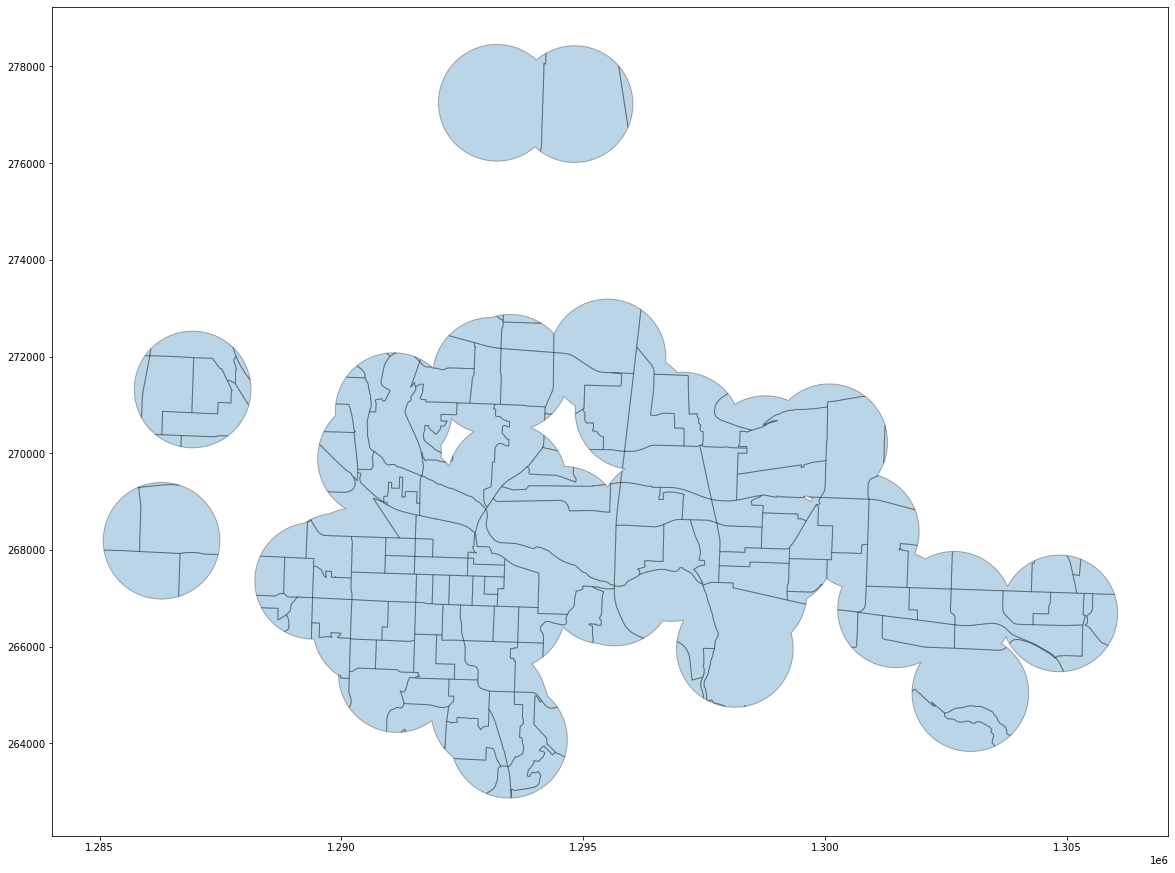

In [303]:
ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [304]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AH04M017  AH04M018 AH04M019  AH04M020 AH04M021 AH04M022 AH04M023 AH04M024  \
0        49        99       76       115       30       84       57       15   
1        49        99       76       115       30       84       57       15   
2        49        99       76       115       30       84       57       15   
3        49        99       76       115       30       84       57       15   
4        49        99       76       115       30       84       57       15   

  AH04M025                                           geometry  
0       12  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1       12  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2       12  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3       12  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4       12  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 118 columns]

In [305]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023 AH04M024 AH04M025  \
0        76       115       30        84       57       15       12   
1        76       115       30        84       57       15       12   
2        76       115       30        84       57       15       12   
3        76       115       30        84       57       15       12   
4        76       115       30        84       57       15       12   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 120 columns]

In [306]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'AH04E001', 'AH04E019','AH04E020','AH04E021', 'AH04E022','AH04E023','AH04E024','AH04E025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH04E001  AH04E019  AH04E020  AH04E021  AH04E022  AH04E023  \
0    123498508.0       930        99       182        38       159       100   
1    107098076.0       930        99       182        38       159       100   
2    106993288.0       930        99       182        38       159       100   
3      5503096.0       930        99       182        38       159       100   
4      5485965.0       930        99       182        38       159       100   

   AH04E024  AH04E025  area factor  
0         9         0     0.064030  
1         9         0     0.162677  
2         9         0     0.272778  
3         9         0     0.509423  
4         9         0     0.336968

In [307]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001   AH04E019   AH04E020   AH04E021   AH04E022  \
0    123498508.0   59.548244   6.339007  11.653527   2.433154  10.180829   
1    107098076.0  151.289234  16.104983  29.607140   6.181711  25.865579   
2    106993288.0  253.683218  27.004988  49.645533  10.365551  43.371647   
3      5503096.0  473.763318  50.432869  92.714972  19.358071  80.998245   
4      5485965.0  313.380477  33.359857  61.328222  12.804794  53.577952   

    AH04E023  AH04E024  AH04E025  
0   6.403037  0.576273       0.0  
1  16.267660  1.464089       0.0  
2  27.277765  2.454999       0.0  
3  50.942292  4.584806       0.0  
4  33.696825  3.032714       0.0

In [308]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH04E001    AH04E019     AH04E020    AH04E021  \
0      5453222.0  4937.104590  333.752421  1058.164150  598.588483   
1      5480007.0  4010.558490  433.432761   736.741961  496.745580   
2      5482102.0  5717.259292  474.475890  1230.960926  403.996541   
3      5483853.0  5144.057734  346.253048  1087.302602  605.051530   
4      5485472.0  5455.398611  502.677623   938.191961  534.061752   

      AH04E022    AH04E023    AH04E024    AH04E025  
0   850.863417  247.836776   16.499802   82.489701  
1   299.730056   52.127296    1.424376   43.781408  
2  1245.362415  652.481712  144.125010  117.412879  
3   893.017814  270.288785   23.532930   87.761516  
4  1420.205520  664.358742  137.744003  122.279364

# Number of students 

In [309]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  ALV5M012  \
0  Baker County        1      NaN  ...         4         5        18   
1  Baker County        1      NaN  ...        17        18         5   
2  Baker County        1      NaN  ...        16        21        11   
3  Baker County        1      NaN  ...         6        73        46   
4  Baker County        1      NaN  ...        12        18        12   

   ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  ALV5M019  
0        12        12        14        12         4        12       130  
1        12        12         7        12        12        10       116  
2        12         7        21         7        21        18       168  
3        22        23        12        11        30        37       153  
4        12        53        12        40        53        12       178  

[5 rows x 82 columns]

In [310]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
0        S  2.205986e+09  13837275.0  ...        4        5       18   
1        S  1.926901e+08     12317.0  ...       17       18        5   
2        S  4.723892e+08    639439.0  ...       16       21       11   
3        S  1.469016e+07         0.0  ...        6       73       46   
4        S  1.009492e+06         0.0  ...       12       18       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        12        12       14        12        4       12       130  
1        12        12        7        12       12       10       116  
2        12         7       21         7       21       18       168  
3        22        23       12        11       30       37       153  
4        12        53       12        40       53       12       178  

[5 rows x 98 columns]

In [311]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
947         S  106470708.0  1281425.0  ...       12       83       12   
951         S   89480046.0  1440549.0  ...       12       23       15   
952         S    8650347.0   128755.0  ...       16        4       23   
993         S   22884776.0        0.0  ...       20       13       12   
1024        S   25617334.0   865680.0  ...       12       12       21   

      ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
947         29        77        4        29       54       20       226  
951         21        34       16        14       12       12       135  
952         12        12       22         6       23       13       174  
993         12        15       12        12       12       13       153  
1024        12        12       12        25      332       21       243  

[5 rows x 98 columns]

In [312]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   ALV5M011  ALV5M012 ALV5M013  ALV5M014 ALV5M015 ALV5M016 ALV5M017 ALV5M018  \
0        12        12       12         6       12       12       35       12   
1        12        12       12         6       12       12       35       12   
2        12        12       12         6       12       12       35       12   
3        12        12       12         6       12       12       35       12   
4        12        12       12         6       12       12       35       12   

  ALV5M019                                           geometry  
0      290  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1      290  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2      290  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3      290  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4      290  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 112 columns]

In [313]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        12         6       12        12       35       12      290   
1        12         6       12        12       35       12      290   
2        12         6       12        12       35       12      290   
3        12         6       12        12       35       12      290   
4        12         6       12        12       35       12      290   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 114 columns]

In [314]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0    123498508.0      1045        46         0     0.064030
1    107098076.0      1045        46         0     0.162677
2    106993288.0      1045        46         0     0.272778
3      5503096.0      1045        46         0     0.509423
4      5485965.0      1045        46         0     0.336968

In [315]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALV5E001   ALV5E017  ALV5E018
0    123498508.0   66.911737   2.945397       0.0
1    107098076.0  169.997043   7.483123       0.0
2    106993288.0  285.052649  12.547772       0.0
3      5503096.0  532.346954  23.433454       0.0
4      5485965.0  352.131826  15.500540       0.0

In [316]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0    123498508.0       2.945397
1    107098076.0       7.483123
2    106993288.0      12.547772
3      5503096.0      23.433454
4      5485965.0      15.500540

In [317]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0      5453222.0     378.415246
1      5480007.0     297.659822
2      5482102.0     665.313804
3      5483853.0     375.103680
4      5485472.0     463.911513

In [318]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  5453222.0      378.415246
1  5480007.0      297.659822
2  5482102.0      665.313804
3  5483853.0      375.103680
4  5485472.0      463.911513

In [319]:
#pd.DataFrame.to_csv(output_student, 'Air_student_E2019_update_2.0_mile.csv',sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Education ( pct of at least college population)

In [320]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

osm_id_sensor     AH04E001    AH04E019     AH04E020    AH04E021  \
0      5453222.0  4937.104590  333.752421  1058.164150  598.588483   
1      5480007.0  4010.558490  433.432761   736.741961  496.745580   
2      5482102.0  5717.259292  474.475890  1230.960926  403.996541   
3      5483853.0  5144.057734  346.253048  1087.302602  605.051530   
4      5485472.0  5455.398611  502.677623   938.191961  534.061752   

      AH04E022    AH04E023    AH04E024    AH04E025  \
0   850.863417  247.836776   16.499802   82.489701   
1   299.730056   52.127296    1.424376   43.781408   
2  1245.362415  652.481712  144.125010  117.412879   
3   893.017814  270.288785   23.532930   87.761516   
4  1420.205520  664.358742  137.744003  122.279364   

   total_at_least_college_education  
0                       3188.194749  
1                       2063.983437  
2                       4268.815373  
3                       3313.208225  
4                       4319.518966

In [321]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['AH04E001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH04E001    AH04E019     AH04E020    AH04E021  \
0      5453222.0  4937.104590  333.752421  1058.164150  598.588483   
1      5480007.0  4010.558490  433.432761   736.741961  496.745580   
2      5482102.0  5717.259292  474.475890  1230.960926  403.996541   
3      5483853.0  5144.057734  346.253048  1087.302602  605.051530   
4      5485472.0  5455.398611  502.677623   938.191961  534.061752   

      AH04E022    AH04E023    AH04E024    AH04E025  \
0   850.863417  247.836776   16.499802   82.489701   
1   299.730056   52.127296    1.424376   43.781408   
2  1245.362415  652.481712  144.125010  117.412879   
3   893.017814  270.288785   23.532930   87.761516   
4  1420.205520  664.358742  137.744003  122.279364   

   total_at_least_college_education  pct_at_least_college_education  
0                       3188.194749                       64.576204  
1                       2063.983437                       51.463741  
2                       4268.815373                       74.665415  
3                       3313.208225                       64.408457  
4                       4319.518966                       79.178797

In [322]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  5453222.0                       64.576204
1  5480007.0                       51.463741
2  5482102.0                       74.665415
3  5483853.0                       64.408457
4  5485472.0                       79.178797

# Median Age

In [323]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Baker County        1      NaN     NaN  ...    NaN    NaN   
1  Baker County        1      NaN     NaN  ...    NaN    NaN   
2  Baker County        1      NaN     NaN  ...    NaN    NaN   
3  Baker County        1      NaN     NaN  ...    NaN    NaN   
4  Baker County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

   AHYRE003                                             NAME_M  AHYRM001  \
0      50.9  Block Group 1, Census Tract 9501, Baker County...       5.3   
1      45.7  Block Group 2, Census Tract 9501, Baker County...      13.5   
2      54.5  Block Group 3, Census Tract 9501, Baker County...       7.7   
3      48.0  Block Group 1, Census Tract 9502, Baker County...      10.5   
4      43.5  Block Group 2, Census Tract 9502, Baker County...      11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 44 columns]

In [324]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
0        S  2.205986e+09  13837275.0  ...   NaN   NaN   
1        S  1.926901e+08     12317.0  ...   NaN   NaN   
2        S  4.723892e+08    639439.0  ...   NaN   NaN   
3        S  1.469016e+07         0.0  ...   NaN   NaN   
4        S  1.009492e+06         0.0  ...   NaN   NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

  AHYRE003                                             NAME_M AHYRM001  \
0     50.9  Block Group 1, Census Tract 9501, Baker County...      5.3   
1     45.7  Block Group 2, Census Tract 9501, Baker County...     13.5   
2     54.5  Block Group 3, Census Tract 9501, Baker County...      7.7   
3     48.0  Block Group 1, Census Tract 9502, Baker County...     10.5   
4     43.5  Block Group 2, Census Tract 9502, Baker County...     11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 60 columns]

In [325]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... BTTRA BTBGA  \
947         S  106470708.0  1281425.0  ...   NaN   NaN   
951         S   89480046.0  1440549.0  ...   NaN   NaN   
952         S    8650347.0   128755.0  ...   NaN   NaN   
993         S   22884776.0        0.0  ...   NaN   NaN   
1024        S   25617334.0   865680.0  ...   NaN   NaN   

                                                 NAME_E  AHYRE001  AHYRE002  \
947   Block Group 1, Census Tract 2, Lane County, Or...      51.6      37.9   
951   Block Group 1, Census Tract 3, Lane County, Or...      53.0      58.6   
952   Block Group 2, Census Tract 3, Lane County, Or...      43.0      42.5   
993   Block Group 2, Census Tract 10.02, Lane County...      50.3      39.9   
1024  Block Group 1, Census Tract 17, Lane County, O...      44.6      37.7   

     AHYRE003                                             NAME_M AHYRM001  \
947      55.6  Block Group 1, Census Tract 2, Lane County, Or...     15.4   
951      51.4  Block Group 1, Census Tract 3, Lane County, Or...      5.3   
952      44.3  Block Group 2, Census Tract 3, Lane County, Or...      4.1   
993      56.3  Block Group 2, Census Tract 10.02, Lane County...     14.1   
1024     50.2  Block Group 1, Census Tract 17, Lane County, O...     19.7   

      AHYRM002  AHYRM003  
947       24.4       5.9  
951        7.1       5.4  
952        4.9       5.9  
993       19.2      12.4  
1024      24.5      20.3  

[5 rows x 60 columns]

In [326]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   BTBGA                                             NAME_E AHYRE001  \
0    NaN  Block Group 2, Census Tract 42, Lane County, O...     46.8   
1    NaN  Block Group 2, Census Tract 42, Lane County, O...     46.8   
2    NaN  Block Group 2, Census Tract 42, Lane County, O...     46.8   
3    NaN  Block Group 2, Census Tract 42, Lane County, O...     46.8   
4    NaN  Block Group 2, Census Tract 42, Lane County, O...     46.8   

   AHYRE002 AHYRE003                                             NAME_M  \
0      48.1     36.1  Block Group 2, Census Tract 42, Lane County, O...   
1      48.1     36.1  Block Group 2, Census Tract 42, Lane County, O...   
2      48.1     36.1  Block Group 2, Census Tract 42, Lane County, O...   
3      48.1     36.1  Block Group 2, Census Tract 42, Lane County, O...   
4      48.1     36.1  Block Group 2, Census Tract 42, Lane County, O...   

  AHYRM001 AHYRM002 AHYRM003  \
0     11.4     10.6     16.1   
1     11.4     10.6     16.1   
2     11.4     10.6     16.1   
3     11.4     10.6     16.1   
4     11.4     10.6     16.1   

                                            geometry  
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 74 columns]

In [327]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AHYRE001  AHYRE002 AHYRE003  \
0      46.8      48.1     36.1   
1      46.8      48.1     36.1   
2      46.8      48.1     36.1   
3      46.8      48.1     36.1   
4      46.8      48.1     36.1   

                                              NAME_M AHYRM001 AHYRM002  \
0  Block Group 2, Census Tract 42, Lane County, O...     11.4     10.6   
1  Block Group 2, Census Tract 42, Lane County, O...     11.4     10.6   
2  Block Group 2, Census Tract 42, Lane County, O...     11.4     10.6   
3  Block Group 2, Census Tract 42, Lane County, O...     11.4     10.6   
4  Block Group 2, Census Tract 42, Lane County, O...     11.4     10.6   

  AHYRM003                                           geometry  buffered area  \
0     16.1  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1     16.1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2     16.1  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3     16.1  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4     16.1  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 76 columns]

In [328]:
#    NHGIS code:  AHYR
#        AHYRE001:    Median age: Total
#        AHYRE002:    Median age: Male
#        AHYRE003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AHYRE001']]
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHYRE001
0    123498508.0  410390042002      46.8
1    107098076.0  410390042002      46.8
2    106993288.0  410390042002      46.8
3      5503096.0  410390042002      46.8
4      5485965.0  410390042002      46.8

In [329]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [330]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [331]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [332]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 9501, Baker County...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 9501, Baker County...   
2     NaN    NaN    NaN  Block Group 3, Census Tract 9501, Baker County...   
3     NaN    NaN    NaN  Block Group 1, Census Tract 9502, Baker County...   
4     NaN    NaN    NaN  Block Group 2, Census Tract 9502, Baker County...   

   AH1PE001                                             NAME_M  AH1PM001  
0   40156.0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1   34000.0  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2   62266.0  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3   78558.0  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4   43625.0  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 40 columns]

In [333]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
0        S  2.205986e+09  13837275.0  ...    NaN    NaN    NaN     NaN    NaN   
1        S  1.926901e+08     12317.0  ...    NaN    NaN    NaN     NaN    NaN   
2        S  4.723892e+08    639439.0  ...    NaN    NaN    NaN     NaN    NaN   
3        S  1.469016e+07         0.0  ...    NaN    NaN    NaN     NaN    NaN   
4        S  1.009492e+06         0.0  ...    NaN    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 9501, Baker County...  40156.0   
1   NaN  Block Group 2, Census Tract 9501, Baker County...  34000.0   
2   NaN  Block Group 3, Census Tract 9501, Baker County...  62266.0   
3   NaN  Block Group 1, Census Tract 9502, Baker County...  78558.0   
4   NaN  Block Group 2, Census Tract 9502, Baker County...  43625.0   

                                              NAME_M  AH1PM001  
0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 56 columns]

In [334]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  \
947         S  106470708.0  1281425.0  ...    NaN    NaN    NaN     NaN   
951         S   89480046.0  1440549.0  ...    NaN    NaN    NaN     NaN   
952         S    8650347.0   128755.0  ...    NaN    NaN    NaN     NaN   
993         S   22884776.0        0.0  ...    NaN    NaN    NaN     NaN   
1024        S   25617334.0   865680.0  ...    NaN    NaN    NaN     NaN   

      BTTRA BTBGA                                             NAME_E AH1PE001  \
947     NaN   NaN  Block Group 1, Census Tract 2, Lane County, Or...  90167.0   
951     NaN   NaN  Block Group 1, Census Tract 3, Lane County, Or...  84063.0   
952     NaN   NaN  Block Group 2, Census Tract 3, Lane County, Or...  57361.0   
993     NaN   NaN  Block Group 2, Census Tract 10.02, Lane County...  23167.0   
1024    NaN   NaN  Block Group 1, Census Tract 17, Lane County, O...  48095.0   

                                                 NAME_M  AH1PM001  
947   Block Group 1, Census Tract 2, Lane County, Or...   15248.0  
951   Block Group 1, Census Tract 3, Lane County, Or...   35538.0  
952   Block Group 2, Census Tract 3, Lane County, Or...   14478.0  
993   Block Group 2, Census Tract 10.02, Lane County...    7205.0  
1024  Block Group 1, Census Tract 17, Lane County, O...   19113.0  

[5 rows x 56 columns]

In [335]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   SDSECA  SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN     NaN    NaN    NaN   NaN   
1     NaN     NaN    NaN    NaN   NaN   
2     NaN     NaN    NaN    NaN   NaN   
3     NaN     NaN    NaN    NaN   NaN   
4     NaN     NaN    NaN    NaN   NaN   

                                              NAME_E AH1PE001  \
0  Block Group 2, Census Tract 42, Lane County, O...  24375.0   
1  Block Group 2, Census Tract 42, Lane County, O...  24375.0   
2  Block Group 2, Census Tract 42, Lane County, O...  24375.0   
3  Block Group 2, Census Tract 42, Lane County, O...  24375.0   
4  Block Group 2, Census Tract 42, Lane County, O...  24375.0   

                                              NAME_M AH1PM001  \
0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
1  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
2  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
3  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
4  Block Group 2, Census Tract 42, Lane County, O...  21333.0   

                                            geometry  
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 70 columns]

In [336]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   PUMA5A  BTTRA BTBGA                                             NAME_E  \
0     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
1     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
2     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
3     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
4     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   

  AH1PE001                                             NAME_M AH1PM001  \
0  24375.0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
1  24375.0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
2  24375.0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
3  24375.0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   
4  24375.0  Block Group 2, Census Tract 42, Lane County, O...  21333.0   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 72 columns]

In [337]:
#    Table 1:     Median Household Income in the Past 12 Months (in 2017 Inflation-Adjusted Dollars)
#    Universe:    Households
 #   Source code: B19013
 #   NHGIS code:  AH1P
 #       AH1PE001:    Median household income in the past 12 months (in 2017 inflation-adjusted dollars
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AH1PE001','area factor']]
income_filter.head(5)

# See rest of the part after hh density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor
0    123498508.0  410390042002   24375.0     0.064030
1    107098076.0  410390042002   24375.0     0.162677
2    106993288.0  410390042002   24375.0     0.272778
3      5503096.0  410390042002   24375.0     0.509423
4      5485965.0  410390042002   24375.0     0.336968

In [338]:
#income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
#income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# HH_density

In [339]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Baker County        1      NaN     NaN  ...   
1  Baker County        1      NaN     NaN  ...   
2  Baker County        1      NaN     NaN  ...   
3  Baker County        1      NaN     NaN  ...   
4  Baker County        1      NaN     NaN  ...   

                                              NAME_M  AHZZM001  AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...        70        65   
1  Block Group 2, Census Tract 9501, Baker County...        69        49   
2  Block Group 3, Census Tract 9501, Baker County...        61        63   
3  Block Group 1, Census Tract 9502, Baker County...        80        80   
4  Block Group 2, Census Tract 9502, Baker County...        85        69   

   AHZZM003  AHZZM004  AHZZM005  AHZZM006  AHZZM007  AHZZM008  AHZZM009  
0        67         7         2         7        53        47        19  
1        49        32        17        28        62        61        12  
2        63        37         8        37        36        29        23  
3        78        35        12        35        33        33        12  
4        69        38        38        24        82        78        21  

[5 rows x 56 columns]

In [340]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ...  \
0        S  2.205986e+09  13837275.0  ...   
1        S  1.926901e+08     12317.0  ...   
2        S  4.723892e+08    639439.0  ...   
3        S  1.469016e+07         0.0  ...   
4        S  1.009492e+06         0.0  ...   

                                              NAME_M AHZZM001 AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...       70       65   
1  Block Group 2, Census Tract 9501, Baker County...       69       49   
2  Block Group 3, Census Tract 9501, Baker County...       61       63   
3  Block Group 1, Census Tract 9502, Baker County...       80       80   
4  Block Group 2, Census Tract 9502, Baker County...       85       69   

   AHZZM003  AHZZM004 AHZZM005  AHZZM006 AHZZM007  AHZZM008  AHZZM009  
0        67         7        2         7       53        47        19  
1        49        32       17        28       62        61        12  
2        63        37        8        37       36        29        23  
3        78        35       12        35       33        33        12  
4        69        38       38        24       82        78        21  

[5 rows x 72 columns]

In [341]:
hhdensity1['Total Block HH']=hhdensity1.AHZZE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
0        S  2.205986e+09  13837275.0  ...       70       65       67   
1        S  1.926901e+08     12317.0  ...       69       49       49   
2        S  4.723892e+08    639439.0  ...       61       63       63   
3        S  1.469016e+07         0.0  ...       80       80       78   
4        S  1.009492e+06         0.0  ...       85       69       69   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
0         7         2        7        53       47        19             448  
1        32        17       28        62       61        12             402  
2        37         8       37        36       29        23             448  
3        35        12       35        33       33        12             439  
4        38        38       24        82       78        21             447  

[5 rows x 73 columns]

In [342]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
947       41      039  000200        1  410390002001  Block Group 1  G5030   
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
993       41      039  001002        2  410390010022  Block Group 2  G5030   
1024      41      039  001700        1  410390017001  Block Group 1  G5030   

     FUNCSTAT        ALAND     AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
947         S  106470708.0  1281425.0  ...       88       98       97   
951         S   89480046.0  1440549.0  ...       54       44       41   
952         S    8650347.0   128755.0  ...       65       63       55   
993         S   22884776.0        0.0  ...      101       86       50   
1024        S   25617334.0   865680.0  ...      137      108      104   

      AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
947         33        12       33        38       38        12             686  
951         30        14       30        52       50        17             391  
952         41        24       32        30       28        14             511  
993         69        12       69        78       75        27             562  
1024        43        26       34       130       97       109             700  

[5 rows x 73 columns]

In [343]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AHZZM002  AHZZM003 AHZZM004  AHZZM005 AHZZM006 AHZZM007 AHZZM008 AHZZM009  \
0        57        41       40        35       21       97       82       57   
1        57        41       40        35       21       97       82       57   
2        57        41       40        35       21       97       82       57   
3        57        41       40        35       21       97       82       57   
4        57        41       40        35       21       97       82       57   

  Total Block HH                                           geometry  
0            475  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1            475  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2            475  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3            475  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4            475  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 87 columns]

In [344]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008 AHZZM009 Total Block HH  \
0        40        35       21        97       82       57            475   
1        40        35       21        97       82       57            475   
2        40        35       21        97       82       57            475   
3        40        35       21        97       82       57            475   
4        40        35       21        97       82       57            475   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 89 columns]

In [345]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH"]]
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH
0    123498508.0  410390042002             475
1    107098076.0  410390042002             475
2    106993288.0  410390042002             475
3      5503096.0  410390042002             475
4      5485965.0  410390042002             475

In [346]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AHZZE001','area factor']]
hhdensity_filter
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor
0    123498508.0  410390042002       475     0.064030
1    107098076.0  410390042002       475     0.162677
2    106993288.0  410390042002       475     0.272778
3      5503096.0  410390042002       475     0.509423
4      5485965.0  410390042002       475     0.336968

In [347]:
hh_factor["buffered_hh"]=hh_factor['AHZZE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AHZZE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor  buffered_hh  hh factor
0    123498508.0  410390042002       475     0.064030    30.414426   0.064030
1    107098076.0  410390042002       475     0.162677    77.271383   0.162677
2    106993288.0  410390042002       475     0.272778   129.569386   0.272778
3      5503096.0  410390042002       475     0.509423   241.975888   0.509423
4      5485965.0  410390042002       475     0.336968   160.059921   0.336968

In [348]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0    123498508.0  410390042002    30.414426
1    107098076.0  410390042002    77.271383
2    106993288.0  410390042002   129.569386
3      5503096.0  410390042002   241.975888
4      5485965.0  410390042002   160.059921

In [349]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHZZE001
0    123498508.0  410390042002   30.414426
1    107098076.0  410390042002   77.271383
2    106993288.0  410390042002  129.569386
3      5503096.0  410390042002  241.975888
4      5485965.0  410390042002  160.059921

In [350]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHZZE001
0      5453222.0  3083.596544
1      5480007.0  2287.456246
2      5482102.0  3751.853029
3      5483853.0  3176.995413
4      5485472.0  3493.580441

In [351]:
output_hhdensity.columns=['osm_id', 'Total_HH']
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Total_HH
0  5453222.0  3083.596544
1  5480007.0  2287.456246
2  5482102.0  3751.853029
3  5483853.0  3176.995413
4  5485472.0  3493.580441

In [352]:
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Total_HH   HH_density
0  5453222.0  3083.596544  1744.955329
1  5480007.0  2287.456246  1294.432949
2  5482102.0  3751.853029  2123.110415
3  5483853.0  3176.995413  1797.808176
4  5485472.0  3493.580441  1976.958309

In [353]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id', 'HH_density']]
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   HH_density
0  5453222.0  1744.955329
1  5480007.0  1294.432949
2  5482102.0  2123.110415
3  5483853.0  1797.808176
4  5485472.0  1976.958309

# Weighted HH_income

In [354]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh
0    123498508.0  410390042002   24375.0     0.064030    30.414426
1    107098076.0  410390042002   24375.0     0.162677    77.271383
2    106993288.0  410390042002   24375.0     0.272778   129.569386
3      5503096.0  410390042002   24375.0     0.509423   241.975888
4      5485965.0  410390042002   24375.0     0.336968   160.059921

In [355]:
whh_income['wt_incme']=whh_income['AH1PE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh  \
0    123498508.0  410390042002   24375.0     0.064030    30.414426   
1    107098076.0  410390042002   24375.0     0.162677    77.271383   
2    106993288.0  410390042002   24375.0     0.272778   129.569386   
3      5503096.0  410390042002   24375.0     0.509423   241.975888   
4      5485965.0  410390042002   24375.0     0.336968   160.059921   

       wt_incme  
0  7.413516e+05  
1  1.883490e+06  
2  3.158254e+06  
3  5.898162e+06  
4  3.901461e+06

In [356]:
income_filter=whh_income.drop(['GEOID','AH1PE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0    123498508.0    30.414426  7.413516e+05
1    107098076.0    77.271383  1.883490e+06
2    106993288.0   129.569386  3.158254e+06
3      5503096.0   241.975888  5.898162e+06
4      5485965.0   160.059921  3.901461e+06

In [357]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0      5453222.0  3083.596544  1.117670e+08
1      5480007.0  2287.456246  1.000569e+08
2      5482102.0  3751.853029  1.024852e+08
3      5483853.0  3176.995413  1.198987e+08
4      5485472.0  3493.580441  2.059003e+08

In [358]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0      5453222.0  3083.596544  1.117670e+08        36245.662334
1      5480007.0  2287.456246  1.000569e+08        43741.555498
2      5482102.0  3751.853029  1.024852e+08        27315.889463
3      5483853.0  3176.995413  1.198987e+08        37739.664970
4      5485472.0  3493.580441  2.059003e+08        58936.744413

In [359]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  5453222.0      36245.662334
1  5480007.0      43741.555498
2  5482102.0      27315.889463
3  5483853.0      37739.664970
4  5485472.0      58936.744413

# Population Density

In [360]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   SDSECA  SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN     NaN    NaN    NaN   NaN   
1     NaN     NaN    NaN    NaN   NaN   
2     NaN     NaN    NaN    NaN   NaN   
3     NaN     NaN    NaN    NaN   NaN   
4     NaN     NaN    NaN    NaN   NaN   

                                              NAME_E AHY1E001  \
0  Block Group 2, Census Tract 42, Lane County, O...     1130   
1  Block Group 2, Census Tract 42, Lane County, O...     1130   
2  Block Group 2, Census Tract 42, Lane County, O...     1130   
3  Block Group 2, Census Tract 42, Lane County, O...     1130   
4  Block Group 2, Census Tract 42, Lane County, O...     1130   

                                              NAME_M AHY1M001  \
0  Block Group 2, Census Tract 42, Lane County, O...      301   
1  Block Group 2, Census Tract 42, Lane County, O...      301   
2  Block Group 2, Census Tract 42, Lane County, O...      301   
3  Block Group 2, Census Tract 42, Lane County, O...      301   
4  Block Group 2, Census Tract 42, Lane County, O...      301   

                                            geometry  
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 70 columns]

In [361]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   PUMA5A  BTTRA BTBGA                                             NAME_E  \
0     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
1     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
2     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
3     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   
4     NaN    NaN   NaN  Block Group 2, Census Tract 42, Lane County, O...   

  AHY1E001                                             NAME_M AHY1M001  \
0     1130  Block Group 2, Census Tract 42, Lane County, O...      301   
1     1130  Block Group 2, Census Tract 42, Lane County, O...      301   
2     1130  Block Group 2, Census Tract 42, Lane County, O...      301   
3     1130  Block Group 2, Census Tract 42, Lane County, O...      301   
4     1130  Block Group 2, Census Tract 42, Lane County, O...      301   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 72 columns]

In [362]:
#    Table 1:     Total Population
#    Universe:    Total population
#    Source code: B01003
#    NHGIS code:  AHY1
#       AHY1E001:    Total
 
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AHY1E001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY1E001  area factor
0    123498508.0      1130     0.064030
1    107098076.0      1130     0.162677
2    106993288.0      1130     0.272778
3      5503096.0      1130     0.509423
4      5485965.0      1130     0.336968

In [363]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AHY1E001','area factor']]
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor
0    123498508.0  410390042002   72.354318     0.064030
1    107098076.0  410390042002  183.824553     0.162677
2    106993288.0  410390042002  308.238749     0.272778
3      5503096.0  410390042002  575.647903     0.509423
4      5485965.0  410390042002  380.774127     0.336968

In [364]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AHY1E001','area factor']]
pp.columns=['osm_id','GEOID', 'AHY1E001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0  123498508.0  410390042002   0.064030
1  107098076.0  410390042002   0.162677
2  106993288.0  410390042002   0.272778
3    5503096.0  410390042002   0.509423
4    5485965.0  410390042002   0.336968

In [365]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001
0    123498508.0   72.354318
1    107098076.0  183.824553
2    106993288.0  308.238749
3      5503096.0  575.647903
4      5485965.0  380.774127

In [366]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001
0      5453222.0  7060.110054
1      5480007.0  6088.295841
2      5482102.0  7129.755862
3      5483853.0  7320.682342
4      5485472.0  7953.601327

In [367]:
output_pdensity['population_density']=output_pdensity.AHY1E001/(3.1416*size*size*3.86102e-7)
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001  population_density
0      5453222.0  7060.110054         3995.197325
1      5480007.0  6088.295841         3445.264036
2      5482102.0  7129.755862         4034.608714
3      5483853.0  7320.682342         4142.650793
4      5485472.0  7953.601327         4500.808982

In [368]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  5453222.0         3995.197325
1  5480007.0         3445.264036
2  5482102.0         4034.608714
3  5483853.0         4142.650793
4  5485472.0         4500.808982

# Weighted Median Age

In [369]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001
0    123498508.0  410390042002   72.354318     0.064030      46.8
1    107098076.0  410390042002  183.824553     0.162677      46.8
2    106993288.0  410390042002  308.238749     0.272778      46.8
3      5503096.0  410390042002  575.647903     0.509423      46.8
4      5485965.0  410390042002  380.774127     0.336968      46.8

In [370]:
w_age['w_age']=(w_age['AHY1E001'].mul(w_age['AHYRE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001  \
0    123498508.0  410390042002   72.354318     0.064030      46.8   
1    107098076.0  410390042002  183.824553     0.162677      46.8   
2    106993288.0  410390042002  308.238749     0.272778      46.8   
3      5503096.0  410390042002  575.647903     0.509423      46.8   
4      5485965.0  410390042002  380.774127     0.336968      46.8   

          w_age  
0   3386.182098  
1   8602.989099  
2  14425.573469  
3  26940.321843  
4  17820.229164

In [371]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AHYRE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001         w_age
0    123498508.0   72.354318   3386.182098
1    107098076.0  183.824553   8602.989099
2    106993288.0  308.238749  14425.573469
3      5503096.0  575.647903  26940.321843
4      5485965.0  380.774127  17820.229164

In [372]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001          w_age
0      5453222.0  7060.110054  274578.378272
1      5480007.0  6088.295841  216605.681708
2      5482102.0  7129.755862  281564.001522
3      5483853.0  7320.682342  287309.740546
4      5485472.0  7953.601327  317815.728387

In [373]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AHY1E001']
output_median_age=output_median_age.drop(['AHY1E001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0      5453222.0            38.891515
1      5480007.0            35.577391
2      5482102.0            39.491395
3      5483853.0            39.246306
4      5485472.0            39.958720

In [374]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  5453222.0   38.891515
1  5480007.0   35.577391
2  5482102.0   39.491395
3  5483853.0   39.246306
4  5485472.0   39.958720

# Employment Density

In [375]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH3PE006  AH3PE007  \
0  Baker County        1      NaN     NaN  ...         0       444   
1  Baker County        1      NaN     NaN  ...         0       344   
2  Baker County        1      NaN     NaN  ...         0       469   
3  Baker County        1      NaN     NaN  ...         0       372   
4  Baker County        1      NaN     NaN  ...         0       289   

                                              NAME_M  AH3PM001  AH3PM002  \
0  Block Group 1, Census Tract 9501, Baker County...       138        91   
1  Block Group 2, Census Tract 9501, Baker County...       109        84   
2  Block Group 3, Census Tract 9501, Baker County...       129        80   
3  Block Group 1, Census Tract 9502, Baker County...       172       160   
4  Block Group 2, Census Tract 9502, Baker County...       170       161   

   AH3PM003  AH3PM004  AH3PM005  AH3PM006  AH3PM007  
0        91        94        25        12        96  
1        84        81        11        12        89  
2        80        80        22        12       107  
3       160       155        44        12        90  
4       161       120        90        12        76  

[5 rows x 52 columns]

In [376]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AH3PE007                                             NAME_M AH3PM001  \
0       428  Block Group 2, Census Tract 42, Lane County, O...      290   
1       428  Block Group 2, Census Tract 42, Lane County, O...      290   
2       428  Block Group 2, Census Tract 42, Lane County, O...      290   
3       428  Block Group 2, Census Tract 42, Lane County, O...      290   
4       428  Block Group 2, Census Tract 42, Lane County, O...      290   

   AH3PM002 AH3PM003 AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0       263      263      130      250       12      104   
1       263      263      130      250       12      104   
2       263      263      130      250       12      104   
3       263      263      130      250       12      104   
4       263      263      130      250       12      104   

                                            geometry  
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 82 columns]

In [377]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   AH3PM001  AH3PM002 AH3PM003  AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0       290       263      263       130      250       12      104   
1       290       263      263       130      250       12      104   
2       290       263      263       130      250       12      104   
3       290       263      263       130      250       12      104   
4       290       263      263       130      250       12      104   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 84 columns]

In [378]:
#    Table 1:     Employment Status for the Population 16 Years and Over
#    Universe:    Population 16 years and over
#    Source code: B23025
#    NHGIS code:  AH3P
#        AH3PE001:    Total
#        AH3PE002:    In labor force
#        AH3PE003:    In labor force: Civilian labor force
#        AH3PE004:    In labor force: Civilian labor force: Employed
#        AH3PE005:    In labor force: Civilian labor force: Unemployed
#        AH3PE006:    In labor force: Armed Forces
#        AH3PE007:    Not in labor force
 # columns to keep
filtered_columns=['osm_id_sensor','AH3PE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH3PE001  area factor
0    123498508.0      1060     0.064030
1    107098076.0      1060     0.162677
2    106993288.0      1060     0.272778
3      5503096.0      1060     0.509423
4      5485965.0      1060     0.336968

In [379]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH3PE001
0    123498508.0   67.872192
1    107098076.0  172.437192
2    106993288.0  289.144314
3      5503096.0  539.988298
4      5485965.0  357.186350

In [380]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH3PE001
0      5453222.0  5862.406294
1      5480007.0  4816.021394
2      5482102.0  6670.551449
3      5483853.0  6078.256269
4      5485472.0  6424.287908

In [381]:
output_edensity['employment_density']=output_edensity.AH3PE001/(3.1416*size*size*3.86102e-7)
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH3PE001  employment_density
0      5453222.0  5862.406294         3317.436947
1      5480007.0  4816.021394         2725.305363
2      5482102.0  6670.551449         3774.752674
3      5483853.0  6078.256269         3439.582811
4      5485472.0  6424.287908         3635.396286

In [382]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  5453222.0         3317.436947
1  5480007.0         2725.305363
2  5482102.0         3774.752674
3  5483853.0         3439.582811
4  5485472.0         3635.396286

# Number of Jobs within the Buffer (LEHD data)

In [383]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  410019501001003     2     0     0     2     2     0     0      0      0   
1  410019501001160     2     2     0     0     1     1     0      0      0   
2  410019501001171     5     0     3     2     0     2     3      0      5   
3  410019501001198    14     2     5     7     6     8     0      0      0   
4  410019501001203     1     0     0     1     0     1     0      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [384]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [385]:
print(bg_lehd1.crs)

epsg:4269


In [386]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2839')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...

In [387]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...      1.413985e+06  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...      1.606883e+04  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...      1.694584e+03  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...      1.147454e+06  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...      1.944975e+04

In [388]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
100165        41        039    002600    1029  410390026001029       N   
100205        41        039    002503    3012  410390025033012       N   
100214        41        039    004100    4020  410390041004020       N   
100257        41        039    004300    1000  410390043001000       N   
100285        41        039    002600    3007  410390026003007       N   

        HOUSING10  POP10                                           geometry  \
100165          0      0  POLYGON ((1286495.925 272412.458, 1286496.128 ...   
100205         20     60  POLYGON ((1285761.639 271455.229, 1285723.537 ...   
100214          2      5  POLYGON ((1290110.398 270432.548, 1290101.754 ...   
100257         90    192  POLYGON ((1287983.660 270845.639, 1287953.453 ...   
100285         16     43  POLYGON ((1286313.249 271233.847, 1286315.277 ...   

        Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
100165      24475.209512  ...    NaN    NaN    NaN    NaN    NaN    NaN   
100205      17023.884448  ...    NaN    NaN    NaN    NaN    NaN    NaN   
100214       2110.559194  ...    NaN    NaN    NaN    NaN    NaN    NaN   
100257     272366.403286  ...    0.0    0.0    0.0    0.0    0.0    0.0   
100285      21109.066242  ...    NaN    NaN    NaN    NaN    NaN    NaN   

        CFS03  CFS04  CFS05  createdate  
100165    NaN    NaN    NaN         NaN  
100205    NaN    NaN    NaN         NaN  
100214    NaN    NaN    NaN         NaN  
100257    0.0    0.0    0.0  20201120.0  
100285    NaN    NaN    NaN         NaN  

[5 rows x 63 columns]

In [389]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA03  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0   93.186492   1.438356   1.191781    787.0  ...    NaN   
2             1.0   83.037733   4.890411   1.479452    778.0  ...    NaN   
3             1.0  177.231087   2.150685   0.767123    519.0  ...    NaN   
4             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   

   CFA04 CFA05  CFS01 CFS02 CFS03 CFS04 CFS05  createdate  \
0    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
1    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
2    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
3    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
4    0.0   0.0    0.0   0.0   0.0   0.0   0.0  20201120.0   

                                            geometry  
0  POLYGON ((1290901.910 267733.431, 1290900.878 ...  
1  POLYGON ((1290901.910 267733.431, 1290900.878 ...  
2  POLYGON ((1290901.910 267733.431, 1290900.878 ...  
3  POLYGON ((1290901.910 267733.431, 1290900.878 ...  
4  POLYGON ((1290572.063 266143.901, 1290557.404 ...  

[5 rows x 77 columns]

In [390]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
2  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
3  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA05  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0   93.186492   1.438356   1.191781    787.0  ...    NaN   
2             1.0   83.037733   4.890411   1.479452    778.0  ...    NaN   
3             1.0  177.231087   2.150685   0.767123    519.0  ...    NaN   
4             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   

   CFS01 CFS02  CFS03 CFS04 CFS05  createdate  \
0    NaN   NaN    NaN   NaN   NaN         NaN   
1    NaN   NaN    NaN   NaN   NaN         NaN   
2    NaN   NaN    NaN   NaN   NaN         NaN   
3    NaN   NaN    NaN   NaN   NaN         NaN   
4    0.0   0.0    0.0   0.0   0.0  20201120.0   

                                            geometry  buffered area  \
0  POLYGON ((1290901.910 267733.431, 1290900.878 ...    7427.287181   
1  POLYGON ((1290901.910 267733.431, 1290900.878 ...    7427.287181   
2  POLYGON ((1290901.910 267733.431, 1290900.878 ...    7427.287181   
3  POLYGON ((1290901.910 267733.431, 1290900.878 ...    7427.287181   
4  POLYGON ((1290572.063 266143.901, 1290557.404 ...  281902.418035   

  area factor  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  

[5 rows x 79 columns]

In [391]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   C000  area factor
0    123498508.0    NaN          1.0
1      5503096.0    NaN          1.0
2      5485965.0    NaN          1.0
3    216890849.0    NaN          1.0
4    123498508.0  204.0          1.0

In [392]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   C000
0    123498508.0    NaN
1      5503096.0    NaN
2      5485965.0    NaN
3    216890849.0    NaN
4    123498508.0  204.0

In [393]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor          C000
0      5453222.0   3398.869299
1      5480007.0   1946.916478
2      5482102.0  12308.839416
3      5483853.0   3409.923879
4      5485472.0   2233.855886

In [394]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  5453222.0     3398.869299
1  5480007.0     1946.916478
2  5482102.0    12308.839416
3  5483853.0     3409.923879
4  5485472.0     2233.855886

# percentage of bike commute or Bike commute per Square miles

In [395]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Baker County        1      NaN  ...        12        12        12   
1  Baker County        1      NaN  ...        12        12        12   
2  Baker County        1      NaN  ...        12        12        12   
3  Baker County        1      NaN  ...        12        12        12   
4  Baker County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        12        12        21         4        21  
1        12        12        12        12         9        12        15  
2        12        12        12        12        12        20        13  
3        12        12        12        28        26        12        21  
4        12        13        12         8        75        21        24  

[5 rows x 86 columns]

In [396]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   ALU1M013  ALU1M014 ALU1M015  ALU1M016 ALU1M017 ALU1M018 ALU1M019 ALU1M020  \
0        12        12       12        12       12       24       65       12   
1        12        12       12        12       12       24       65       12   
2        12        12       12        12       12       24       65       12   
3        12        12       12        12       12       24       65       12   
4        12        12       12        12       12       24       65       12   

  ALU1M021                                           geometry  
0       34  POLYGON ((1289617.373 268326.156, 1289728.899 ...  
1       34  POLYGON ((1290741.147 268819.996, 1290623.979 ...  
2       34  POLYGON ((1290836.526 268710.757, 1290718.219 ...  
3       34  POLYGON ((1289514.143 268595.556, 1289609.283 ...  
4       34  POLYGON ((1289553.453 268708.163, 1289668.354 ...  

[5 rows x 116 columns]

In [397]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                 site_name sensor_type  year  \
0  P001EUG          Fern Ridge Path west of Chambers   permanent  2019   
1  P004EUG  North Bank Path south of Greenway Bridge   permanent  2019   
2  P008EUG                           Greenway Bridge   permanent  2019   
3  S003EUG              12th Ave East of Chambers St  short-term  2019   
4  S009EUG                 13th Ave West of Hayes St  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
2  Eugene             2.0  538.194643  19.520548   8.972603   3147.0  ...   
3  Eugene             2.0   93.186492   1.438356   1.191781    787.0  ...   
4  Eugene             1.0   83.037733   4.890411   1.479452    778.0  ...   

   ALU1M015  ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12        12       12        24       65       12       34   
1        12        12       12        24       65       12       34   
2        12        12       12        24       65       12       34   
3        12        12       12        24       65       12       34   
4        12        12       12        24       65       12       34   

                                            geometry  buffered area  \
0  POLYGON ((1289617.373 268326.156, 1289728.899 ...   99133.267869   
1  POLYGON ((1290741.147 268819.996, 1290623.979 ...  251859.586473   
2  POLYGON ((1290836.526 268710.757, 1290718.219 ...  422320.536128   
3  POLYGON ((1289514.143 268595.556, 1289609.283 ...  788700.094900   
4  POLYGON ((1289553.453 268708.163, 1289668.354 ...  521701.875532   

  area factor  
0    0.064030  
1    0.162677  
2    0.272778  
3    0.509423  
4    0.336968  

[5 rows x 118 columns]

In [398]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0    123498508.0       471        19     0.064030
1    107098076.0       471        19     0.162677
2    106993288.0       471        19     0.272778
3      5503096.0       471        19     0.509423
4      5485965.0       471        19     0.336968

In [399]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALU1E001  ALU1E018
0    123498508.0   30.158304  1.216577
1    107098076.0   76.620677  3.090855
2    106993288.0  128.478275  5.182775
3      5503096.0  239.938197  9.679036
4      5485965.0  158.712048  6.402397

In [400]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALU1E001    ALU1E018
0      5453222.0  3860.035727  166.566613
1      5480007.0  2675.787366   14.951935
2      5482102.0  3728.299399  533.770486
3      5483853.0  3996.935491  178.541104
4      5485472.0  3496.405330   50.060781

In [401]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [402]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom['ALU1E018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  5453222.0     3860.035727     166.566613                     4.315157   
1  5480007.0     2675.787366      14.951935                     0.558786   
2  5482102.0     3728.299399     533.770486                    14.316728   
3  5483853.0     3996.935491     178.541104                     4.466950   
4  5485472.0     3496.405330      50.060781                     1.431779   

   bike commuter density  
0              94.257728  
1               8.461092  
2             302.053289  
3             101.033926  
4              28.328699

# Extract slope from raster file

In [403]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [404]:
# Open the raster image if you have multiple image combine it using arcGIS raster data set 
eu = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugenc.img')
print(eu.crs)
#rioplot.show(eu)

EPSG:4269


In [405]:
print(strava_proj.crs)

epsg:2839


In [406]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2839")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0  55148.0  5230417.0  Jamestown Avenue     None  36756063.0  36756073.0   
1  55319.0  5230636.0              None     None  36759627.0  36759640.0   
2  55320.0  5230636.0              None     None  36759640.0  36759656.0   
3  55321.0  5230636.0              None     None  36759656.0  36759697.0   
4  55361.0  5230683.0              None     None  36760776.0  36760798.0   
5  55362.0  5230683.0              None     None  36760798.0  36760862.0   
6  55363.0  5230683.0              None     None  36760862.0  36760864.0   
7  55364.0  5230683.0              None     None  36760864.0  36760890.0   
8  55455.0  5230995.0              None     None  36765374.0  36765377.0   
9  55465.0  5231024.0              None     None  36765600.0  36765619.0   

   CLAZZ  FLAGS    SOURCE    TARGET        KM   KMH      COST  REVERSE_CO  \
0   51.0    3.0   43748.0   43749.0  0.086402   5.0  0.017280    0.017280   
1   71.0    6.0   43876.0  686987.0  0.600701  10.0  0.060070    0.060070   
2   71.0    6.0  686987.0   48131.0  0.609955  10.0  0.060996    0.060996   
3   71.0    6.0   48131.0   43877.0  0.571119  10.0  0.057112    0.057112   
4   32.0    3.0   43920.0   48008.0  0.229056  50.0  0.004581    0.004581   
5   32.0    3.0   48008.0   48012.0  0.276750  50.0  0.005535    0.005535   
6   32.0    3.0   48012.0   45551.0  0.039047  50.0  0.000781    0.000781   
7   32.0    3.0   45551.0   43921.0  1.828441  50.0  0.036569    0.036569   
8   32.0    3.0   44007.0   44008.0  0.090744  50.0  0.001815    0.001815   
9   51.0    3.0   44020.0   44435.0  0.898224   5.0  0.179645    0.179645   

           X1         Y1          X2         Y2  \
0 -123.407679  44.312296 -123.407959  44.313026   
1 -123.481924  44.313850 -123.486752  44.310035   
2 -123.486752  44.310035 -123.493838  44.310361   
3 -123.493838  44.310361 -123.498983  44.313493   
4 -123.455104  44.306211 -123.454365  44.307271   
5 -123.454365  44.307271 -123.456152  44.309179   
6 -123.456152  44.309179 -123.456438  44.309457   
7 -123.456438  44.309457 -123.454090  44.320527   
8 -123.538977  44.281453 -123.539395  44.282211   
9 -123.563171  44.281341 -123.556068  44.286023   

                                            geometry       length  
0  LINESTRING (-123.40767 44.31230, -123.40783 44...    86.384552  
1  LINESTRING (-123.48192 44.31385, -123.48262 44...   601.268445  
2  LINESTRING (-123.48675 44.31004, -123.48754 44...   611.410772  
3  LINESTRING (-123.49383 44.31036, -123.49396 44...   571.912363  
4  LINESTRING (-123.45510 44.30621, -123.45358 44...   229.435724  
5  LINESTRING (-123.45436 44.30727, -123.45454 44...   276.923299  
6  LINESTRING (-123.45615 44.30918, -123.45628 44...    39.072656  
7  LINESTRING (-123.45643 44.30946, -123.45667 44...  1829.270476  
8  LINESTRING (-123.53897 44.28145, -123.53907 44...    90.731357  
9  LINESTRING (-123.56317 44.28134, -123.56321 44...   899.360901

In [407]:
# get the slope for each link of the network
strava_slope_new
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [408]:
strava_slope_new.head(5)

ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0  55148.0  5230417.0  Jamestown Avenue     None  36756063.0  36756073.0   
1  55319.0  5230636.0              None     None  36759627.0  36759640.0   
2  55320.0  5230636.0              None     None  36759640.0  36759656.0   
3  55321.0  5230636.0              None     None  36759656.0  36759697.0   
4  55361.0  5230683.0              None     None  36760776.0  36760798.0   

   CLAZZ  FLAGS    SOURCE    TARGET  ...      COST  REVERSE_CO          X1  \
0   51.0    3.0   43748.0   43749.0  ...  0.017280    0.017280 -123.407679   
1   71.0    6.0   43876.0  686987.0  ...  0.060070    0.060070 -123.481924   
2   71.0    6.0  686987.0   48131.0  ...  0.060996    0.060996 -123.486752   
3   71.0    6.0   48131.0   43877.0  ...  0.057112    0.057112 -123.493838   
4   32.0    3.0   43920.0   48008.0  ...  0.004581    0.004581 -123.455104   

          Y1          X2         Y2  \
0  44.312296 -123.407959  44.313026   
1  44.313850 -123.486752  44.310035   
2  44.310035 -123.493838  44.310361   
3  44.310361 -123.498983  44.313493   
4  44.306211 -123.454365  44.307271   

                                            geometry      length  \
0  LINESTRING (-123.40767 44.31230, -123.40783 44...   86.384552   
1  LINESTRING (-123.48192 44.31385, -123.48262 44...  601.268445   
2  LINESTRING (-123.48675 44.31004, -123.48754 44...  611.410772   
3  LINESTRING (-123.49383 44.31036, -123.49396 44...  571.912363   
4  LINESTRING (-123.45510 44.30621, -123.45358 44...  229.435724   

                                 starting point  \
0  POINT (-123.4076728782144 44.31229635796337)   
1  POINT (-123.4819181268069 44.31385059040208)   
2  POINT (-123.4867461753912 44.31003508180653)   
3  POINT (-123.4938326078637 44.31036140515113)   
4  POINT (-123.4550981422582 44.30621146240811)   

                                   ending point  
0  POINT (-123.4079532764111 44.31302586358332)  
1  POINT (-123.4867461753912 44.31003508180653)  
2  POINT (-123.4938326078637 44.31036140515113)  
3  POINT (-123.4989771109622 44.31349363934137)  
4  POINT (-123.4543591324984 44.30727146678423)  

[5 rows x 22 columns]

In [409]:
#show point and raster on a matplotlib plot
#fig, ax = plt.subplots(figsize=(12,12))
#strava_slope_new.boundary.plot(ax=ax, color='orangered')
#show(eu, ax=ax)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [410]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

OSM_ID                     geometry   start_lon  start_lat
0  5230417.0  POINT (-123.40767 44.31230) -123.407673  44.312296
1  5230636.0  POINT (-123.48192 44.31385) -123.481918  44.313851
2  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035
3  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361
4  5230683.0  POINT (-123.45510 44.30621) -123.455098  44.306211

In [411]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [412]:
sf2.head(5)

OSM_ID                     geometry   start_lon  start_lat  starting_ele
0  5230417.0  POINT (-123.40767 44.31230) -123.407673  44.312296    118.542374
1  5230636.0  POINT (-123.48192 44.31385) -123.481918  44.313851    261.173798
2  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035    285.294647
3  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361    329.101166
4  5230683.0  POINT (-123.45510 44.30621) -123.455098  44.306211    311.390869

In [413]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry     end_lon    end_lat
0  5230417.0  POINT (-123.40795 44.31303) -123.407953  44.313026
1  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035
2  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361
3  5230636.0  POINT (-123.49898 44.31349) -123.498977  44.313494
4  5230683.0  POINT (-123.45436 44.30727) -123.454359  44.307271

In [414]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [415]:
#rioplot.show(n46w123, cmap='hot')
#strava_slope_new.boundary.plot(ax=plt.gca(), color='skyblue')

In [416]:
ef1.head()

OSM_ID                     geometry     end_lon    end_lat  ending_ele
0  5230417.0  POINT (-123.40795 44.31303) -123.407953  44.313026  116.813477
1  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035  285.294647
2  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361  329.101166
3  5230636.0  POINT (-123.49898 44.31349) -123.498977  44.313494  388.837860
4  5230683.0  POINT (-123.45436 44.30727) -123.454359  44.307271  342.645752

In [417]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID   start_lon  start_lat  starting_ele
0  5230417.0 -123.407673  44.312296    118.542374
1  5230636.0 -123.481918  44.313851    261.173798
2  5230636.0 -123.486746  44.310035    285.294647
3  5230636.0 -123.493833  44.310361    329.101166
4  5230683.0 -123.455098  44.306211    311.390869

In [418]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat  ending_ele
0  5230417.0 -123.407953  44.313026  116.813477
1  5230636.0 -123.486746  44.310035  285.294647
2  5230636.0 -123.493833  44.310361  329.101166
3  5230636.0 -123.498977  44.313494  388.837860
4  5230683.0 -123.454359  44.307271  342.645752

In [419]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['ID'], keep='first')
strava_all1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0   55148.0  5230417.0  Jamestown Avenue        0  36756063.0  36756073.0   
1   55319.0  5230636.0                 0        0  36759627.0  36759640.0   
10  55320.0  5230636.0                 0        0  36759640.0  36759656.0   
19  55321.0  5230636.0                 0        0  36759656.0  36759697.0   
28  55361.0  5230683.0                 0        0  36760776.0  36760798.0   

    CLAZZ  FLAGS    SOURCE    TARGET  ...      length  \
0    51.0    3.0   43748.0   43749.0  ...   86.384552   
1    71.0    6.0   43876.0  686987.0  ...  601.268445   
10   71.0    6.0  686987.0   48131.0  ...  611.410772   
19   71.0    6.0   48131.0   43877.0  ...  571.912363   
28   32.0    3.0   43920.0   48008.0  ...  229.435724   

                                  starting point  \
0   POINT (-123.4076728782144 44.31229635796337)   
1   POINT (-123.4819181268069 44.31385059040208)   
10  POINT (-123.4867461753912 44.31003508180653)   
19  POINT (-123.4938326078637 44.31036140515113)   
28  POINT (-123.4550981422582 44.30621146240811)   

                                    ending point   start_lon  start_lat  \
0   POINT (-123.4079532764111 44.31302586358332) -123.407673  44.312296   
1   POINT (-123.4867461753912 44.31003508180653) -123.481918  44.313851   
10  POINT (-123.4938326078637 44.31036140515113) -123.481918  44.313851   
19  POINT (-123.4989771109622 44.31349363934137) -123.481918  44.313851   
28  POINT (-123.4543591324984 44.30727146678423) -123.455098  44.306211   

    starting_ele     end_lon    end_lat  ending_ele      slope  
0     118.542374 -123.407953  44.313026  116.813477   2.001396  
1     261.173798 -123.486746  44.310035  285.294647   4.011661  
10    261.173798 -123.486746  44.310035  285.294647   3.945114  
19    261.173798 -123.486746  44.310035  285.294647   4.217578  
28    311.390869 -123.454359  44.307271  342.645752  13.622501  

[5 rows x 29 columns]

In [420]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [421]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2839)
strava_all2_slope.head(10)

ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0   55148.0  5230417.0  Jamestown Avenue        0  36756063.0  36756073.0   
1   55319.0  5230636.0                 0        0  36759627.0  36759640.0   
10  55320.0  5230636.0                 0        0  36759640.0  36759656.0   
19  55321.0  5230636.0                 0        0  36759656.0  36759697.0   
28  55361.0  5230683.0                 0        0  36760776.0  36760798.0   
44  55362.0  5230683.0                 0        0  36760798.0  36760862.0   
60  55363.0  5230683.0                 0        0  36760862.0  36760864.0   
76  55364.0  5230683.0                 0        0  36760864.0  36760890.0   
92  55455.0  5230995.0                 0        0  36765374.0  36765377.0   
93  55465.0  5231024.0                 0        0  36765600.0  36765619.0   

    CLAZZ  FLAGS    SOURCE    TARGET  ...       length  \
0    51.0    3.0   43748.0   43749.0  ...    86.384552   
1    71.0    6.0   43876.0  686987.0  ...   601.268445   
10   71.0    6.0  686987.0   48131.0  ...   611.410772   
19   71.0    6.0   48131.0   43877.0  ...   571.912363   
28   32.0    3.0   43920.0   48008.0  ...   229.435724   
44   32.0    3.0   48008.0   48012.0  ...   276.923299   
60   32.0    3.0   48012.0   45551.0  ...    39.072656   
76   32.0    3.0   45551.0   43921.0  ...  1829.270476   
92   32.0    3.0   44007.0   44008.0  ...    90.731357   
93   51.0    3.0   44020.0   44435.0  ...   899.360901   

                                  starting point  \
0   POINT (-123.4076728782144 44.31229635796337)   
1   POINT (-123.4819181268069 44.31385059040208)   
10  POINT (-123.4867461753912 44.31003508180653)   
19  POINT (-123.4938326078637 44.31036140515113)   
28  POINT (-123.4550981422582 44.30621146240811)   
44  POINT (-123.4543591324984 44.30727146678423)   
60  POINT (-123.4561461304003 44.30917948411232)   
76  POINT (-123.4564321302036 44.30945748671085)   
92  POINT (-123.5389712890567 44.28145349943386)   
93  POINT (-123.5631659429837 44.28134169048749)   

                                    ending point   start_lon  start_lat  \
0   POINT (-123.4079532764111 44.31302586358332) -123.407673  44.312296   
1   POINT (-123.4867461753912 44.31003508180653) -123.481918  44.313851   
10  POINT (-123.4938326078637 44.31036140515113) -123.481918  44.313851   
19  POINT (-123.4989771109622 44.31349363934137) -123.481918  44.313851   
28  POINT (-123.4543591324984 44.30727146678423) -123.455098  44.306211   
44  POINT (-123.4561461304003 44.30917948411232) -123.455098  44.306211   
60  POINT (-123.4564321302036 44.30945748671085) -123.455098  44.306211   
76   POINT (-123.454083655513 44.32052754881956) -123.455098  44.306211   
92  POINT (-123.5393897861656 44.28221160579334) -123.538971  44.281453   
93  POINT (-123.5560628633588 44.28602369369332) -123.563166  44.281342   

    starting_ele     end_lon    end_lat  ending_ele      slope  
0     118.542374 -123.407953  44.313026  116.813477   2.001396  
1     261.173798 -123.486746  44.310035  285.294647   4.011661  
10    261.173798 -123.486746  44.310035  285.294647   3.945114  
19    261.173798 -123.486746  44.310035  285.294647   4.217578  
28    311.390869 -123.454359  44.307271  342.645752  13.622501  
44    311.390869 -123.454359  44.307271  342.645752  11.286476  
60    311.390869 -123.454359  44.307271  342.645752  79.991702  
76    311.390869 -123.454359  44.307271  342.645752   1.708598  
92    788.072815 -123.539390  44.282212  784.888611   3.509486  
93    898.988831 -123.556063  44.286024  924.527893   2.839690  

[10 rows x 29 columns]

In [422]:
inter_road.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'osm_id', 'name',
       'ref', 'type', 'oneway', 'bridge', 'maxspeed', 'geometry', 'Length'],
      dtype='object')

In [423]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

osm_id_sensor  bridge
0    123498508.0       0
1    618082822.0       1
2    106993273.0       0
3    107098076.0       0
4    680124010.0       0

In [424]:
# Now clip with buffer for each location
buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(buffer_clip_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  \
277558  224047.0  5456466.0        0        0  39702836.0  39702514.0   51.0   
277622  224048.0  5456466.0        0        0  39702514.0  39702840.0   51.0   
277878  224049.0  5456466.0        0        0  39702840.0  39702844.0   51.0   
277942  224050.0  5456466.0        0        0  39702844.0  39702850.0   51.0   
278006  224051.0  5456466.0        0        0  39702850.0  39702853.0   51.0   

        FLAGS    SOURCE    TARGET  ...  region  travel_pattern       AADBT  \
277558    3.0  206258.0  179602.0  ...  Eugene             3.0  219.972024   
277622    3.0  179602.0  206265.0  ...  Eugene             3.0  219.972024   
277878    3.0  206265.0  179622.0  ...  Eugene             3.0  219.972024   
277942    3.0  179622.0  538970.0  ...  Eugene             3.0  219.972024   
278006    3.0  538970.0  179621.0  ...  Eugene             3.0  219.972024   

          stv_adb  stv_c_adb  stl_raw  latitude   longitude comment  \
277558  12.630137    2.09589    427.0  44.05025 -123.167305     NaN   
277622  12.630137    2.09589    427.0  44.05025 -123.167305     NaN   
277878  12.630137    2.09589    427.0  44.05025 -123.167305     NaN   
277942  12.630137    2.09589    427.0  44.05025 -123.167305     NaN   
278006  12.630137    2.09589    427.0  44.05025 -123.167305     NaN   

        osm_id_sensor  
277558    378783362.0  
277622    378783362.0  
277878    378783362.0  
277942    378783362.0  
278006    378783362.0  

[5 rows x 44 columns]

In [425]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge        ID     OSM_ID OSM_NAME OSM_META    OSM_SOURCE  \
0    123498508.0       0  223171.0  5455769.0        0        0  3.969340e+07   
1    123498508.0       0  252468.0  5478188.0        0        0  3.998311e+07   
2    123498508.0       0  252469.0  5478189.0        0        0  1.309689e+09   
3    123498508.0       0  252470.0  5478189.0        0        0  3.998311e+07   
4    123498508.0       0  252471.0  5478189.0        0        0  1.309689e+09   

     OSM_TARGET  CLAZZ  FLAGS  ...  year  region  travel_pattern       AADBT  \
0  3.969340e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
1  3.969340e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
2  3.998311e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
3  1.309689e+09   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
4  1.309689e+09   51.0    3.0  ...  2019  Eugene             2.0  513.408379   

     stv_adb  stv_c_adb  stl_raw   latitude   longitude             comment  
0  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
1  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
2  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
3  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
4  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  

[5 rows x 45 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

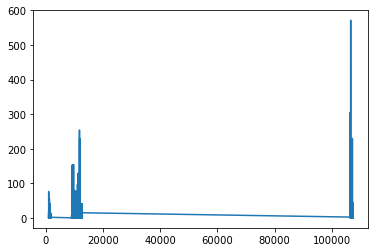

In [426]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

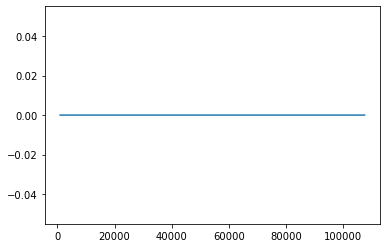

In [427]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [428]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge        ID     OSM_ID OSM_NAME OSM_META    OSM_SOURCE  \
0    123498508.0       0  223171.0  5455769.0        0        0  3.969340e+07   
1    123498508.0       0  252468.0  5478188.0        0        0  3.998311e+07   
2    123498508.0       0  252469.0  5478189.0        0        0  1.309689e+09   
3    123498508.0       0  252470.0  5478189.0        0        0  3.998311e+07   
4    123498508.0       0  252471.0  5478189.0        0        0  1.309689e+09   

     OSM_TARGET  CLAZZ  FLAGS  ...  year  region  travel_pattern       AADBT  \
0  3.969340e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
1  3.969340e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
2  3.998311e+07   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
3  1.309689e+09   51.0    3.0  ...  2019  Eugene             2.0  513.408379   
4  1.309689e+09   51.0    3.0  ...  2019  Eugene             2.0  513.408379   

     stv_adb  stv_c_adb  stl_raw   latitude   longitude             comment  
0  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
1  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
2  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
3  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  
4  12.575342   3.780822    985.0  44.042515 -123.119532  corrected STL zone  

[5 rows x 45 columns]

In [429]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge        ID     OSM_ID          OSM_NAME OSM_META  \
984    618082822.0       1  219332.0  5453222.0  North 5th Street        0   
985    618082822.0       1  219333.0  5453222.0  North 5th Street        0   
986    618082822.0       1  219334.0  5453222.0  North 5th Street        0   
987    618082822.0       1  219335.0  5453222.0  North 5th Street        0   
988    618082822.0       1  219336.0  5453222.0  North 5th Street        0   

       OSM_SOURCE    OSM_TARGET  CLAZZ  FLAGS  ...  year  region  \
984  5.172229e+09  1.314764e+09   31.0    3.0  ...  2019  Eugene   
985  1.314764e+09  3.965169e+07   31.0    3.0  ...  2019  Eugene   
986  3.965169e+07  1.314764e+09   31.0    3.0  ...  2019  Eugene   
987  1.314764e+09  3.965169e+07   31.0    3.0  ...  2019  Eugene   
988  3.965169e+07  1.314764e+09   31.0    3.0  ...  2019  Eugene   

     travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw   latitude  \
984             3.0  109.807738  7.780822    2.39726    203.0  44.043919   
985             3.0  109.807738  7.780822    2.39726    203.0  44.043919   
986             3.0  109.807738  7.780822    2.39726    203.0  44.043919   
987             3.0  109.807738  7.780822    2.39726    203.0  44.043919   
988             3.0  109.807738  7.780822    2.39726    203.0  44.043919   

      longitude  comment  
984 -123.015499      NaN  
985 -123.015499      NaN  
986 -123.015499      NaN  
987 -123.015499      NaN  
988 -123.015499      NaN  

[5 rows x 45 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

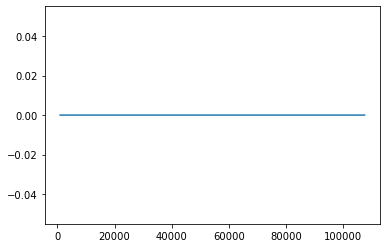

In [430]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [431]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  5453222.0  1.271336
1  5480007.0  0.696956
2  5482102.0  1.179152
3  5483853.0  1.411248
4  5485472.0  1.175218

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [432]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [433]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [434]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [435]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [436]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [437]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [438]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [439]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/eugene/KEUG/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [440]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/eugene_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        30.6        26       32     27.9       24       96     89.9       73   
1        30.4         0       38     26.3        0      100     76.8        0   
2        47.0        43       39     36.9       35       80     68.9       45   
3        45.4        41       44     41.3       38       97     86.0       68   
4        42.3        39       42     39.6       38       97     90.3       68   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      40.6        34       40     37.0       32       93     87.1       77   
361      37.8        32       42     35.7       30      100     92.6       74   
362      42.2        35       43     39.7       33      100     91.5       86   
363      43.8        40       41     39.3       37       93     84.2       68   
364      46.9        39       47     42.4       37       93     84.6       64   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0           6       2.6         0      30.1      30.0      29.9   
1          13       4.1         0      29.9      29.9      29.8   
2          10       7.5         5      29.8      29.6      29.5   
3          12       4.1         0      29.6      29.4      29.4   
4          28       4.7         0      29.4      29.1      28.8   
..        ...       ...       ...       ...       ...       ...   
360        13       6.8         0      29.9      29.8      29.7   
361         6       2.3         0      29.9      29.8      29.7   
362         8       4.6         0      29.8      29.7      29.6   
363         9       4.8         0      30.0      29.9      29.9   
364        18       9.6         0      29.9      29.8      29.6   

     Precipitation        Date  
0             0.00    2019-1-1  
1             0.00    2019-1-2  
2             0.00    2019-1-3  
3             0.00    2019-1-4  
4             0.01    2019-1-5  
..             ...         ...  
360           0.01  2019-12-27  
361           0.00  2019-12-28  
362           0.00  2019-12-29  
363           0.04  2019-12-30  
364           0.00  2019-12-31  

[365 rows x 16 columns]

In [441]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        30.6     89.9           0.00
1        30.4     76.8           0.00
2        47.0     68.9           0.00
3        45.4     86.0           0.00
4        42.3     90.3           0.01
..        ...      ...            ...
360      40.6     87.1           0.01
361      37.8     92.6           0.00
362      42.2     91.5           0.00
363      43.8     84.2           0.04
364      46.9     84.6           0.00

[365 rows x 3 columns]

In [442]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [443]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [444]:
output_weather2.isnull().values.any()

False

In [445]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         52.194247
Hum_avg          75.815616
Precipitation     0.099863
dtype: float64

# Aggregate all output together in a dataframe

In [446]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_origin,output_destination,output_odl,output_bikecom,output_lane,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope,output_odl_gps]

In [447]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
2  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   
3  107098076.0  P004EUG   permanent  429.732467  19.589041   7.342466   
6  680124010.0  P005EUG   permanent  410.282143   6.972603   4.479452   

   stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0    985.0              262.0                   287.0                590.0   
1    203.0               24.0                    27.0                 50.0   
2   2766.0            12946.0                 13181.0              24094.0   
3   1233.0             1723.0                  1837.0               2967.0   
6   2154.0           149131.0                146711.0             174366.0   

   ...  Student Access  pct_at_least_college_education  Median Age  \
0  ...      845.760259                       80.393691   35.672044   
1  ...      299.083347                       63.678503   39.153764   
2  ...     1736.386199                       80.749800   31.971420   
3  ...      328.826399                       77.054174   41.925065   
6  ...    12342.709947                       78.505776   22.684677   

   Median_HH_income   HH_density  population_density  employment_density  \
0      41928.104830  2528.068277         5563.880707         4646.450887   
1      32869.584876  1287.295543         2894.407166         2438.929852   
2      45036.305447   955.439241         2454.195671         2251.018751   
3      42432.523755  1280.380491         2764.752193         2428.426178   
6      17970.775019  3790.411034        10264.703275         9763.502178   

   Number of jobs     slope  Bike Share route  
0     8938.937166  1.318924              1194  
1     3264.295055  0.000000               194  
2     2259.612709  2.971722             27630  
3     7590.197121  1.059929              6400  
6    14323.773885  2.005554            173899  

[5 rows x 86 columns]

In [448]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [449]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head(5)

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
2  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   
3  107098076.0  P004EUG   permanent  429.732467  19.589041   7.342466   
6  680124010.0  P005EUG   permanent  410.282143   6.972603   4.479452   

   stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0    985.0              262.0                   287.0                590.0   
1    203.0               24.0                    27.0                 50.0   
2   2766.0            12946.0                 13181.0              24094.0   
3   1233.0             1723.0                  1837.0               2967.0   
6   2154.0           149131.0                146711.0             174366.0   

   ...  Median_HH_income   HH_density  population_density  employment_density  \
0  ...      41928.104830  2528.068277         5563.880707         4646.450887   
1  ...      32869.584876  1287.295543         2894.407166         2438.929852   
2  ...      45036.305447   955.439241         2454.195671         2251.018751   
3  ...      42432.523755  1280.380491         2764.752193         2428.426178   
6  ...      17970.775019  3790.411034        10264.703275         9763.502178   

  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0    8938.937166  1.318924              1194  52.194247  75.815616   
1    3264.295055  0.000000               194  52.194247  75.815616   
2    2259.612709  2.971722             27630  52.194247  75.815616   
3    7590.197121  1.059929              6400  52.194247  75.815616   
6   14323.773885  2.005554            173899  52.194247  75.815616   

   Precipitation  
0       0.099863  
1       0.099863  
2       0.099863  
3       0.099863  
6       0.099863  

[5 rows x 89 columns]

In [450]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_Eugene_data_circular_0.75_mile_buffer_2019.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [451]:
# Make dynamic visualization
#!pip install keplergl

In [452]:
ecoshort.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

              comment  osm_id_sensor                        geometry  \
0  corrected STL zone    123498508.0  POINT (1290079.275 267211.026)   
1                 NaN    618082822.0  POINT (1298418.325 267111.279)   
2                 NaN    106993273.0  POINT (1295432.562 267262.083)   
3                 NaN    107098076.0  POINT (1290859.454 270021.192)   
4                 NaN    680124010.0  POINT (1293225.340 266892.292)   

   min_dist_to_school min_dist_to_college  min_dist_to_university  lanes  \
0          628.532553         6934.212066            10591.197533      2   
1          879.755548        20933.140361            13217.559590      2   
2         5010.229468        11170.247924             4992.440022      2   
3         2793.158332         8094.508350            10941.097886      2   
4         1869.438425         4950.178177             1647.205849      1   

   maxspeed min_dist_to_polygon  min_dist_to_CBD  
0      30.0         1071.746883      8356.878045  
1      30.0         2107.377509     19881.232680  
2      35.0         2848.313741     10214.560298  
3      25.0         3262.795673      8057.748919  
4      20.0          406.212518      4845.477002  

[5 rows x 22 columns]

In [453]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [454]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2839")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D

osm_id_sensor                     geometry
0     123498508.0  POINT (-123.11953 44.04252)
1     618082822.0  POINT (-123.01550 44.04392)
2     106993273.0  POINT (-123.05279 44.04446)
3     107098076.0  POINT (-123.11090 44.06801)
4     680124010.0  POINT (-123.08018 44.04053)
..            ...                          ...
72     88379128.0  POINT (-123.09275 44.03920)
73     97521582.0  POINT (-122.99586 44.07240)
75    435896157.0  POINT (-123.02161 44.04619)
76    721761539.0  POINT (-123.09096 44.03378)
77    366409020.0  POINT (-123.07902 44.06344)

[74 rows x 2 columns]

In [455]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0     123498508.0 -123.119532  44.042515
1     618082822.0 -123.015499  44.043919
2     106993273.0 -123.052792  44.044462
3     107098076.0 -123.110896  44.068013
4     680124010.0 -123.080176  44.040527
..            ...         ...        ...
72     88379128.0 -123.092749  44.039198
73     97521582.0 -122.995862  44.072399
75    435896157.0 -123.021607  44.046188
76    721761539.0 -123.090958  44.033776
77    366409020.0 -123.079023  44.063436

[74 rows x 3 columns]

In [456]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [457]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2839")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2839


osm_id_sensor         Lon        Lat  \
0    123498508.0 -123.119532  44.042515   
1    618082822.0 -123.015499  44.043919   
2    106993273.0 -123.052792  44.044462   
3    107098076.0 -123.110896  44.068013   
4    680124010.0 -123.080176  44.040527   

                                            geometry  
0  POLYGON ((-123.10448 44.04285, -123.10451 44.0...  
1  POLYGON ((-123.00045 44.04424, -123.00047 44.0...  
2  POLYGON ((-123.03774 44.04479, -123.03777 44.0...  
3  POLYGON ((-123.09584 44.06835, -123.09586 44.0...  
4  POLYGON ((-123.06512 44.04086, -123.06515 44.0...

In [458]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_eco_short_2019_Eugene_circular_0.75_mile_buffer.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

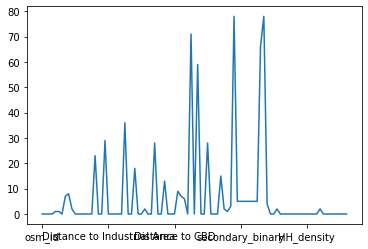

In [459]:
df_dynamic1.isnull().sum().plot()


In [460]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [461]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [462]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [463]:
#df_dynamic1.dtypes

In [464]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [465]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/keplergl_eco_short_2019_Eugene_circular_0.75_mile_buffer.csv")
data=data.fillna('0')
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   1234985…

In [466]:
data.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
2  618082822.0  S088EUG  short-term  111.398166   7.780822   2.397260   
3  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   
4  107098076.0  P004EUG   permanent  429.732467  19.589041   7.342466   

   stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0    985.0              262.0                   287.0                590.0   
1    203.0               24.0                    27.0                 50.0   
2    203.0               24.0                    27.0                 50.0   
3   2766.0            12946.0                 13181.0              24094.0   
4   1233.0             1723.0                  1837.0               2967.0   

   ...  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0  ...     8938.937166  1.318924              1194  52.194247  75.815616   
1  ...     3264.295055  0.000000               194  52.194247  75.815616   
2  ...     3264.295055  0.000000               194  52.194247  75.815616   
3  ...     2259.612709  2.971722             27630  52.194247  75.815616   
4  ...     7590.197121  1.059929              6400  52.194247  75.815616   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.099863    123498508.0 -123.119532  44.042515   
1       0.099863    618082822.0 -123.015499  44.043919   
2       0.099863    618082822.0 -123.015499  44.043919   
3       0.099863    106993273.0 -123.052792  44.044462   
4       0.099863    107098076.0 -123.110896  44.068013   

                                            geometry  
0  POLYGON ((-123.1044802776668 44.04285423351251...  
1  POLYGON ((-123.0004455579373 44.04424394552747...  
2  POLYGON ((-123.0004455579373 44.04424394552747...  
3  POLYGON ((-123.037738824167 44.04479238047847,...  
4  POLYGON ((-123.0958374735181 44.06835061958168...  

[5 rows x 93 columns]

In [467]:
# save as htm file
map_2.save_to_html(file_name="Eugene_eco_short_2019_keplergl_circular_0.75_mile_buffer.html")

Map saved to Eugene_eco_short_2019_keplergl_circular_0.75_mile_buffer.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [468]:
#conda list ipython

In [469]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 1883.8775861263275


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT